# AutoFL Sequence Pattern Analysis - N-grams

Analyze N-gram subsequences in messages from AutoFL trajectory data

In [1]:
import json
import os
from collections import Counter
from pathlib import Path
from typing import List, Tuple
import pandas as pd

In [2]:
def extract_function_call_sequence(messages: List[dict]) -> List[str]:
    """
    Extract the sequence of roles from messages.

    Args:
        messages: List of message dictionaries

    Returns:
        List of role strings in order
    """
    sequence = []
    for msg in messages:
        if 'function_call' in msg:
            sequence.append(msg['function_call']['name'])
    return sequence


def get_ngrams(sequence: List[str], n: int) -> List[Tuple[str, str, str, str]]:
    """
    Extract all n-grams from a sequence.

    Args:
        sequence: List of items

    Returns:
        List of n-gram tuples
    """
    ngrams = []
    for i in range(len(sequence) - (n-1)):
        ngram = tuple(sequence[i:i+n])
        ngrams.append(ngram)
    return ngrams


def get_ngrams_for_all_executions_in_directory(directory_path: Path, n: int) -> List[Tuple[str, str, str, str]]:
    """
    Process all JSON files in a directory and extract n-grams.

    Args:
        directory_path: Path to directory containing JSON files

    Returns:
        List of all n-grams found
    """
    all_ngrams = []


    for json_file in directory_path.glob("*.json"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)

            if 'messages' in data:
                sequence = extract_function_call_sequence(data['messages'])
                ngrams = get_ngrams(sequence, n)
                all_ngrams.extend(ngrams)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return all_ngrams

def get_ngrams_for_successful_executions_in_directory(directory_path: Path, n: int) -> List[Tuple[str, str, str, str]]:
    """
    Process all JSON files in a directory and extract n-grams.

    Args:
        directory_path: Path to directory containing JSON files

    Returns:
        List of all n-grams found
    """
    all_ngrams = []


    for json_file in directory_path.glob("*.json"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            buggy_methods = data["buggy_methods"]
            if isinstance(buggy_methods, str):
                is_found = False
            else:
                is_found = False
                for method, found_result in buggy_methods.items():
                    if found_result["is_found"]:
                        is_found = True
            
            if not is_found:
                continue

            if 'messages' in data:
                sequence = extract_function_call_sequence(data['messages'])
                ngrams = get_ngrams(sequence, n)
                all_ngrams.extend(ngrams)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return all_ngrams

def get_ngrams_for_failing_executions_in_directory(directory_path: Path, n:int) -> List[Tuple[str, str, str, str]]:
    """
    Process all JSON files in a directory and extract n-grams.

    Args:
        directory_path: Path to directory containing JSON files

    Returns:
        List of all n-grams found
    """
    all_ngrams = []


    for json_file in directory_path.glob("*.json"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            buggy_methods = data["buggy_methods"]
            if isinstance(buggy_methods, str):
                is_found = False
            else:
                is_found = False
                for method, found_result in buggy_methods.items():
                    if found_result["is_found"]:
                        is_found = True
            
            if is_found:
                continue

            if 'messages' in data:
                sequence = extract_function_call_sequence(data['messages'])
                ngrams = get_ngrams(sequence, n)
                all_ngrams.extend(ngrams)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return all_ngrams

In [3]:
def get_ngrams_for_all_executions(benchmark, model, n):
    # Process all directories
    base_path = Path("raw_data/autofl")

    all_ngrams = []

    for i in range(1, 11):
        if benchmark == 'bip':
            dir_name = f"bip_cosmosfl_{i}"
        elif benchmark == 'd4j':
            dir_name = f"d4j_autofl_eol_{i}"
            
        model_path = base_path / dir_name / model

        if model_path.exists():
            # print(f"Processing {dir_name}...")
            ngrams = get_ngrams_for_all_executions_in_directory(model_path, n)
            all_ngrams.extend(ngrams)
            # print(f"  Found {len(four_grams)} {n}-grams")
        else:
            print(f"Warning: {model_path} does not exist")

    print(f"\nTotal {n}-grams collected: {len(all_ngrams)}")

    return all_ngrams

def get_ngrams_for_success_executions(benchmark, model, n):
    # Process all directories
    base_path = Path("raw_data/autofl")

    all_ngrams = []

    for i in range(1, 11):
        if benchmark == 'bip':
            dir_name = f"bip_cosmosfl_{i}"
        elif benchmark == 'd4j':
            dir_name = f"d4j_autofl_eol_{i}"
            
        model_path = base_path / dir_name / model

        if model_path.exists():
            # print(f"Processing {dir_name}...")
            ngrams = get_ngrams_for_successful_executions_in_directory(model_path, n)
            all_ngrams.extend(ngrams)
            # print(f"  Found {len(ngrams)} {n}-grams")
        else:
            print(f"Warning: {model_path} does not exist")

    print(f"\nTotal {n}-grams collected: {len(all_ngrams)}")

    return all_ngrams

def get_ngrams_for_fail_executions(benchmark, model, n):
    # Process all directories
    base_path = Path("raw_data/autofl")

    all_ngrams = []

    for i in range(1, 11):
        if benchmark == 'bip':
            dir_name = f"bip_cosmosfl_{i}"
        elif benchmark == 'd4j':
            dir_name = f"d4j_autofl_eol_{i}"
            
        model_path = base_path / dir_name / model

        if model_path.exists():
            # print(f"Processing {dir_name}...")
            ngrams = get_ngrams_for_failing_executions_in_directory(model_path, n)
            all_ngrams.extend(ngrams)
            # print(f"  Found {len(ngrams)} {n}-grams")
        else:
            print(f"Warning: {model_path} does not exist")

    print(f"\nTotal {n}-grams collected: {len(all_ngrams)}")

    return all_ngrams

### 5-gram

In [4]:
# Get n-gram: frequencies for all benchmarks and models
n = 5
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)

        all_counter = Counter(all_ngrams)

        results = []
        for ngram, count in all_counter.most_common():
            results.append({
                f'{n}gram': ngram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_dir = f"./{n}gram_frequency/autofl/all_executions"
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, f"{bm}_{model}_{n}gram_frequencies.csv")
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique {n}-gram")





Total 5-grams collected: 1841
Saved ./5gram_frequency/autofl/all_executions/d4j_llama3_5gram_frequencies.csv with 334 unique 5-gram

Total 5-grams collected: 5984
Saved ./5gram_frequency/autofl/all_executions/d4j_llama3.1_5gram_frequencies.csv with 554 unique 5-gram

Total 5-grams collected: 701
Saved ./5gram_frequency/autofl/all_executions/d4j_mistral-nemo_5gram_frequencies.csv with 69 unique 5-gram

Total 5-grams collected: 998
Saved ./5gram_frequency/autofl/all_executions/d4j_qwen2.5-coder_5gram_frequencies.csv with 143 unique 5-gram

Total 5-grams collected: 7675
Saved ./5gram_frequency/autofl/all_executions/bip_llama3_5gram_frequencies.csv with 134 unique 5-gram

Total 5-grams collected: 12315
Saved ./5gram_frequency/autofl/all_executions/bip_llama3.1_5gram_frequencies.csv with 373 unique 5-gram

Total 5-grams collected: 723
Saved ./5gram_frequency/autofl/all_executions/bip_mistral-nemo_5gram_frequencies.csv with 51 unique 5-gram

Total 5-grams collected: 769
Saved ./5gram_freque

In [5]:
# Get n-gram: frequencies from successing executions for all benchmarks and models
n = 5
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_ngrams = get_ngrams_for_success_executions(bm, model, n)

        success_counter = Counter(all_ngrams)

        results = []
        for ngram, count in success_counter.most_common():
            results.append({
                f'{n}gram': ngram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_dir = f"./{n}gram_frequency/autofl/success_executions"
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, f"{bm}_{model}_{n}gram_frequencies.csv")
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique {n}-gram")





Total 5-grams collected: 518
Saved ./5gram_frequency/autofl/success_executions/d4j_llama3_5gram_frequencies.csv with 168 unique 5-gram

Total 5-grams collected: 1086
Saved ./5gram_frequency/autofl/success_executions/d4j_llama3.1_5gram_frequencies.csv with 271 unique 5-gram

Total 5-grams collected: 167
Saved ./5gram_frequency/autofl/success_executions/d4j_mistral-nemo_5gram_frequencies.csv with 36 unique 5-gram

Total 5-grams collected: 256
Saved ./5gram_frequency/autofl/success_executions/d4j_qwen2.5-coder_5gram_frequencies.csv with 77 unique 5-gram

Total 5-grams collected: 763
Saved ./5gram_frequency/autofl/success_executions/bip_llama3_5gram_frequencies.csv with 41 unique 5-gram

Total 5-grams collected: 1990
Saved ./5gram_frequency/autofl/success_executions/bip_llama3.1_5gram_frequencies.csv with 172 unique 5-gram

Total 5-grams collected: 133
Saved ./5gram_frequency/autofl/success_executions/bip_mistral-nemo_5gram_frequencies.csv with 25 unique 5-gram

Total 5-grams collected: 1

In [6]:
# Get n-gram: frequencies from failing executions for all benchmarks and models
n= 5
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_ngrams = get_ngrams_for_fail_executions(bm, model, n)

        failing_counter = Counter(all_ngrams)

        results = []
        for ngram, count in failing_counter.most_common():
            results.append({
                f'{n}gram': ngram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_dir = f"./{n}gram_frequency/autofl/fail_executions"
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, f"{bm}_{model}_{n}gram_frequencies.csv")
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique {n}-gram")





Total 5-grams collected: 1323
Saved ./5gram_frequency/autofl/fail_executions/d4j_llama3_5gram_frequencies.csv with 286 unique 5-gram

Total 5-grams collected: 4898
Saved ./5gram_frequency/autofl/fail_executions/d4j_llama3.1_5gram_frequencies.csv with 528 unique 5-gram

Total 5-grams collected: 534
Saved ./5gram_frequency/autofl/fail_executions/d4j_mistral-nemo_5gram_frequencies.csv with 60 unique 5-gram

Total 5-grams collected: 742
Saved ./5gram_frequency/autofl/fail_executions/d4j_qwen2.5-coder_5gram_frequencies.csv with 127 unique 5-gram

Total 5-grams collected: 6912
Saved ./5gram_frequency/autofl/fail_executions/bip_llama3_5gram_frequencies.csv with 132 unique 5-gram

Total 5-grams collected: 10325
Saved ./5gram_frequency/autofl/fail_executions/bip_llama3.1_5gram_frequencies.csv with 353 unique 5-gram

Total 5-grams collected: 590
Saved ./5gram_frequency/autofl/fail_executions/bip_mistral-nemo_5gram_frequencies.csv with 50 unique 5-gram

Total 5-grams collected: 624
Saved ./5gram


Benchmark: d4j | Model: llama3


Total 5-grams collected: 1841

Total 5-grams collected: 518

Total 5-grams collected: 1323
                                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet -> snippet -> snippet             125                  48               77         38.4%      61.6%
   class -> method -> snippet -> comment -> snippet              87                  34               53         39.1%      60.9%
   class -> method -> snippet -> snippet -> comment              81                  23               58         28.4%      71.6%
      class -> method -> method -> method -> method              70                  10               60         14.3%      85.7%
 method -> snippet -> snippet -> snippet -> comment              56                  26               30         46.4%      53.6%
     class -> method -> method -> method -> snippet              50                  12        

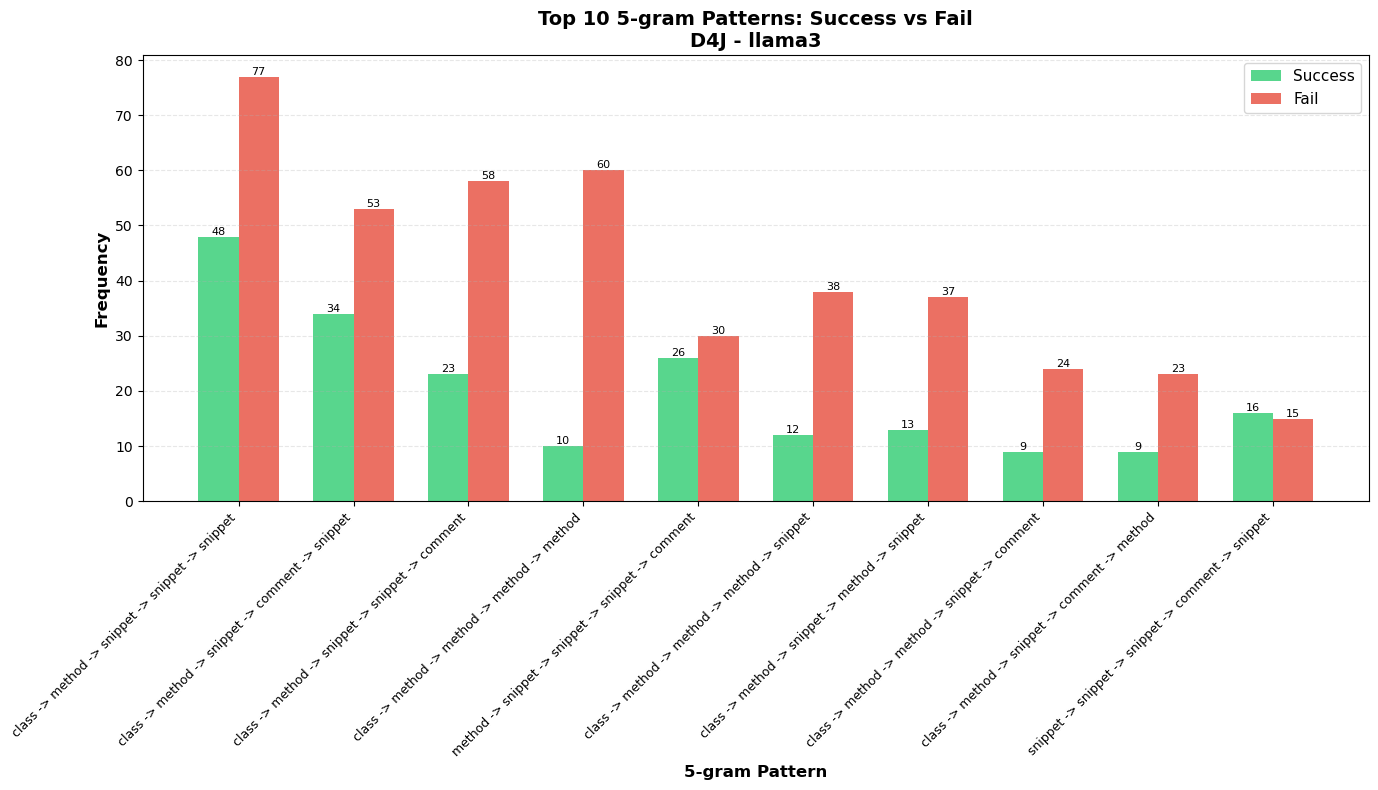


Benchmark: d4j | Model: llama3.1


Total 5-grams collected: 5984

Total 5-grams collected: 1086

Total 5-grams collected: 4898
                                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet -> snippet -> snippet             265                  79              186         29.8%      70.2%
snippet -> snippet -> snippet -> snippet -> snippet             260                  62              198         23.8%      76.2%
 method -> snippet -> snippet -> snippet -> snippet             188                  48              140         25.5%      74.5%
       class -> method -> method -> method -> class             139                   1              138          0.7%      99.3%
      method -> method -> method -> class -> method             125                   1              124          0.8%      99.2%
      class -> method -> method -> method -> method             116                   0     

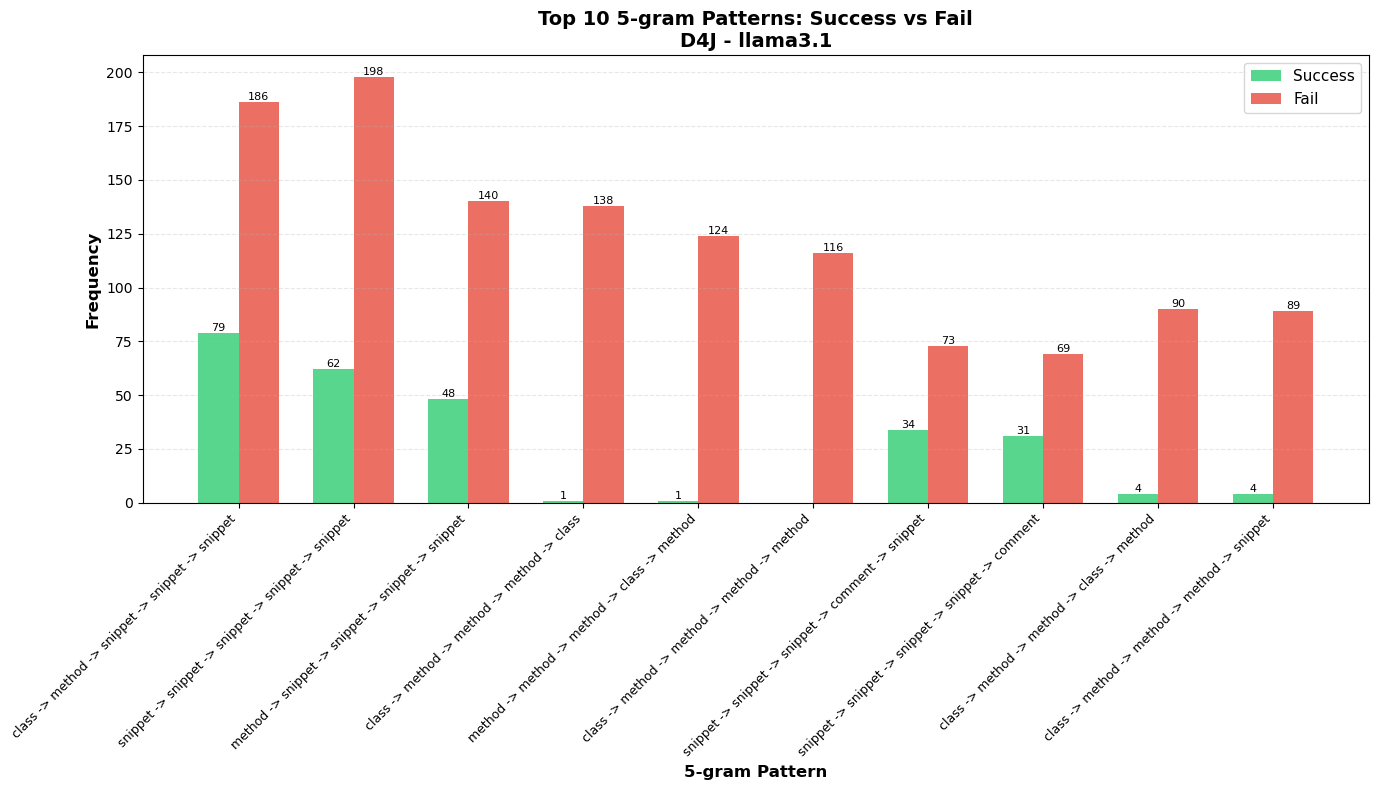


Benchmark: d4j | Model: mistral-nemo


Total 5-grams collected: 701

Total 5-grams collected: 167

Total 5-grams collected: 534
                                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
snippet -> snippet -> snippet -> snippet -> snippet             116                  29               87         25.0%      75.0%
  class -> snippet -> snippet -> snippet -> snippet              98                  19               79         19.4%      80.6%
   class -> method -> snippet -> snippet -> snippet              94                  18               76         19.1%      80.9%
 method -> snippet -> snippet -> snippet -> snippet              46                   9               37         19.6%      80.4%
   class -> method -> snippet -> snippet -> comment              25                   5               20         20.0%      80.0%
  class -> snippet -> snippet -> comment -> snippet              24                   8    

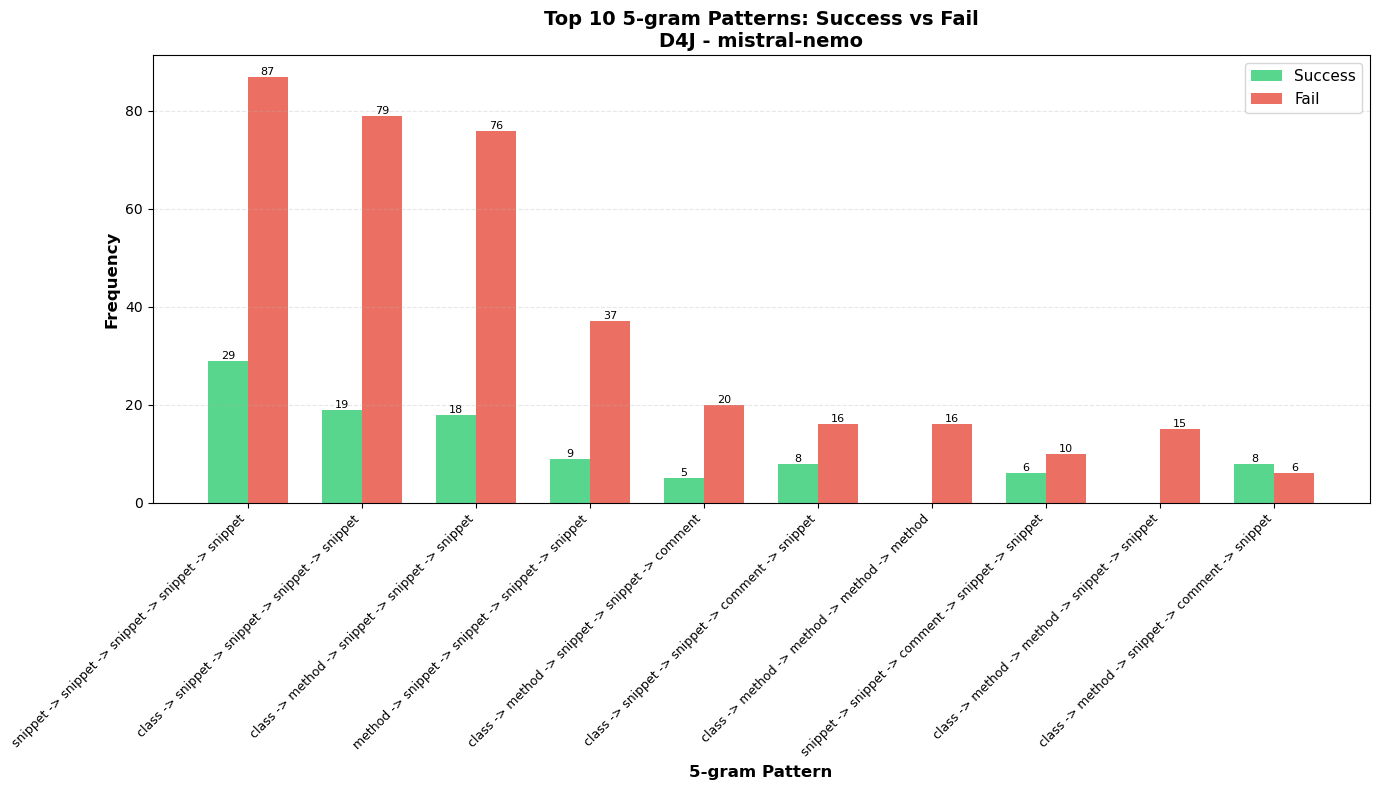


Benchmark: d4j | Model: qwen2.5-coder


Total 5-grams collected: 998

Total 5-grams collected: 256

Total 5-grams collected: 742
                                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet -> snippet -> snippet             119                  27               92         22.7%      77.3%
  class -> snippet -> snippet -> snippet -> snippet              64                  19               45         29.7%      70.3%
  class -> snippet -> snippet -> comment -> snippet              55                  17               38         30.9%      69.1%
snippet -> snippet -> snippet -> snippet -> snippet              43                   7               36         16.3%      83.7%
  class -> snippet -> snippet -> snippet -> comment              41                  12               29         29.3%      70.7%
 method -> snippet -> snippet -> snippet -> snippet              35                  13   

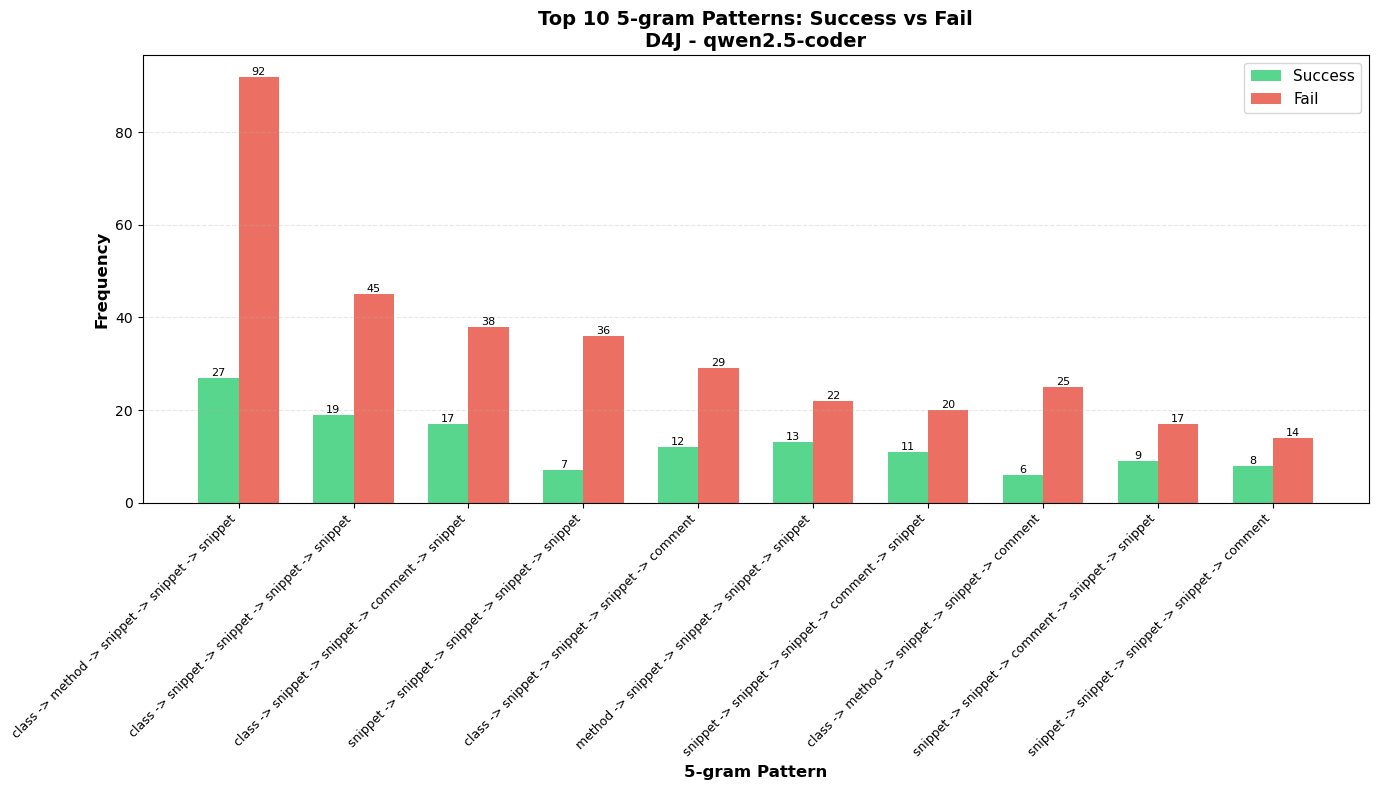


Benchmark: bip | Model: llama3


Total 5-grams collected: 7675

Total 5-grams collected: 763

Total 5-grams collected: 6912
                                     pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> class -> class -> class -> class            3403                 309             3094          9.1%      90.9%
 package -> class -> class -> class -> class            2546                 254             2292         10.0%      90.0%
  class -> class -> class -> class -> method             383                  38              345          9.9%      90.1%
 class -> class -> class -> class -> snippet             199                  43              156         21.6%      78.4%
package -> class -> class -> class -> method             125                  13              112         10.4%      89.6%
 class -> class -> class -> package -> class             109                   3              106          2.8%      97.2%
 class -> clas

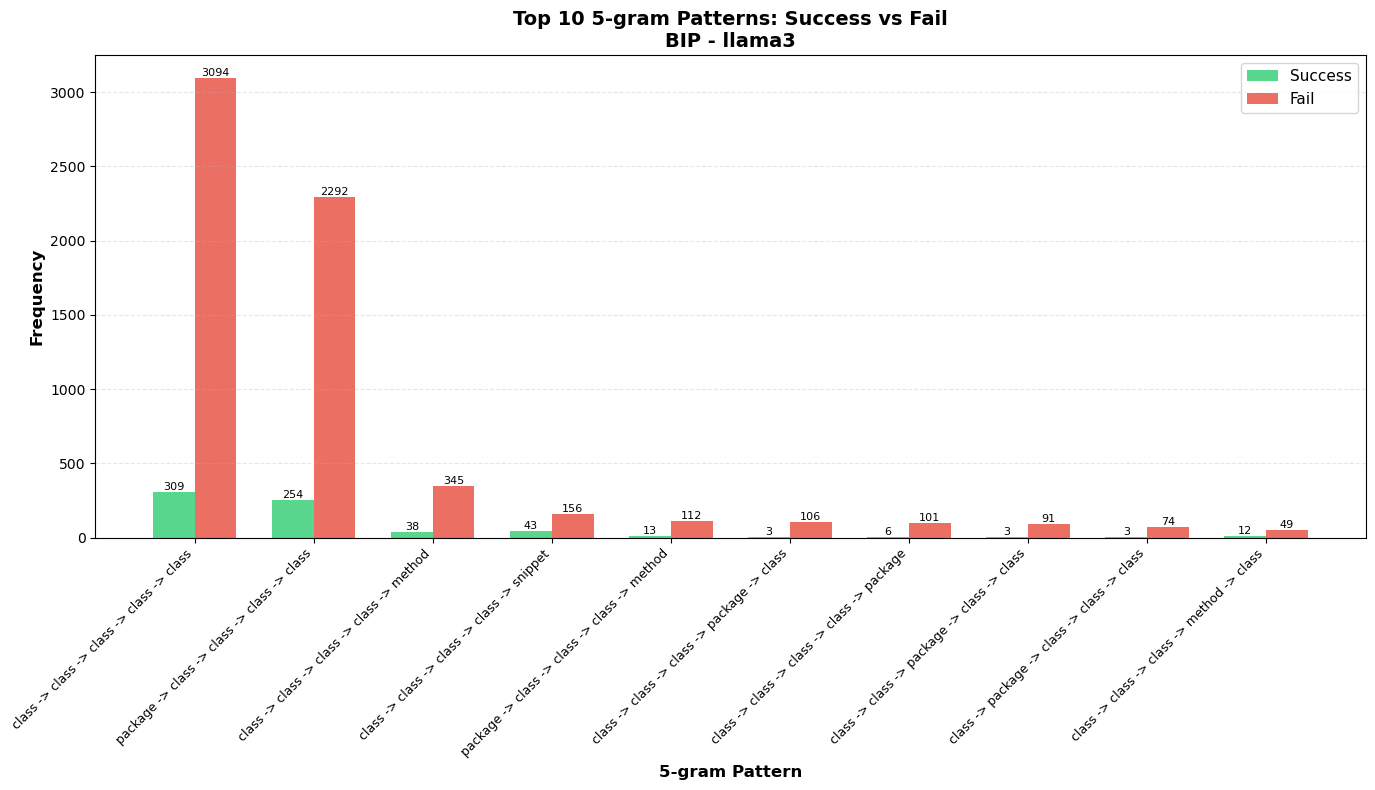


Benchmark: bip | Model: llama3.1


Total 5-grams collected: 12315

Total 5-grams collected: 1990

Total 5-grams collected: 10325
                                     pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> class -> class -> class -> class            4900                 535             4365         10.9%      89.1%
 package -> class -> class -> class -> class            1762                 298             1464         16.9%      83.1%
  class -> class -> class -> class -> method             708                 144              564         20.3%      79.7%
 class -> class -> class -> class -> snippet             405                 100              305         24.7%      75.3%
class -> class -> class -> method -> snippet             375                 108              267         28.8%      71.2%
  class -> class -> class -> method -> class             248                  38              210         15.3%      84.7%
 class ->

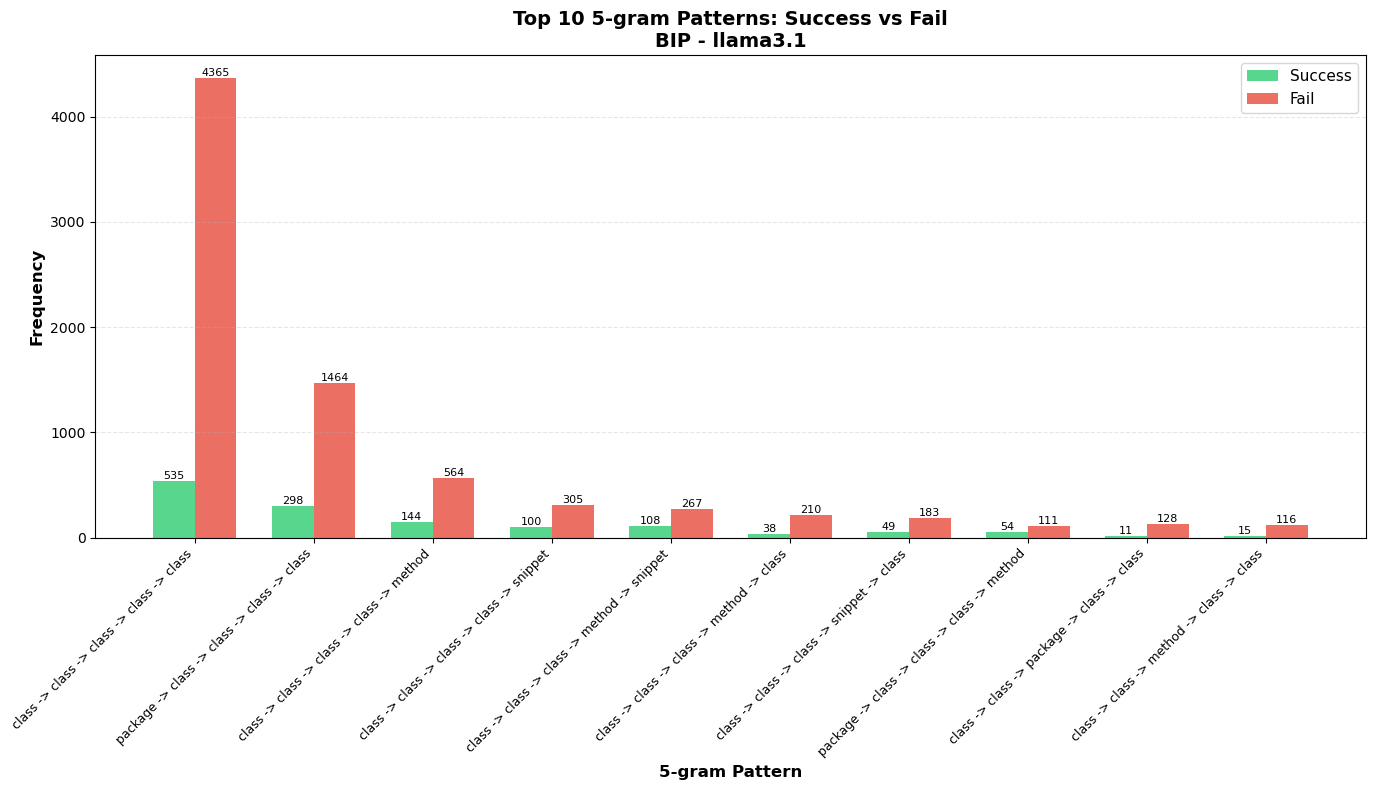


Benchmark: bip | Model: mistral-nemo


Total 5-grams collected: 723

Total 5-grams collected: 133

Total 5-grams collected: 590
                                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet -> snippet -> snippet             140                  14              126         10.0%      90.0%
  package -> method -> method -> snippet -> snippet             106                  23               83         21.7%      78.3%
   package -> method -> method -> method -> snippet              74                  25               49         33.8%      66.2%
  method -> method -> snippet -> snippet -> snippet              39                   2               37          5.1%      94.9%
 method -> snippet -> snippet -> snippet -> snippet              37                   4               33         10.8%      89.2%
    package -> method -> method -> method -> method              29                  12    

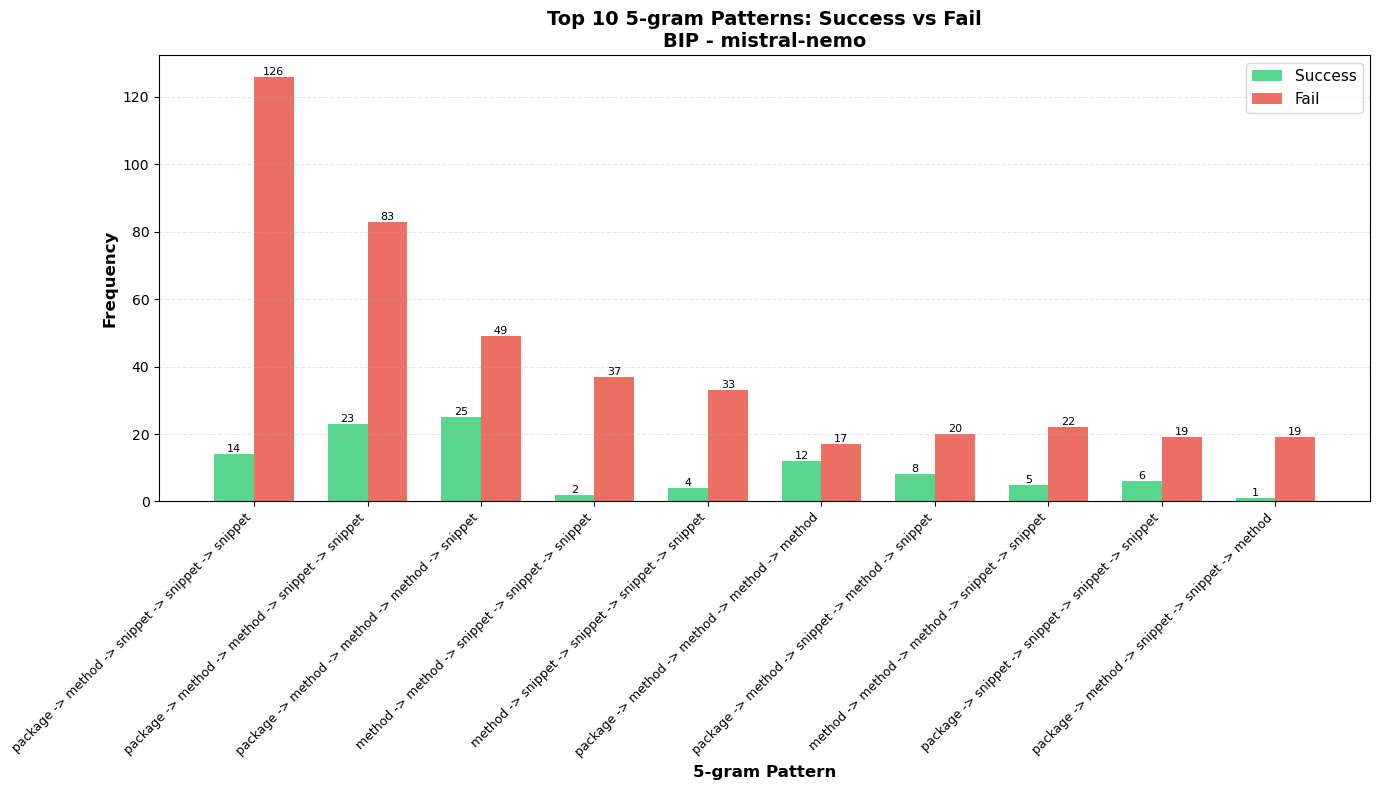


Benchmark: bip | Model: qwen2.5-coder


Total 5-grams collected: 769

Total 5-grams collected: 145

Total 5-grams collected: 624
                                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet -> snippet -> snippet             112                  21               91         18.8%      81.2%
  package -> method -> snippet -> method -> snippet              97                  22               75         22.7%      77.3%
  package -> method -> snippet -> snippet -> method              60                   8               52         13.3%      86.7%
  package -> method -> method -> snippet -> snippet              48                   9               39         18.8%      81.2%
 method -> snippet -> snippet -> snippet -> snippet              37                   5               32         13.5%      86.5%
   method -> snippet -> method -> snippet -> method              36                   7   

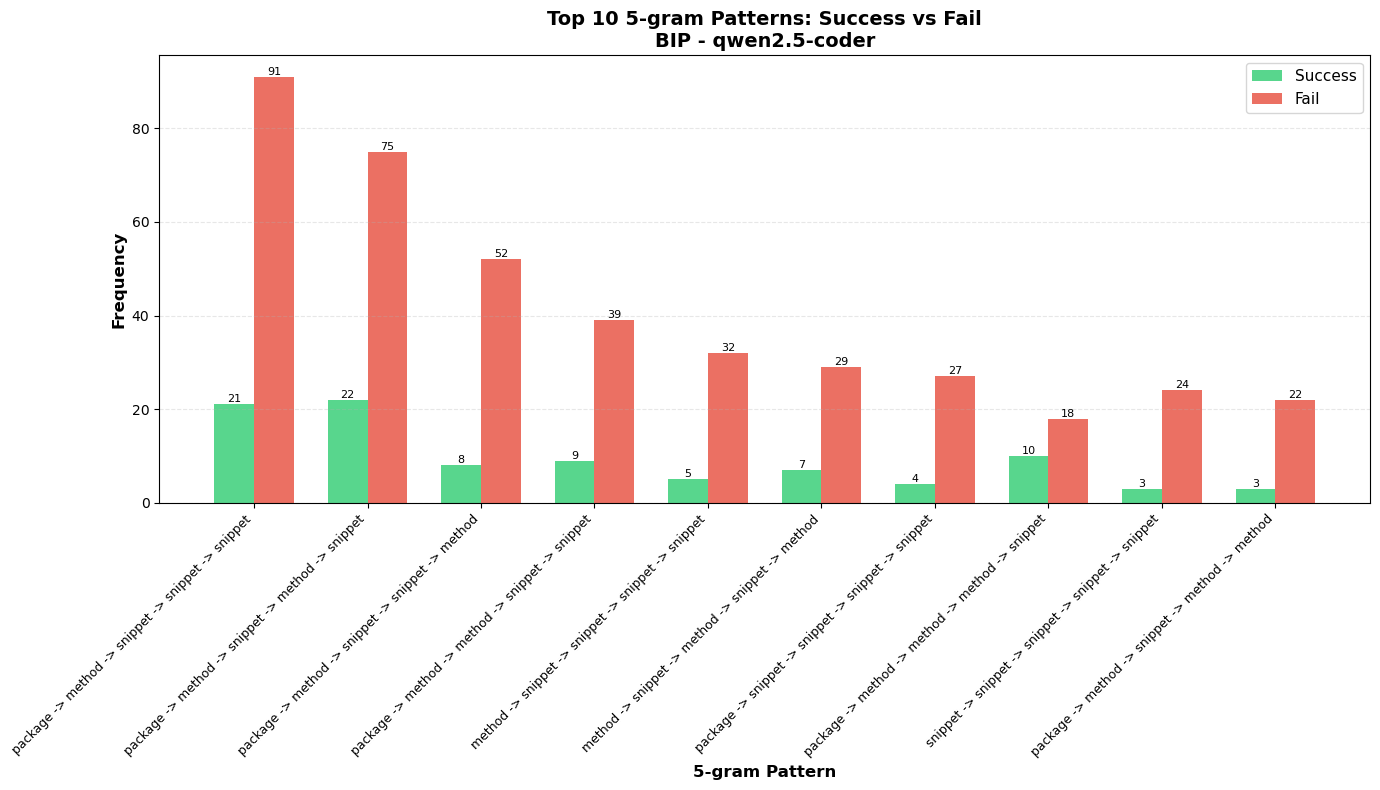

In [7]:
# Compare top 10 most frequent n-grams in all executions vs success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comments': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
n=5
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)
        success_ngrams = get_ngrams_for_success_executions(bm, model, n)
        fail_ngrams = get_ngrams_for_fail_executions(bm, model, n)
        
        all_counter = Counter(all_ngrams)
        success_counter = Counter(success_ngrams)
        fail_counter = Counter(fail_ngrams)
        
        # Get top 10 from all executions
        top_10_patterns = [pattern for pattern, count in all_counter.most_common(10)]
        
        # Create comparison table
        comparison_data = []
        for pattern in top_10_patterns:
            all_count = all_counter[pattern]
            success_count = success_counter[pattern]
            fail_count = fail_counter[pattern]
            
            comparison_data.append({
                'pattern': shorten_pattern(pattern),
                'all_executions': all_count,
                'success_executions': success_count,
                'fail_executions': fail_count,
                'success_ratio': f"{success_count/all_count*100:.1f}%" if all_count > 0 else "0%",
                'fail_ratio': f"{fail_count/all_count*100:.1f}%" if all_count > 0 else "0%"
            })
        
        # Display as DataFrame
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
        print()
        
        # Create bar chart
        fig, ax = plt.subplots(figsize=(14, 8))
        
        patterns = comparison_df['pattern'].tolist()
        success_counts = comparison_df['success_executions'].tolist()
        fail_counts = comparison_df['fail_executions'].tolist()
        
        x = np.arange(len(patterns))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, success_counts, width, label='Success', color='#2ecc71', alpha=0.8)
        bars2 = ax.bar(x + width/2, fail_counts, width, label='Fail', color='#e74c3c', alpha=0.8)
        
        ax.set_xlabel(f'{n}-gram Pattern', fontsize=12, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
        ax.set_title(f'Top 10 {n}-gram Patterns: Success vs Fail\n{bm.upper()} - {model}', fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(patterns, rotation=45, ha='right', fontsize=9)
        ax.legend(fontsize=11)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()


Benchmark: d4j | Model: llama3


Total 5-grams collected: 1841

Total 5-grams collected: 518

Total 5-grams collected: 1323


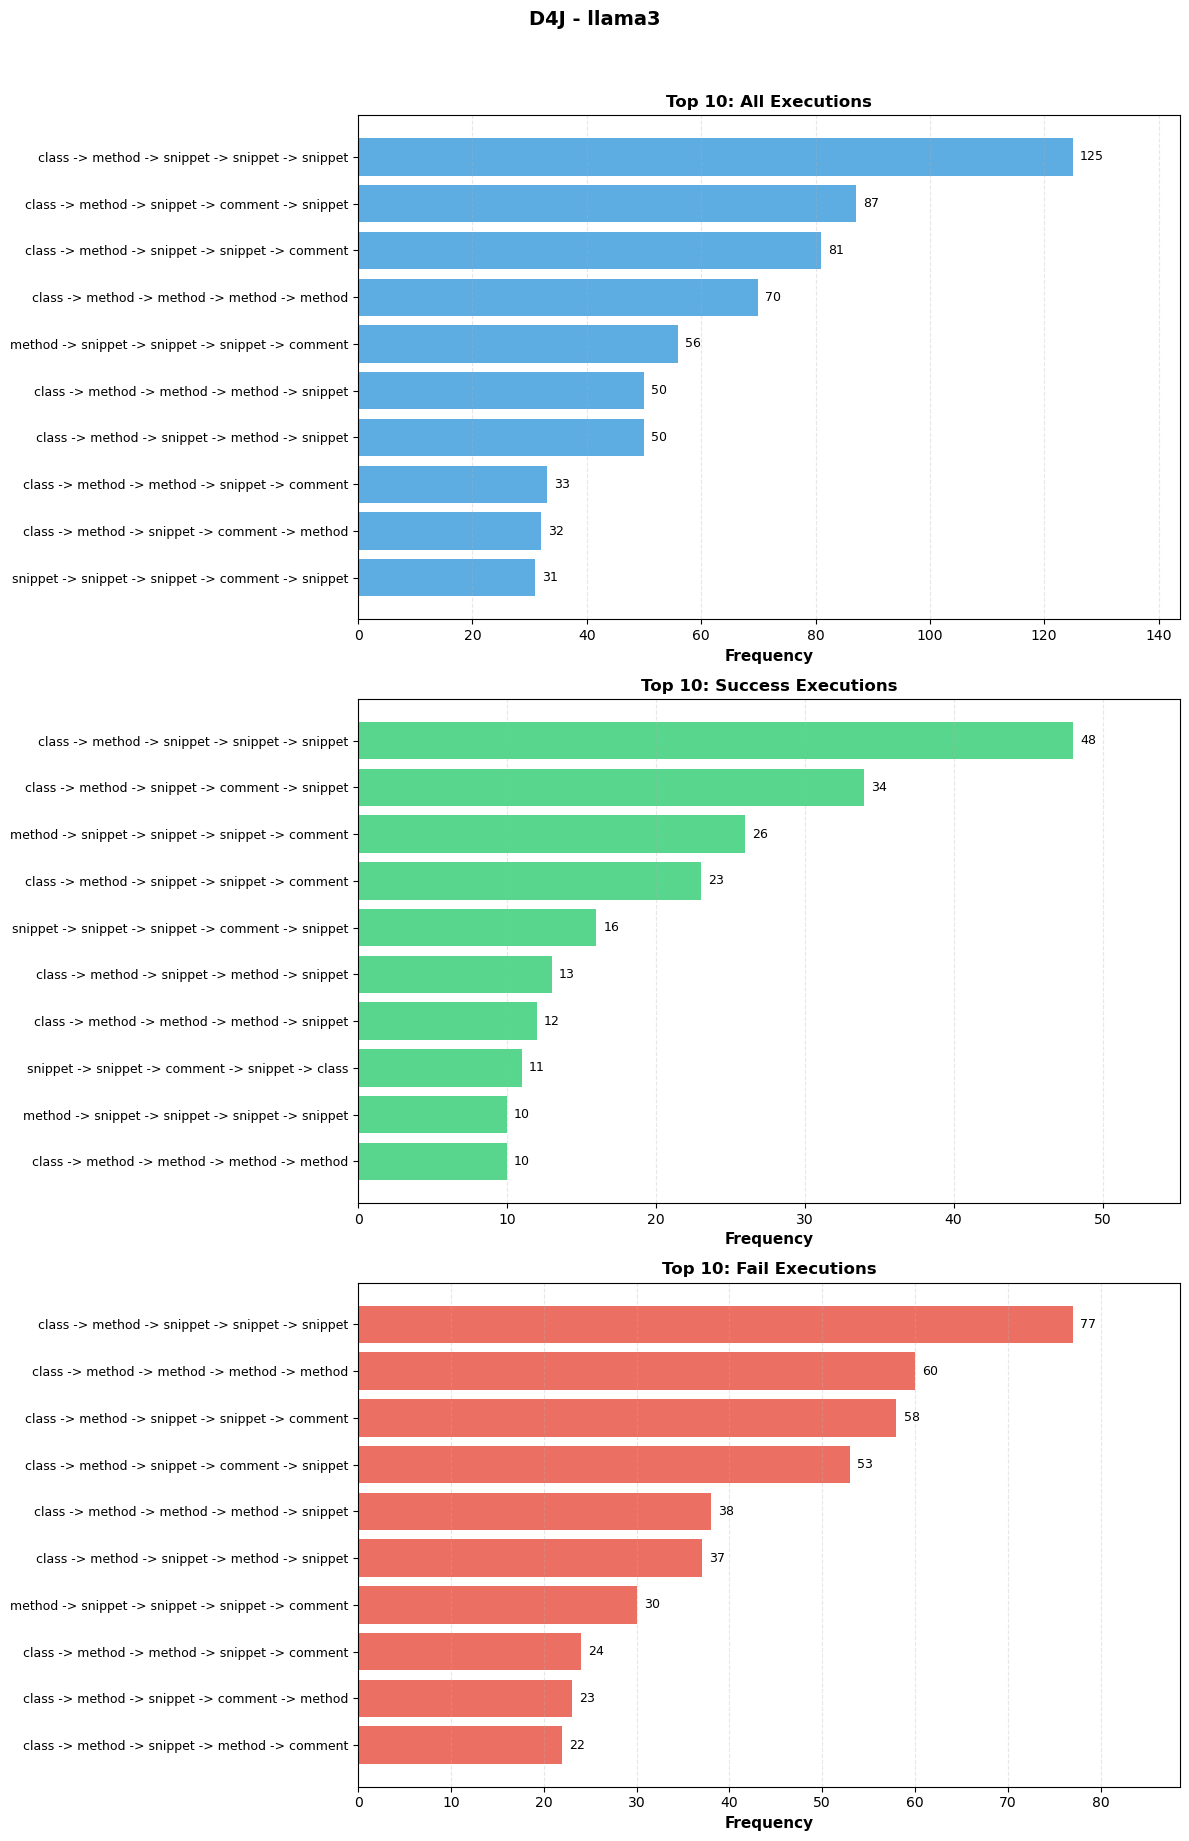


Benchmark: d4j | Model: llama3.1


Total 5-grams collected: 5984

Total 5-grams collected: 1086

Total 5-grams collected: 4898


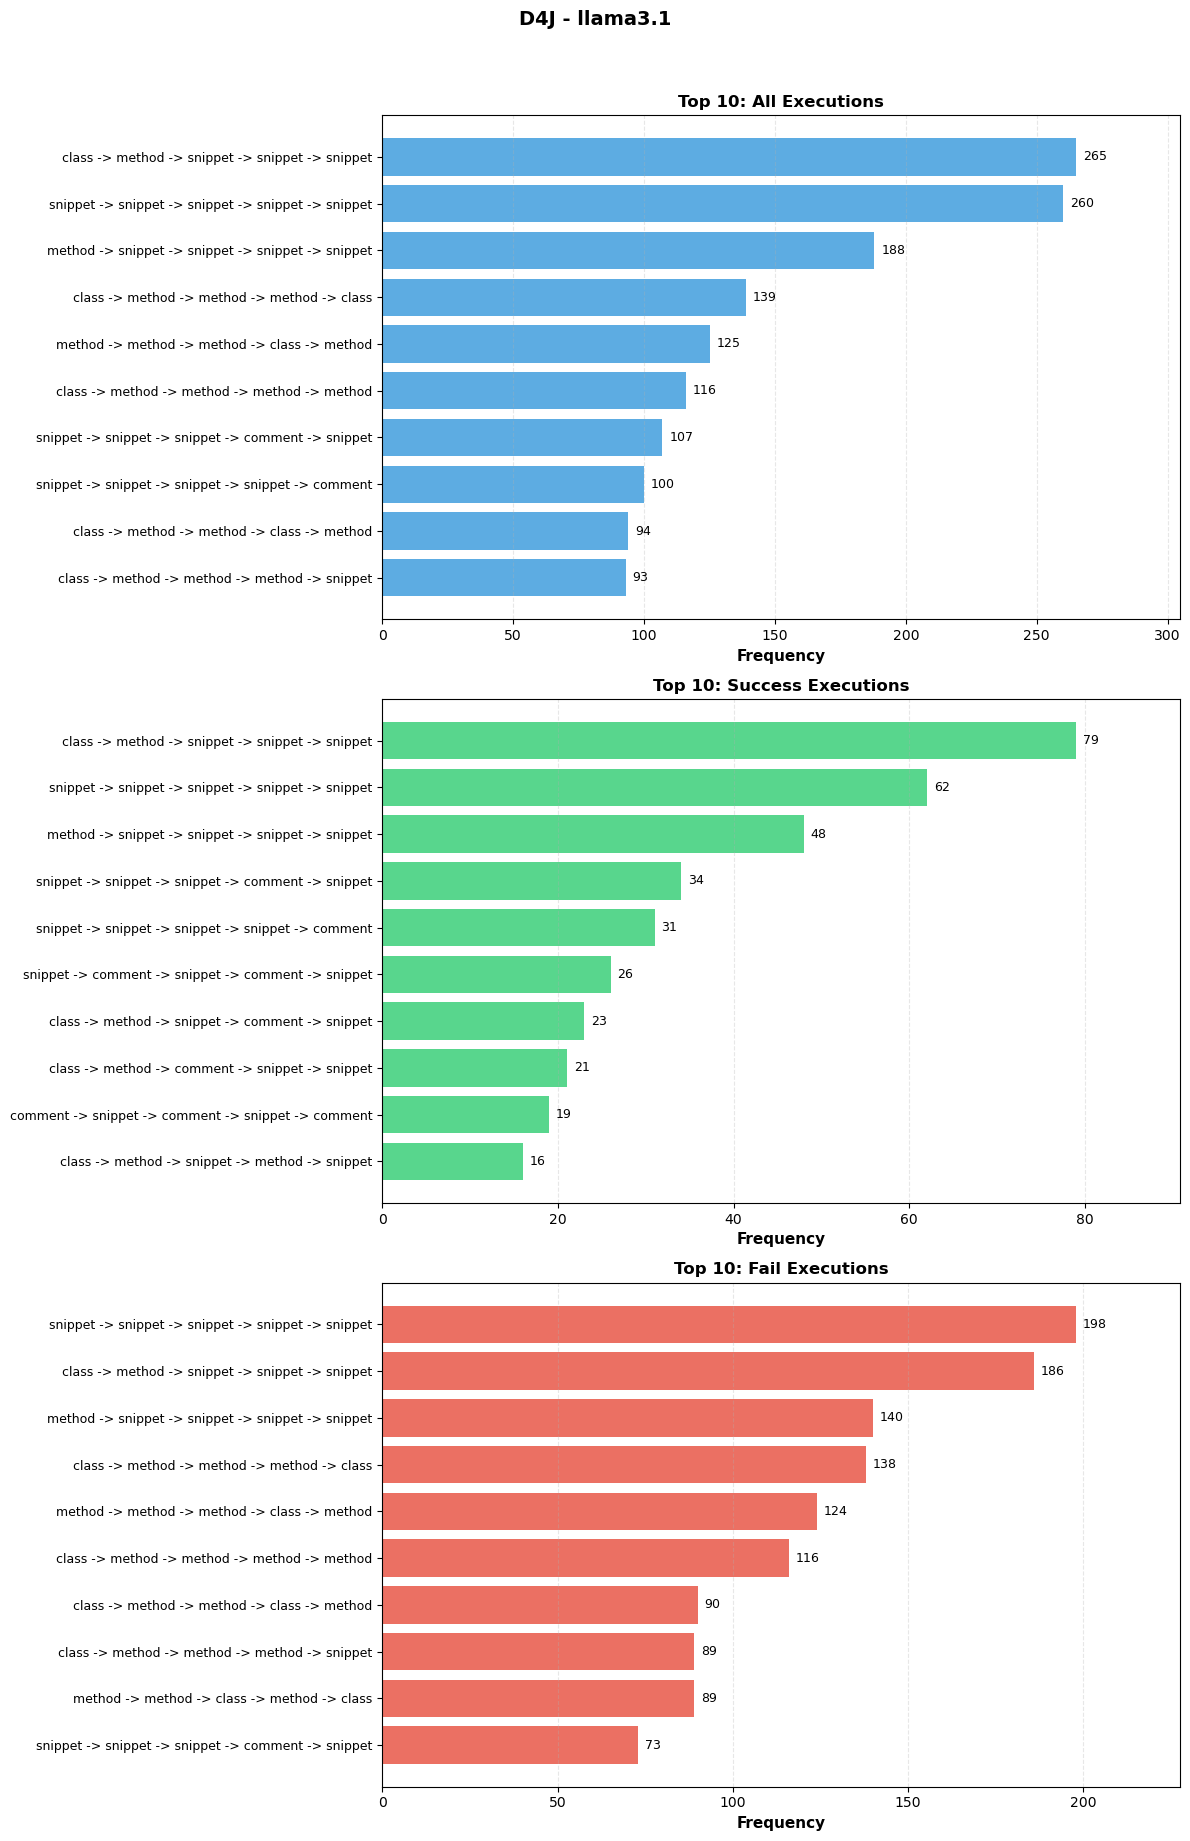


Benchmark: d4j | Model: mistral-nemo


Total 5-grams collected: 701

Total 5-grams collected: 167

Total 5-grams collected: 534


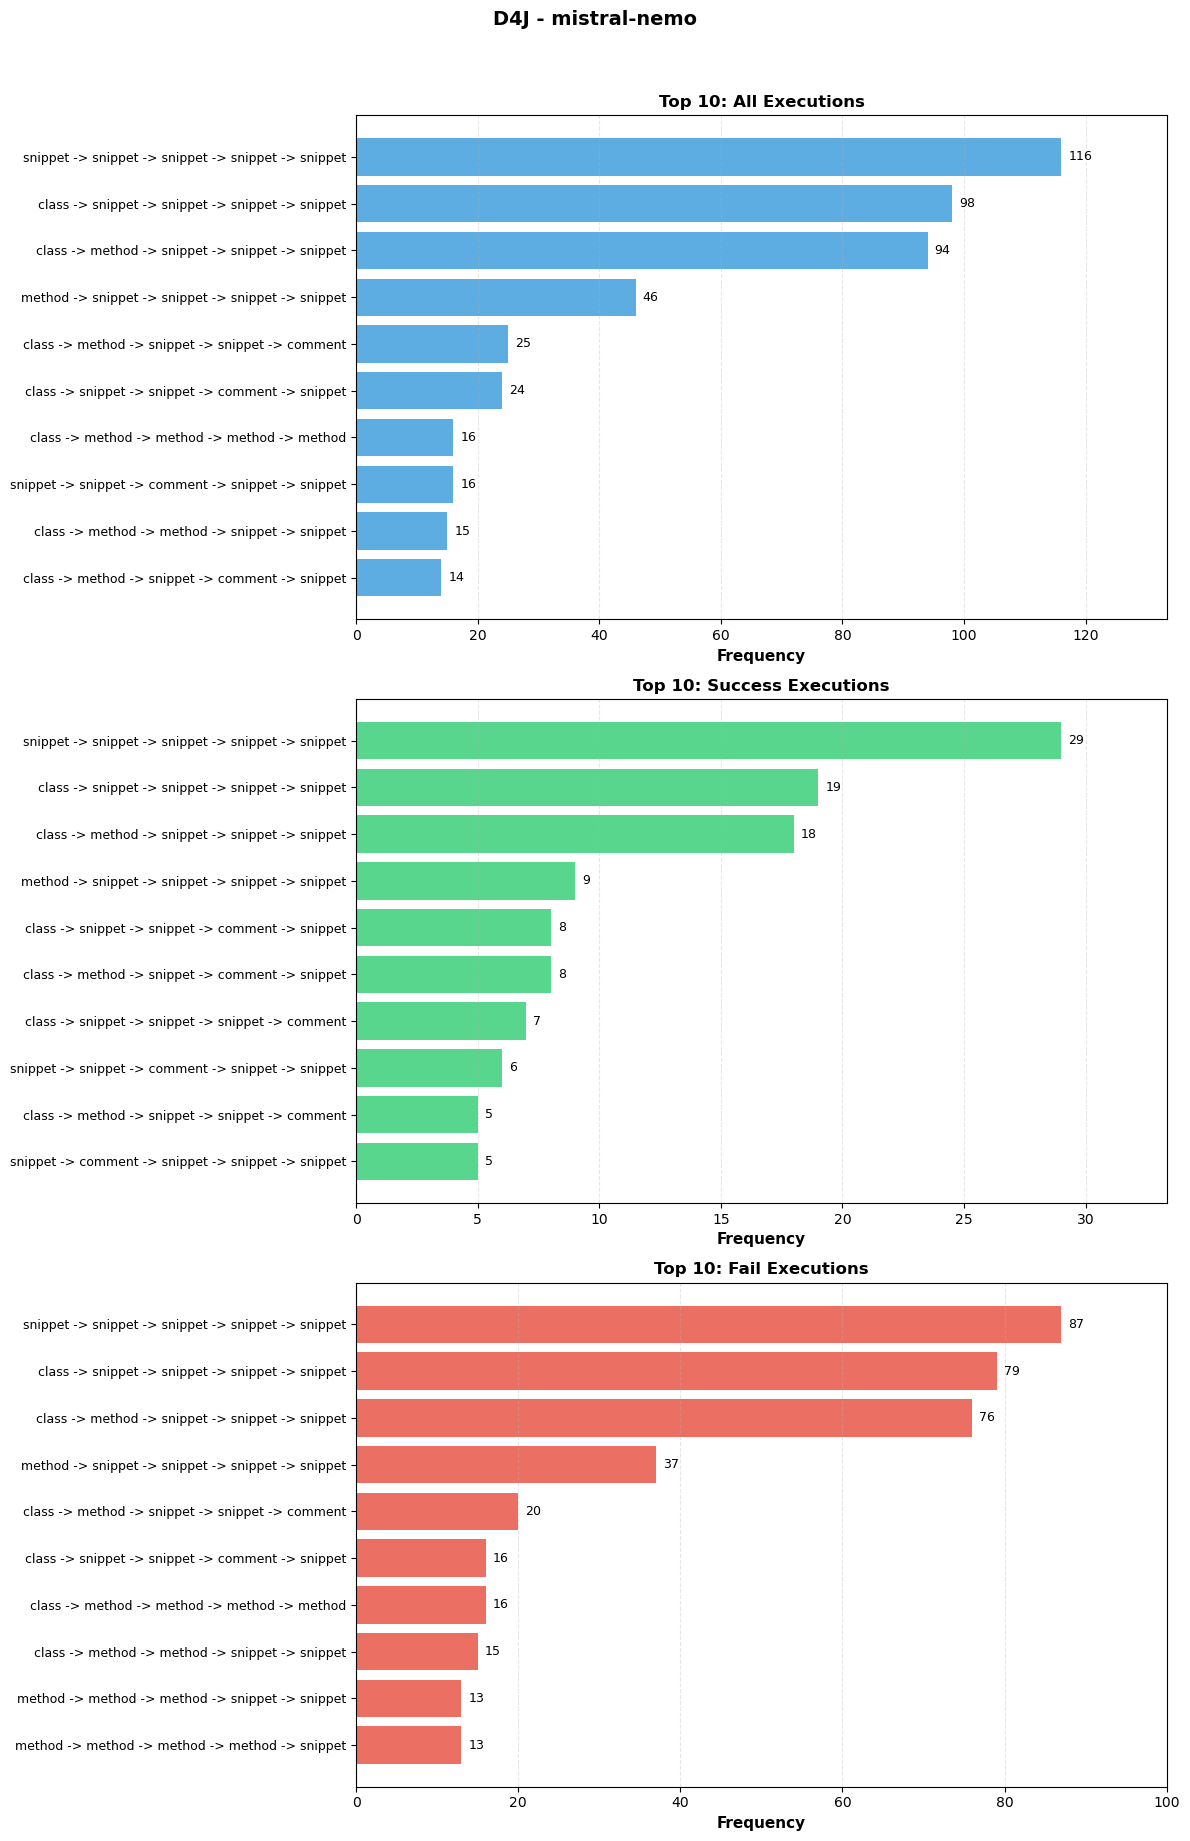


Benchmark: d4j | Model: qwen2.5-coder


Total 5-grams collected: 998

Total 5-grams collected: 256

Total 5-grams collected: 742


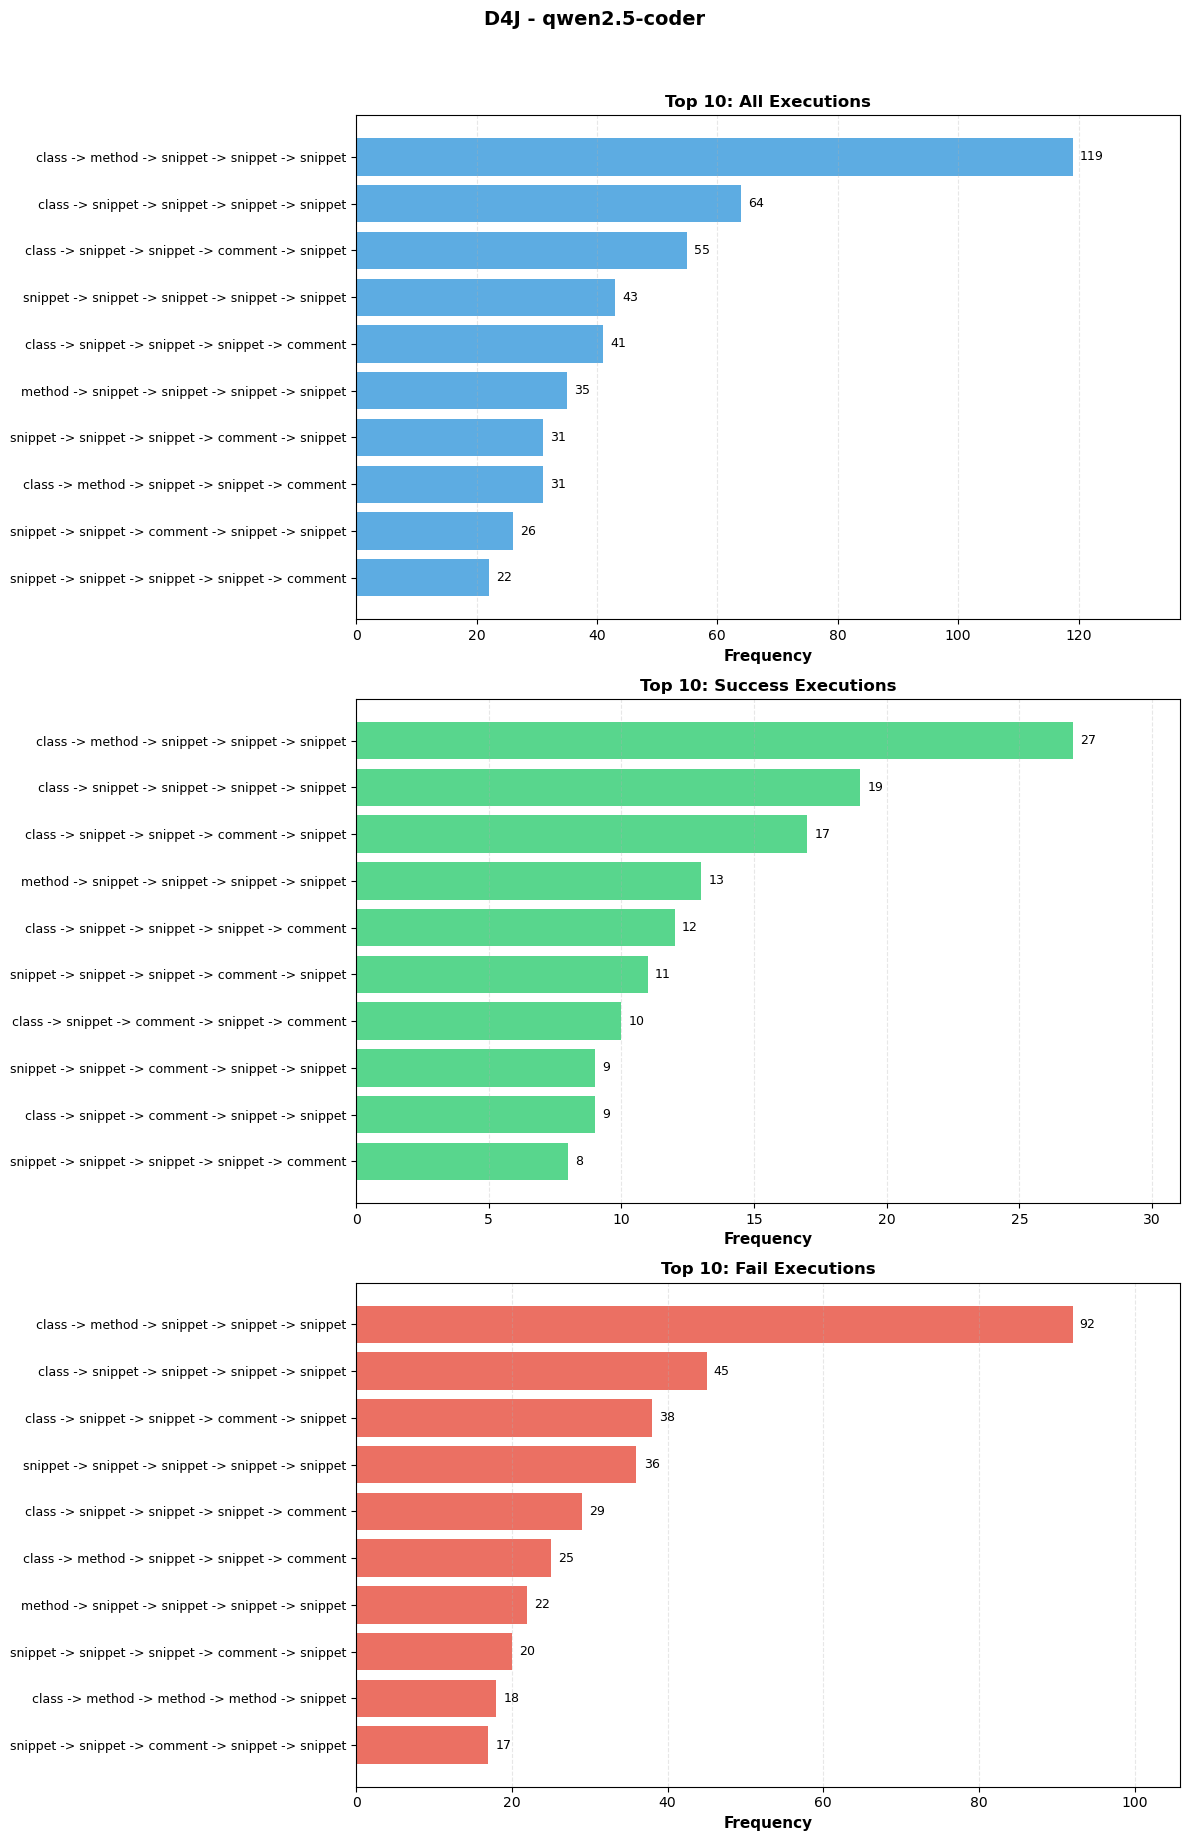


Benchmark: bip | Model: llama3


Total 5-grams collected: 7675

Total 5-grams collected: 763

Total 5-grams collected: 6912


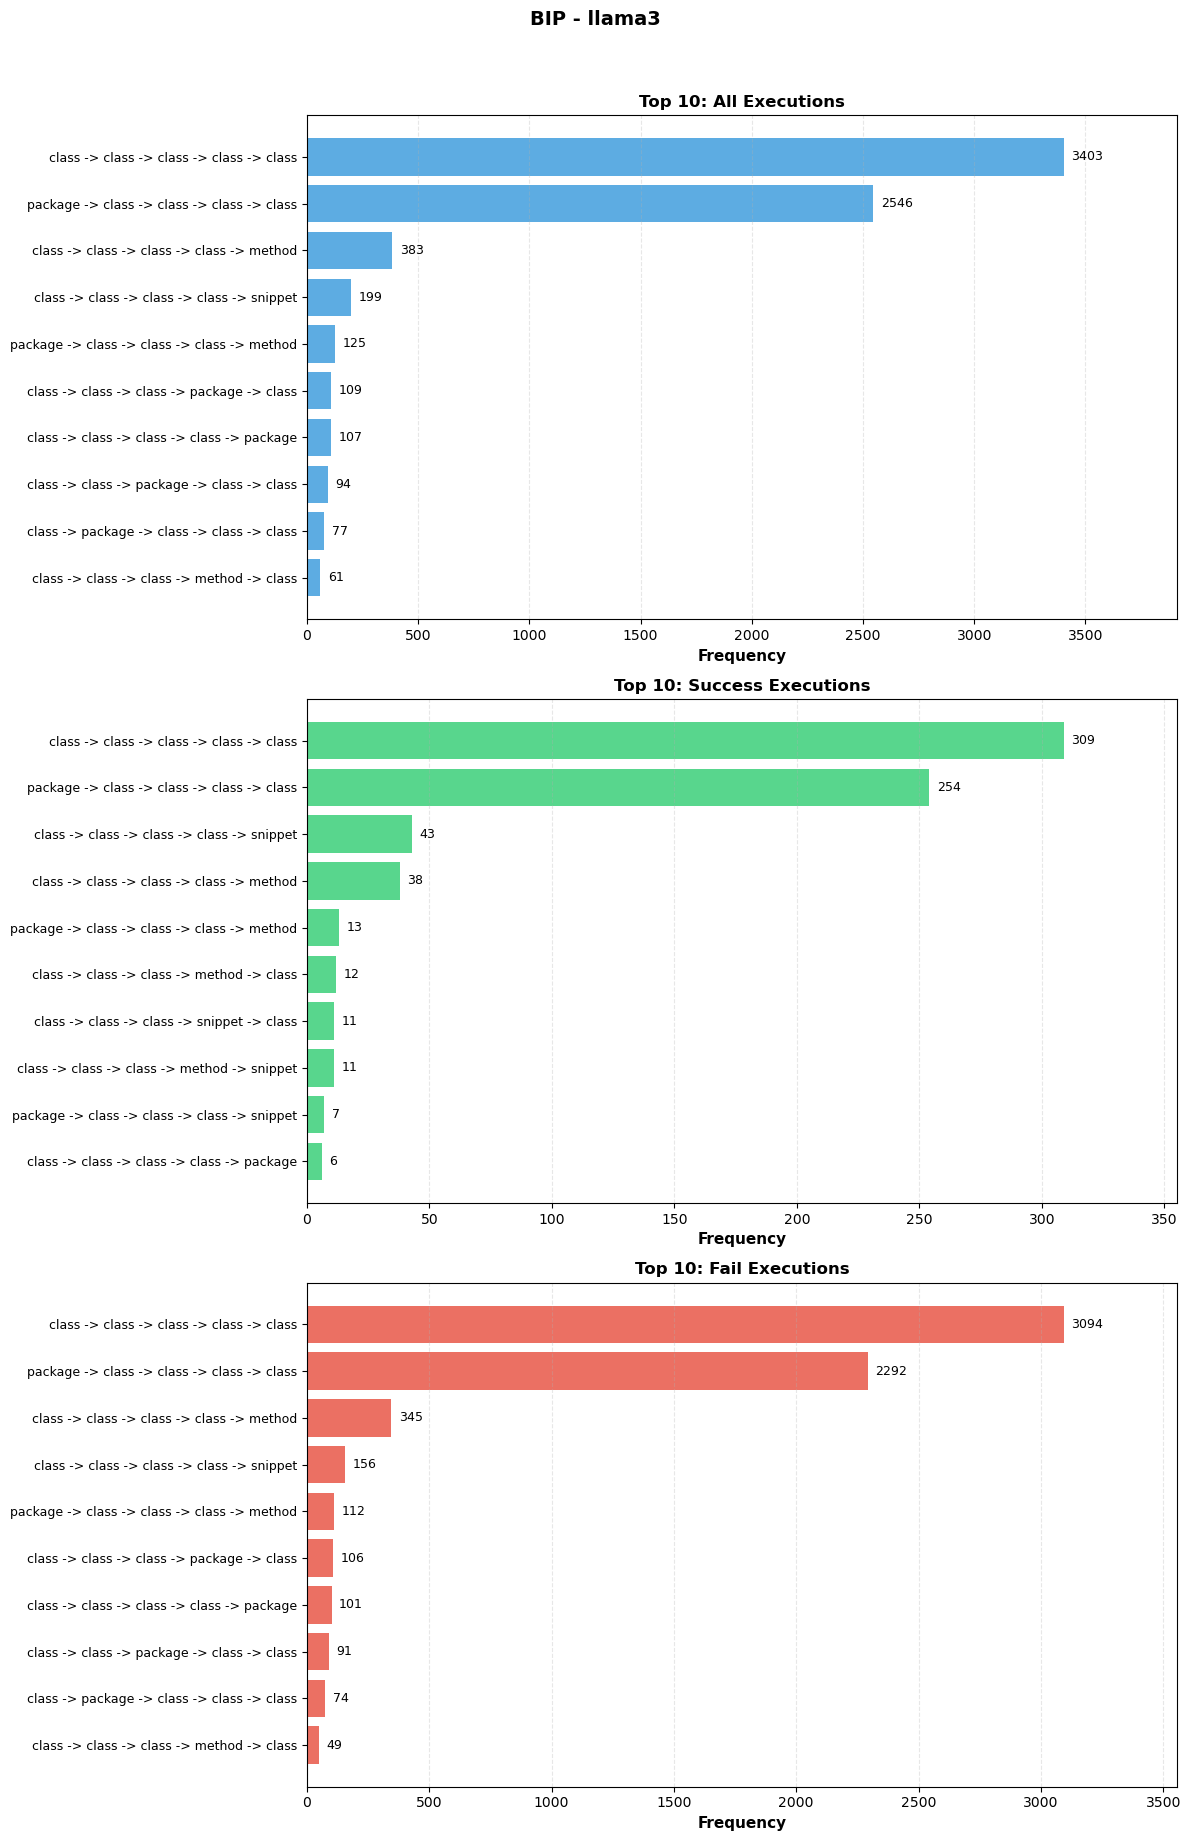


Benchmark: bip | Model: llama3.1


Total 5-grams collected: 12315

Total 5-grams collected: 1990

Total 5-grams collected: 10325


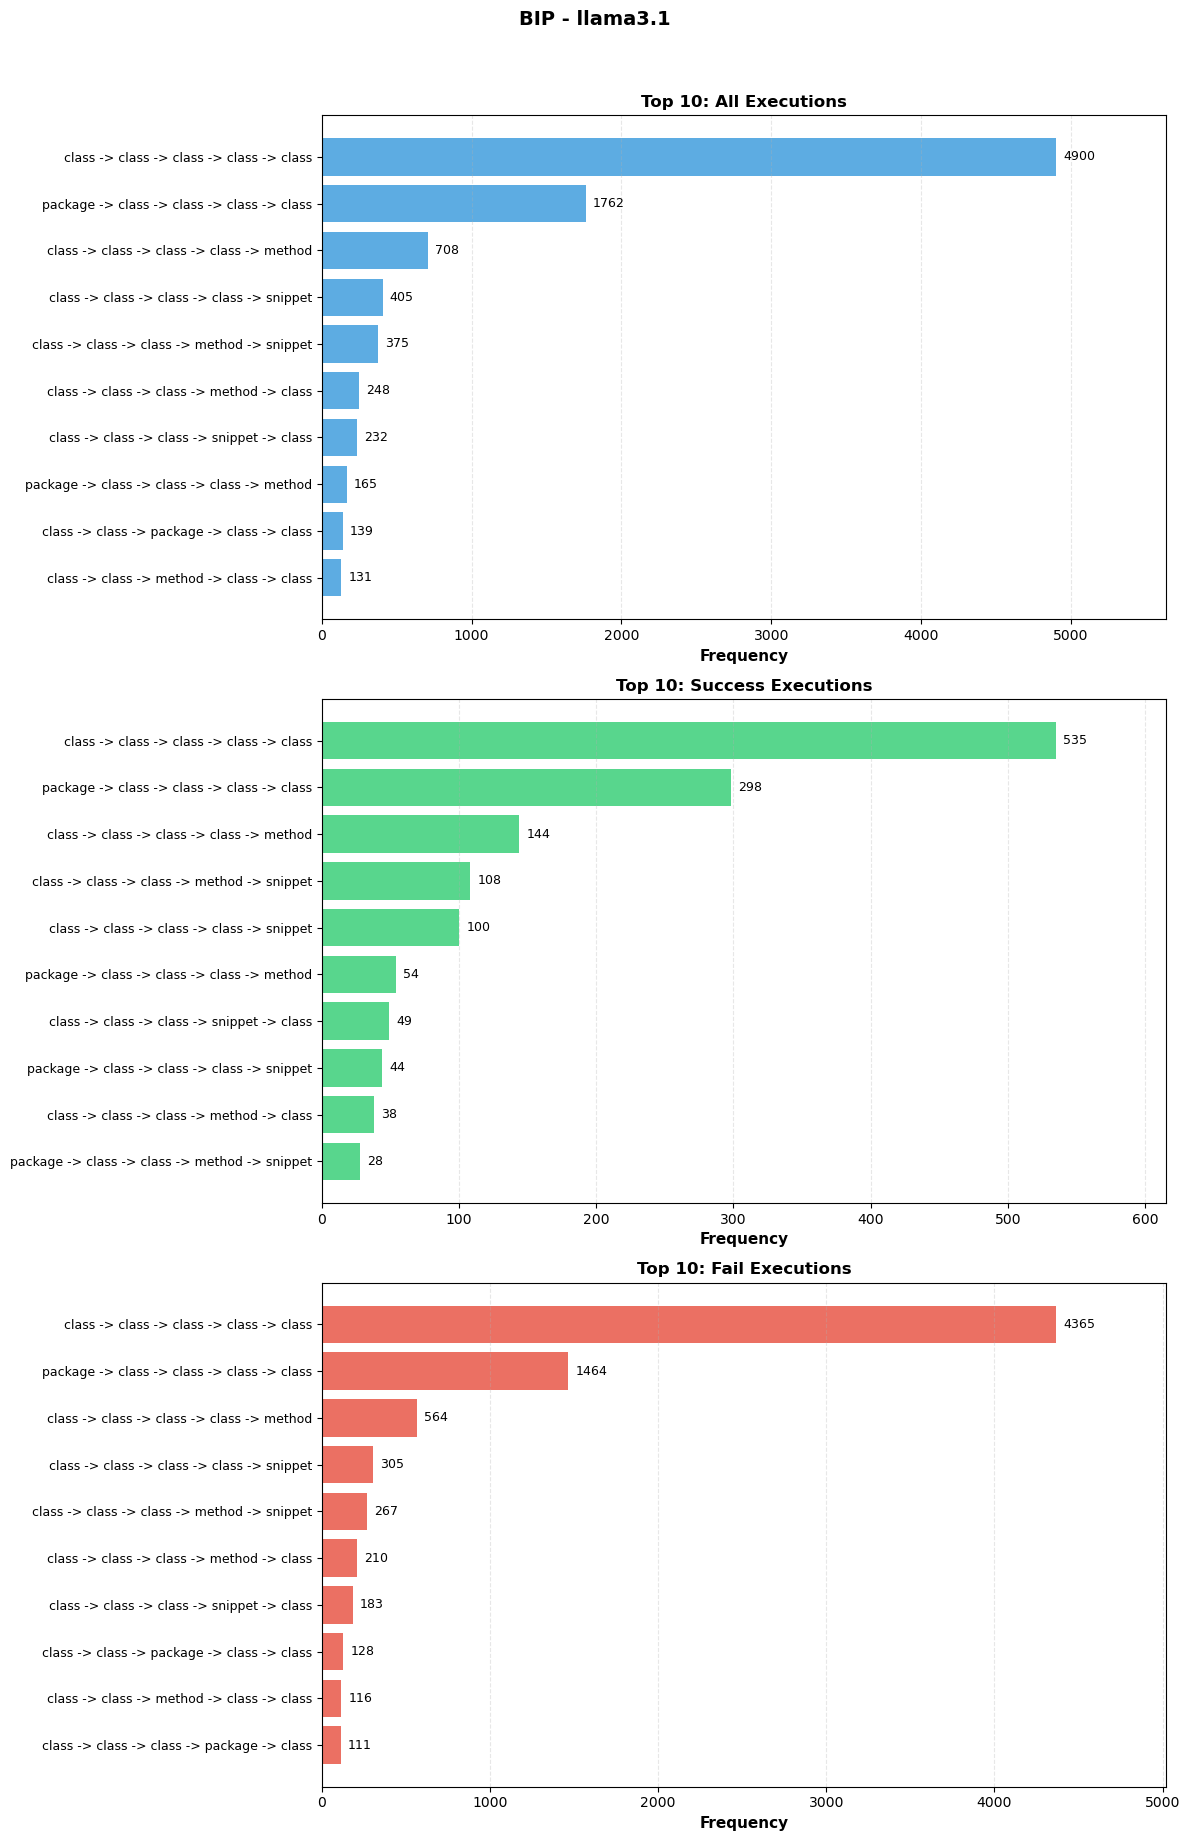


Benchmark: bip | Model: mistral-nemo


Total 5-grams collected: 723

Total 5-grams collected: 133

Total 5-grams collected: 590


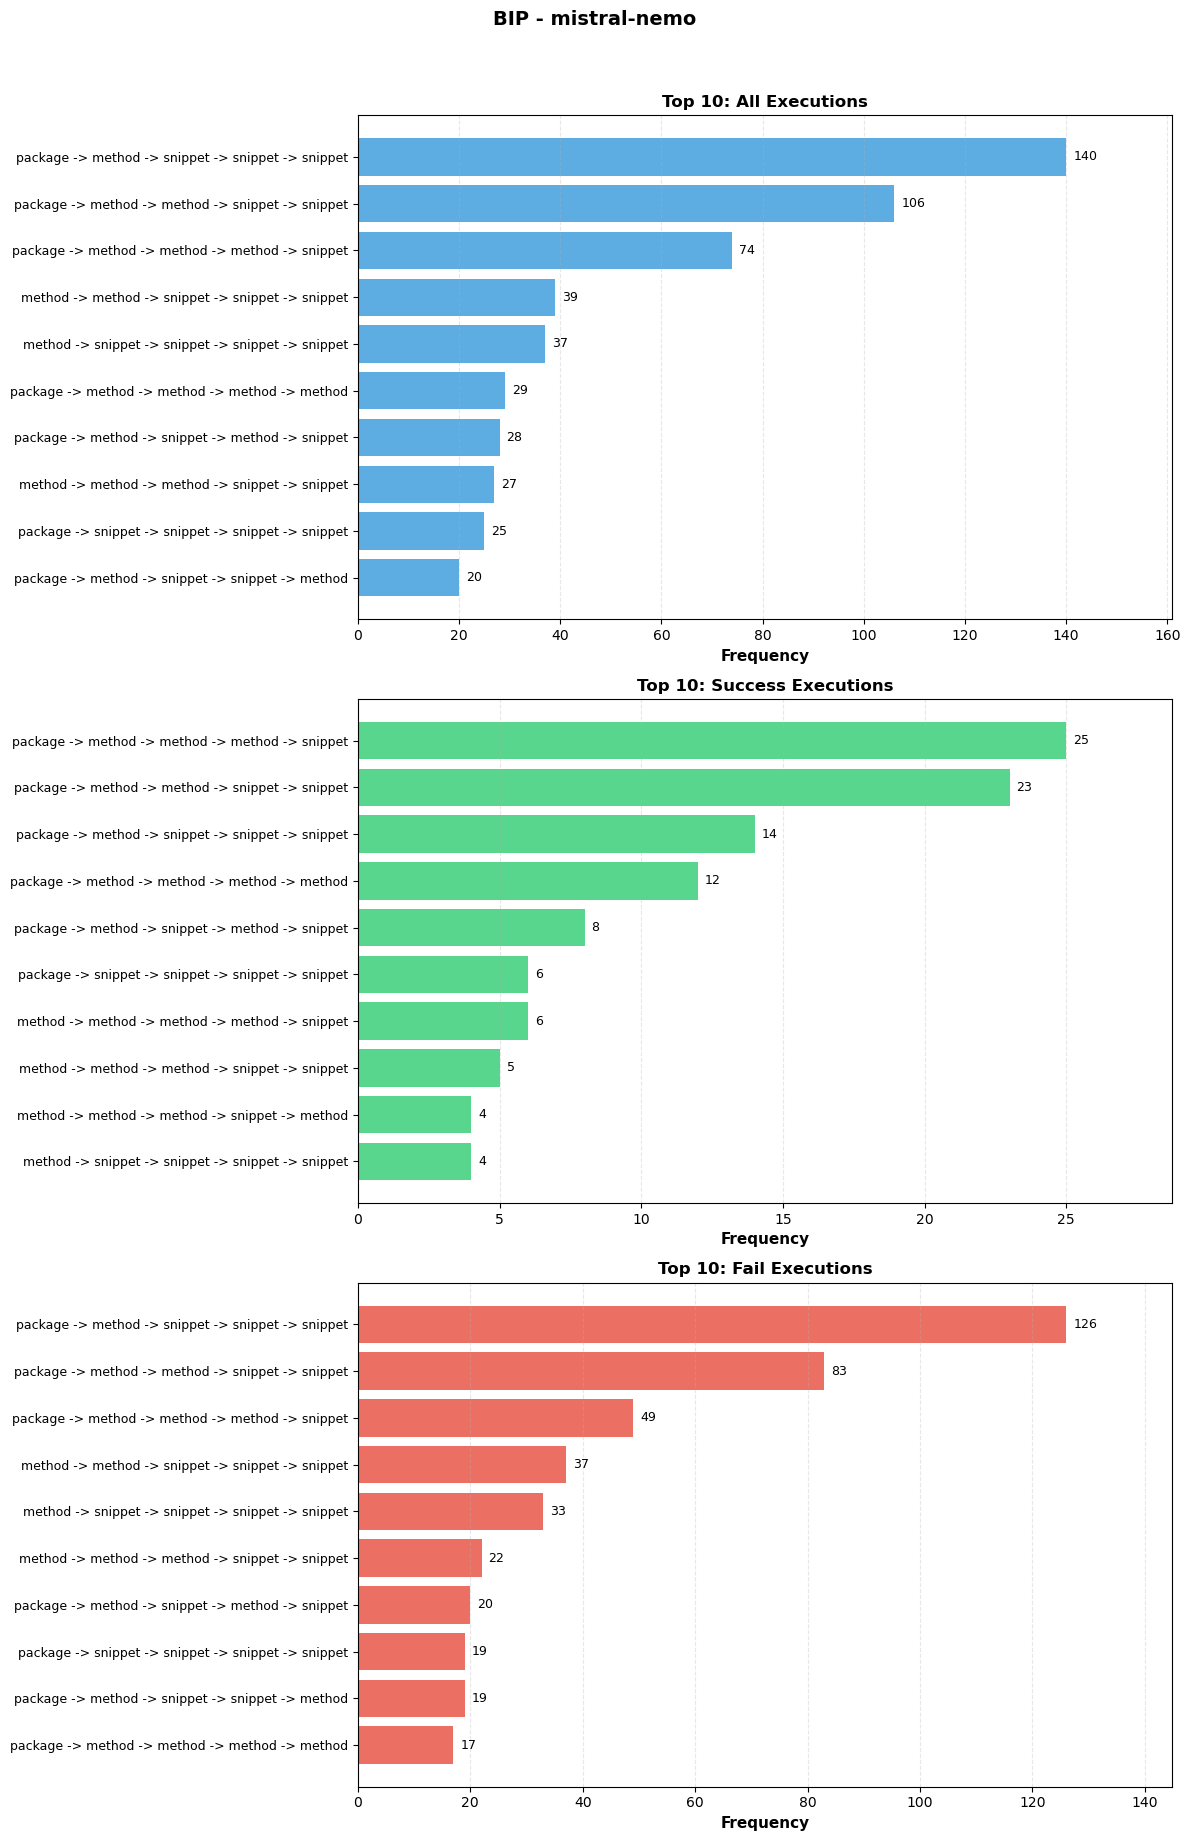


Benchmark: bip | Model: qwen2.5-coder


Total 5-grams collected: 769

Total 5-grams collected: 145

Total 5-grams collected: 624


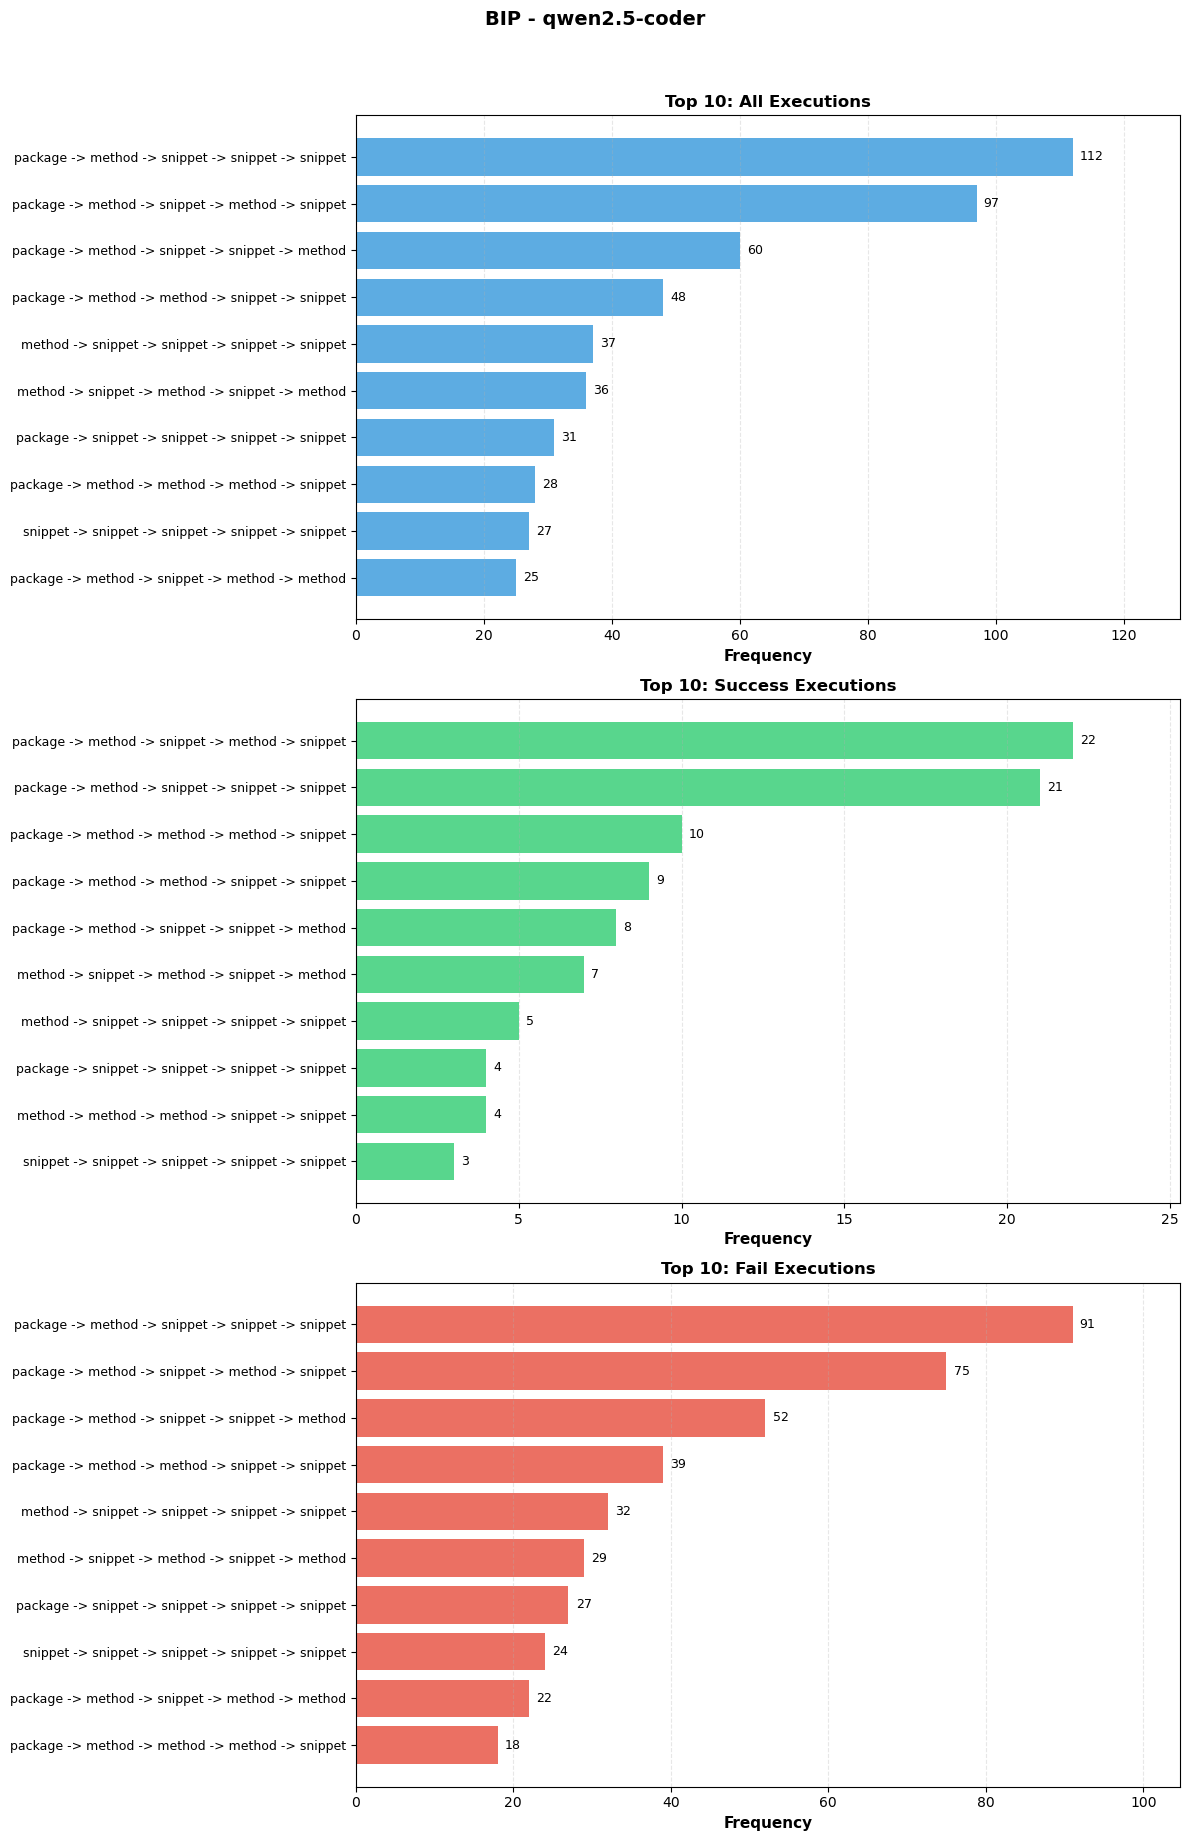

In [9]:
# Visualize Top 10 patterns separately for all/success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comments': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
n=5
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)
        success_ngrams = get_ngrams_for_success_executions(bm, model, n)
        fail_ngrams = get_ngrams_for_fail_executions(bm, model, n)
        
        all_counter = Counter(all_ngrams)
        success_counter = Counter(success_ngrams)
        fail_counter = Counter(fail_ngrams)
        
        # Get top 10 from each counter
        top_10_all = [(shorten_pattern(pattern), count) for pattern, count in all_counter.most_common(10)]
        top_10_success = [(shorten_pattern(pattern), count) for pattern, count in success_counter.most_common(10)]
        top_10_fail = [(shorten_pattern(pattern), count) for pattern, count in fail_counter.most_common(10)]
        
        # Create 3 subplots
        fig, axes = plt.subplots(3, 1, figsize=(12, 18))
        
        # Plot 1: All Executions
        patterns_all = [p[0] for p in top_10_all]
        counts_all = [p[1] for p in top_10_all]
        
        axes[0].barh(range(len(patterns_all)), counts_all, color='#3498db', alpha=0.8)
        axes[0].set_yticks(range(len(patterns_all)))
        axes[0].set_yticklabels(patterns_all, fontsize=9)
        axes[0].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 10: All Executions', fontsize=12, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(axis='x', alpha=0.3, linestyle='--')

        axes[0].set_xlim(0, max(counts_all)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_all):
            axes[0].text(v + max(counts_all)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 2: Success Executions
        patterns_success = [p[0] for p in top_10_success]
        counts_success = [p[1] for p in top_10_success]
        
        axes[1].barh(range(len(patterns_success)), counts_success, color='#2ecc71', alpha=0.8)
        axes[1].set_yticks(range(len(patterns_success)))
        axes[1].set_yticklabels(patterns_success, fontsize=9)
        axes[1].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[1].set_title('Top 10: Success Executions', fontsize=12, fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].grid(axis='x', alpha=0.3, linestyle='--')

        axes[1].set_xlim(0, max(counts_success)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_success):
            axes[1].text(v + max(counts_success)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 3: Fail Executions
        patterns_fail = [p[0] for p in top_10_fail]
        counts_fail = [p[1] for p in top_10_fail]
        
        axes[2].barh(range(len(patterns_fail)), counts_fail, color='#e74c3c', alpha=0.8)
        axes[2].set_yticks(range(len(patterns_fail)))
        axes[2].set_yticklabels(patterns_fail, fontsize=9)
        axes[2].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[2].set_title('Top 10: Fail Executions', fontsize=12, fontweight='bold')
        axes[2].invert_yaxis()
        axes[2].grid(axis='x', alpha=0.3, linestyle='--')

        axes[2].set_xlim(0, max(counts_fail)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_fail):
            axes[2].text(v + max(counts_fail)*0.01, i, str(v), va='center', fontsize=9)
        
        # Overall title
        fig.suptitle(f'{bm.upper()} - {model}', fontsize=14, fontweight='bold', y=1.02)
        
        plt.tight_layout()
        plt.show()

### 4-gram

In [10]:
# Get n-gram: frequencies for all benchmarks and models
n = 4
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)

        all_counter = Counter(all_ngrams)

        results = []
        for ngram, count in all_counter.most_common():
            results.append({
                f'{n}gram': ngram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_dir = f"./{n}gram_frequency/autofl/all_executions"
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, f"{bm}_{model}_{n}gram_frequencies.csv")
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique {n}-gram")





Total 4-grams collected: 3477
Saved ./4gram_frequency/autofl/all_executions/d4j_llama3_4gram_frequencies.csv with 177 unique 4-gram

Total 4-grams collected: 8399
Saved ./4gram_frequency/autofl/all_executions/d4j_llama3.1_4gram_frequencies.csv with 224 unique 4-gram

Total 4-grams collected: 1523
Saved ./4gram_frequency/autofl/all_executions/d4j_mistral-nemo_4gram_frequencies.csv with 67 unique 4-gram

Total 4-grams collected: 2082
Saved ./4gram_frequency/autofl/all_executions/d4j_qwen2.5-coder_4gram_frequencies.csv with 98 unique 4-gram

Total 4-grams collected: 11179
Saved ./4gram_frequency/autofl/all_executions/bip_llama3_4gram_frequencies.csv with 100 unique 4-gram

Total 4-grams collected: 15279
Saved ./4gram_frequency/autofl/all_executions/bip_llama3.1_4gram_frequencies.csv with 183 unique 4-gram

Total 4-grams collected: 2017
Saved ./4gram_frequency/autofl/all_executions/bip_mistral-nemo_4gram_frequencies.csv with 33 unique 4-gram

Total 4-grams collected: 1831
Saved ./4gram_fr


Benchmark: d4j | Model: llama3


Total 4-grams collected: 3477

Total 4-grams collected: 950

Total 4-grams collected: 2527
                                pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
  class -> method -> snippet -> comment             460                 164              296         35.7%      64.3%
  class -> method -> snippet -> snippet             384                 117              267         30.5%      69.5%
    class -> method -> method -> method             190                  31              159         16.3%      83.7%
   class -> method -> snippet -> method             151                  36              115         23.8%      76.2%
method -> snippet -> snippet -> snippet             139                  56               83         40.3%      59.7%
   class -> method -> method -> snippet             137                  35              102         25.5%      74.5%
  class -> method -> comment -> snippet          

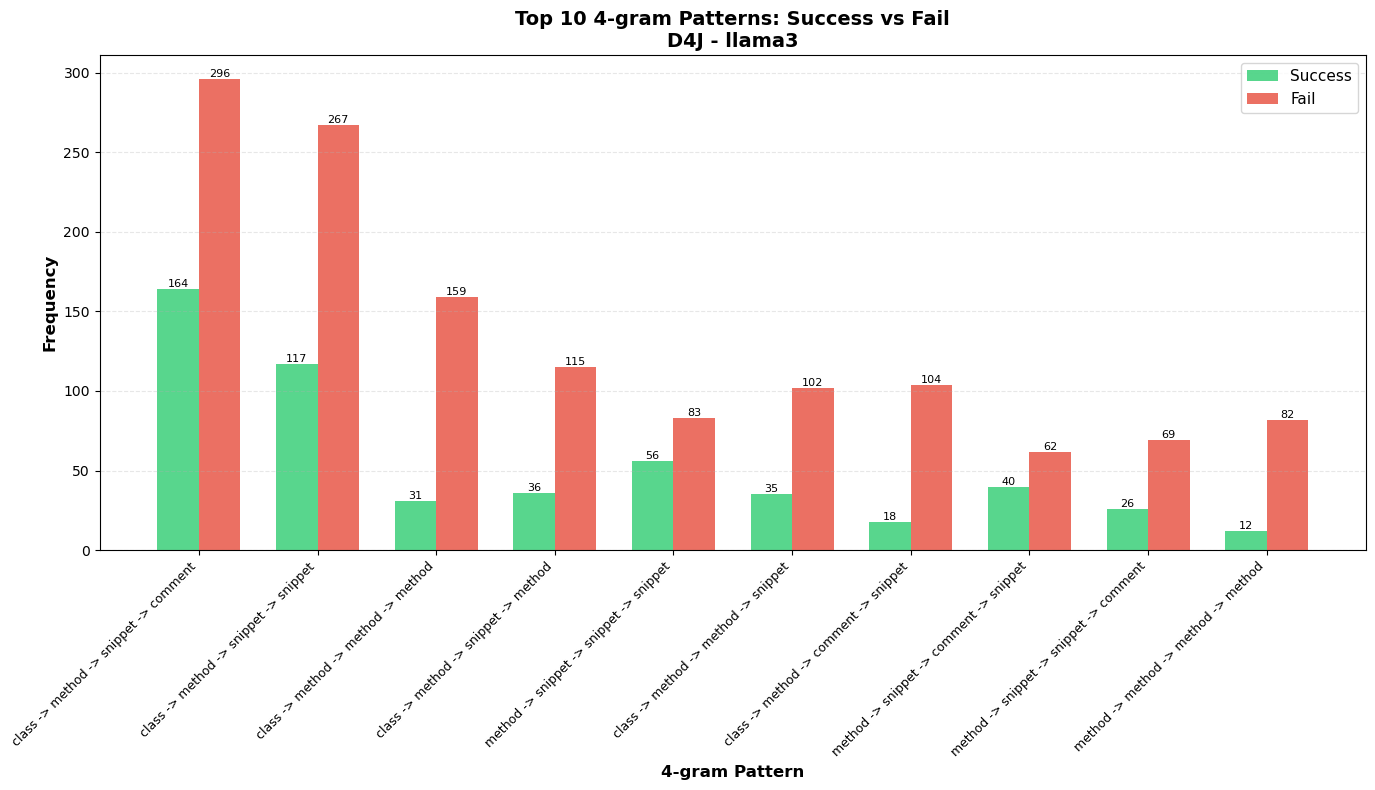


Benchmark: d4j | Model: llama3.1


Total 4-grams collected: 8399

Total 4-grams collected: 1663

Total 4-grams collected: 6736
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet -> snippet             509                 159              350         31.2%      68.8%
snippet -> snippet -> snippet -> snippet             474                 118              356         24.9%      75.1%
     class -> method -> method -> method             373                   8              365          2.1%      97.9%
 method -> snippet -> snippet -> snippet             323                  86              237         26.6%      73.4%
   class -> method -> comment -> snippet             321                 127              194         39.6%      60.4%
   class -> method -> snippet -> comment             316                 129              187         40.8%      59.2%
     method -> method -> class -> metho

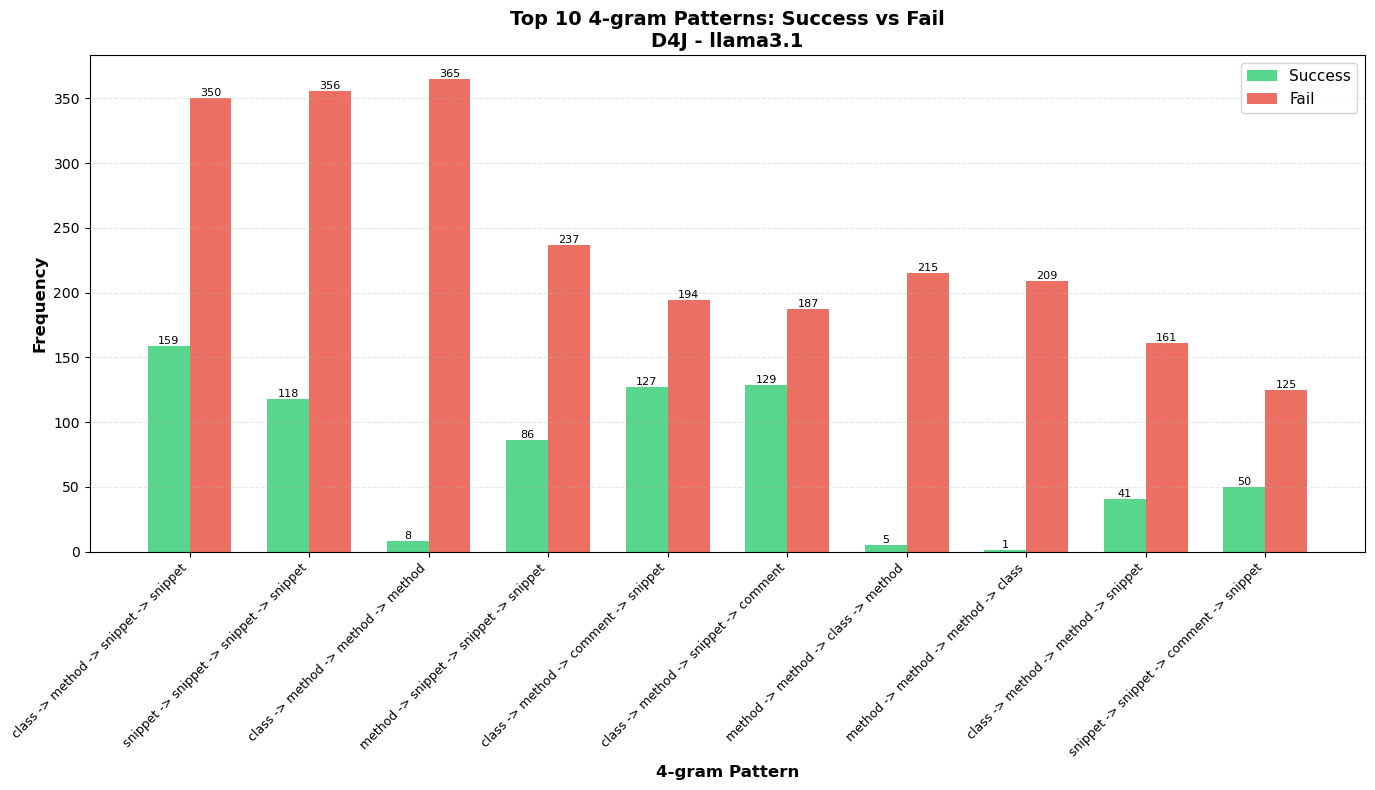


Benchmark: d4j | Model: mistral-nemo


Total 4-grams collected: 1523

Total 4-grams collected: 330

Total 4-grams collected: 1193
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
snippet -> snippet -> snippet -> snippet             264                  60              204         22.7%      77.3%
   class -> method -> snippet -> snippet             214                  36              178         16.8%      83.2%
  class -> snippet -> snippet -> snippet             187                  42              145         22.5%      77.5%
   class -> method -> snippet -> comment             127                  41               86         32.3%      67.7%
 method -> snippet -> snippet -> snippet             101                  18               83         17.8%      82.2%
  class -> snippet -> snippet -> comment              60                  13               47         21.7%      78.3%
    class -> method -> method -> sni

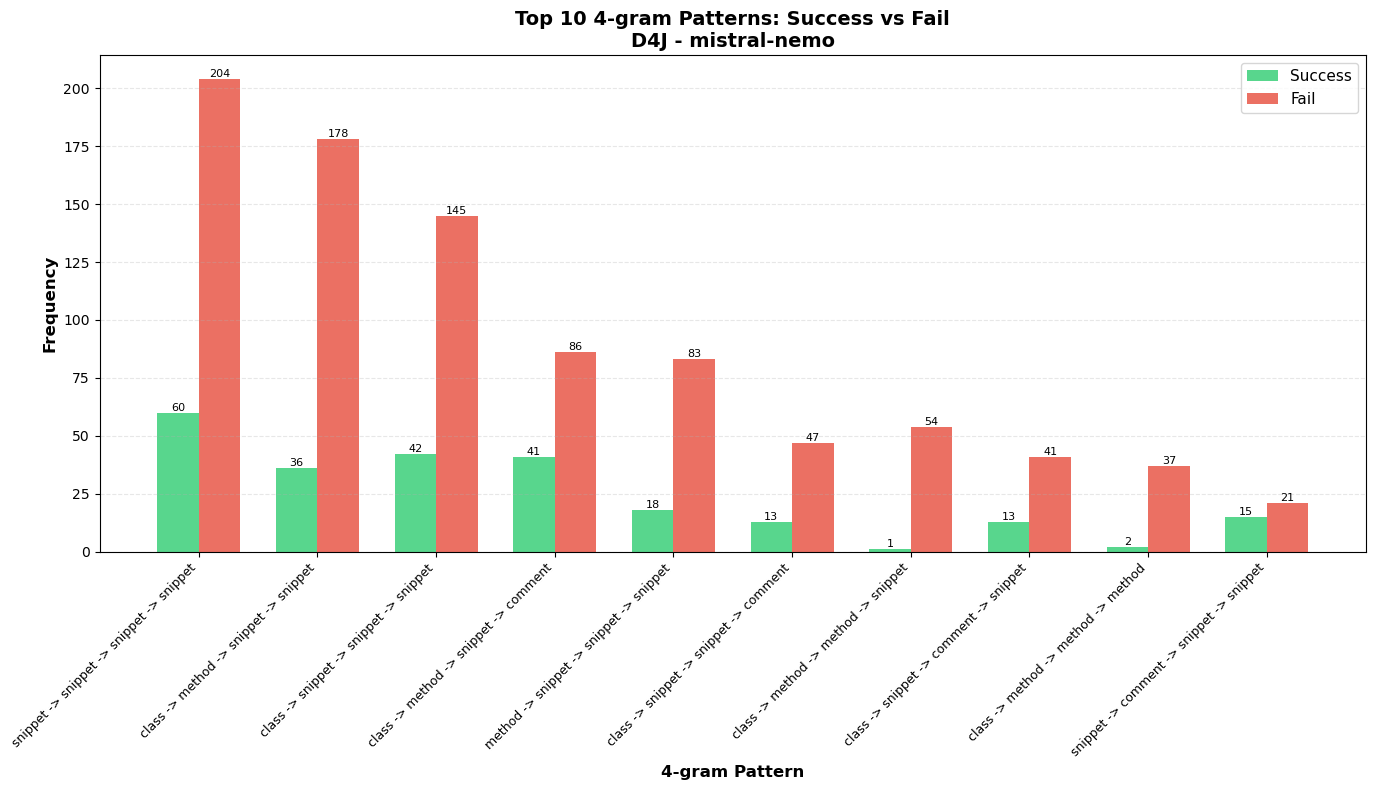


Benchmark: d4j | Model: qwen2.5-coder


Total 4-grams collected: 2082

Total 4-grams collected: 503

Total 4-grams collected: 1579
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet -> snippet             284                  59              225         20.8%      79.2%
  class -> snippet -> snippet -> snippet             203                  54              149         26.6%      73.4%
snippet -> snippet -> snippet -> snippet             146                  41              105         28.1%      71.9%
 method -> snippet -> snippet -> snippet             131                  29              102         22.1%      77.9%
snippet -> snippet -> comment -> snippet             102                  32               70         31.4%      68.6%
  class -> snippet -> snippet -> comment              96                  24               72         25.0%      75.0%
   class -> method -> snippet -> co

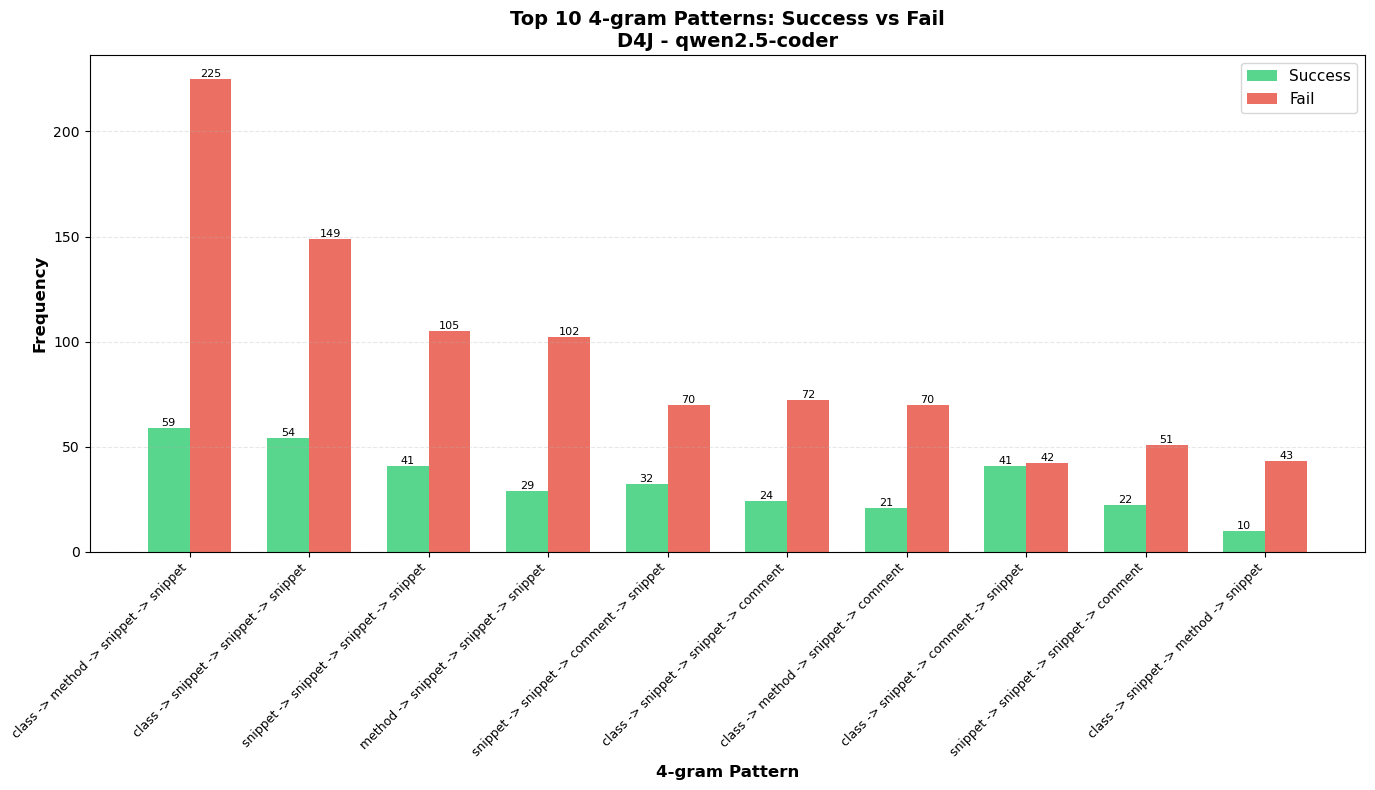


Benchmark: bip | Model: llama3


Total 4-grams collected: 11179

Total 4-grams collected: 1152

Total 4-grams collected: 10027
                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> class -> class -> class            5957                 564             5393          9.5%      90.5%
 package -> class -> class -> class            3360                 348             3012         10.4%      89.6%
  class -> class -> class -> method             509                  51              458         10.0%      90.0%
 class -> class -> class -> snippet             243                  50              193         20.6%      79.4%
 class -> class -> class -> package             156                   9              147          5.8%      94.2%
 class -> class -> package -> class             137                   4              133          2.9%      97.1%
 class -> package -> class -> class             114                   6   

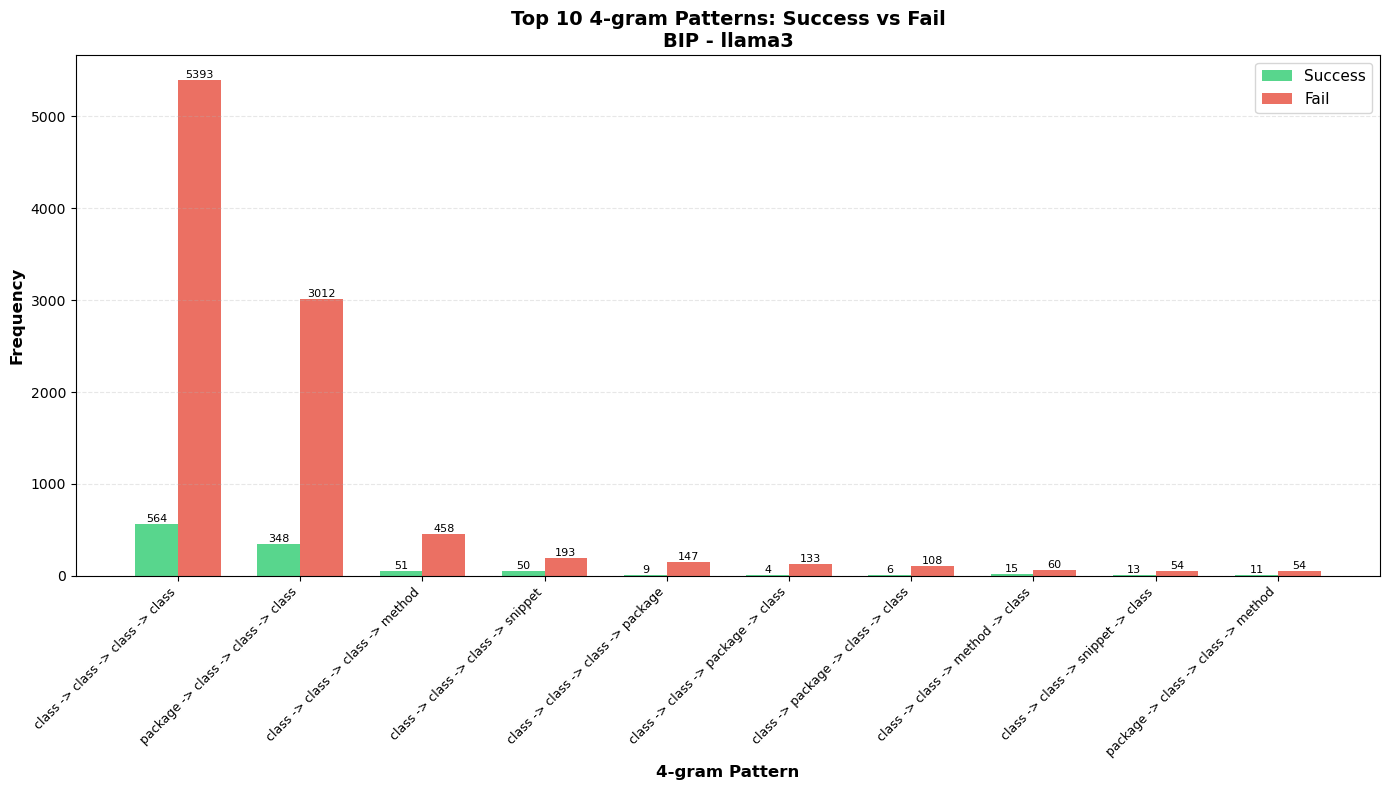


Benchmark: bip | Model: llama3.1


Total 4-grams collected: 15279

Total 4-grams collected: 2662

Total 4-grams collected: 12617
                                pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
       class -> class -> class -> class            6728                 841             5887         12.5%      87.5%
     package -> class -> class -> class            2145                 418             1727         19.5%      80.5%
      class -> class -> class -> method             888                 201              687         22.6%      77.4%
     class -> class -> class -> snippet             547                 149              398         27.2%      72.8%
    class -> class -> method -> snippet             455                 138              317         30.3%      69.7%
     class -> class -> snippet -> class             304                  69              235         22.7%      77.3%
      class -> class -> method -> class     

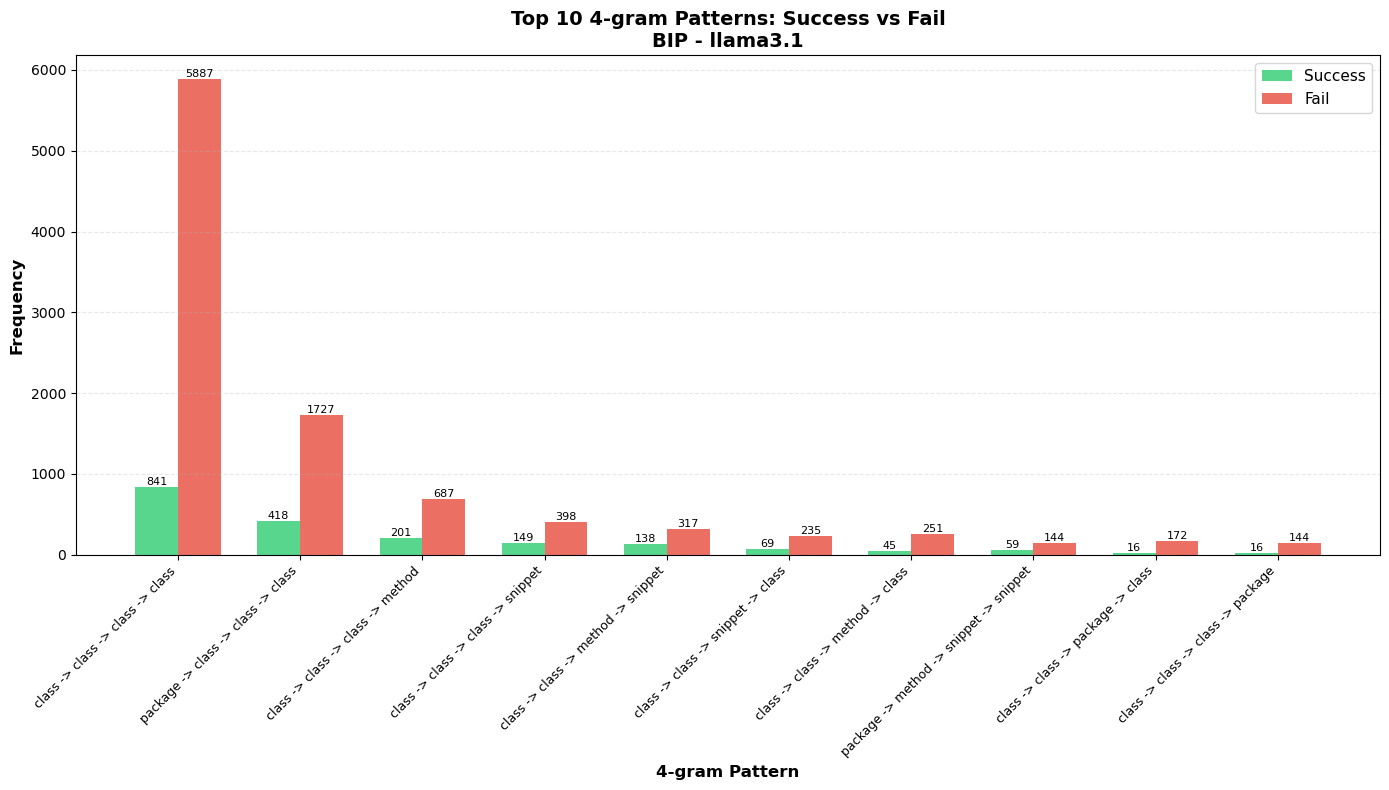


Benchmark: bip | Model: mistral-nemo


Total 4-grams collected: 2017

Total 4-grams collected: 441

Total 4-grams collected: 1576
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet -> snippet             557                 125              432         22.4%      77.6%
  package -> method -> method -> snippet             311                  78              233         25.1%      74.9%
 method -> snippet -> snippet -> snippet             183                  16              167          8.7%      91.3%
  method -> method -> snippet -> snippet             135                  28              107         20.7%      79.3%
   package -> method -> method -> method             127                  44               83         34.6%      65.4%
  package -> method -> snippet -> method             101                  17               84         16.8%      83.2%
   method -> method -> method -> sni

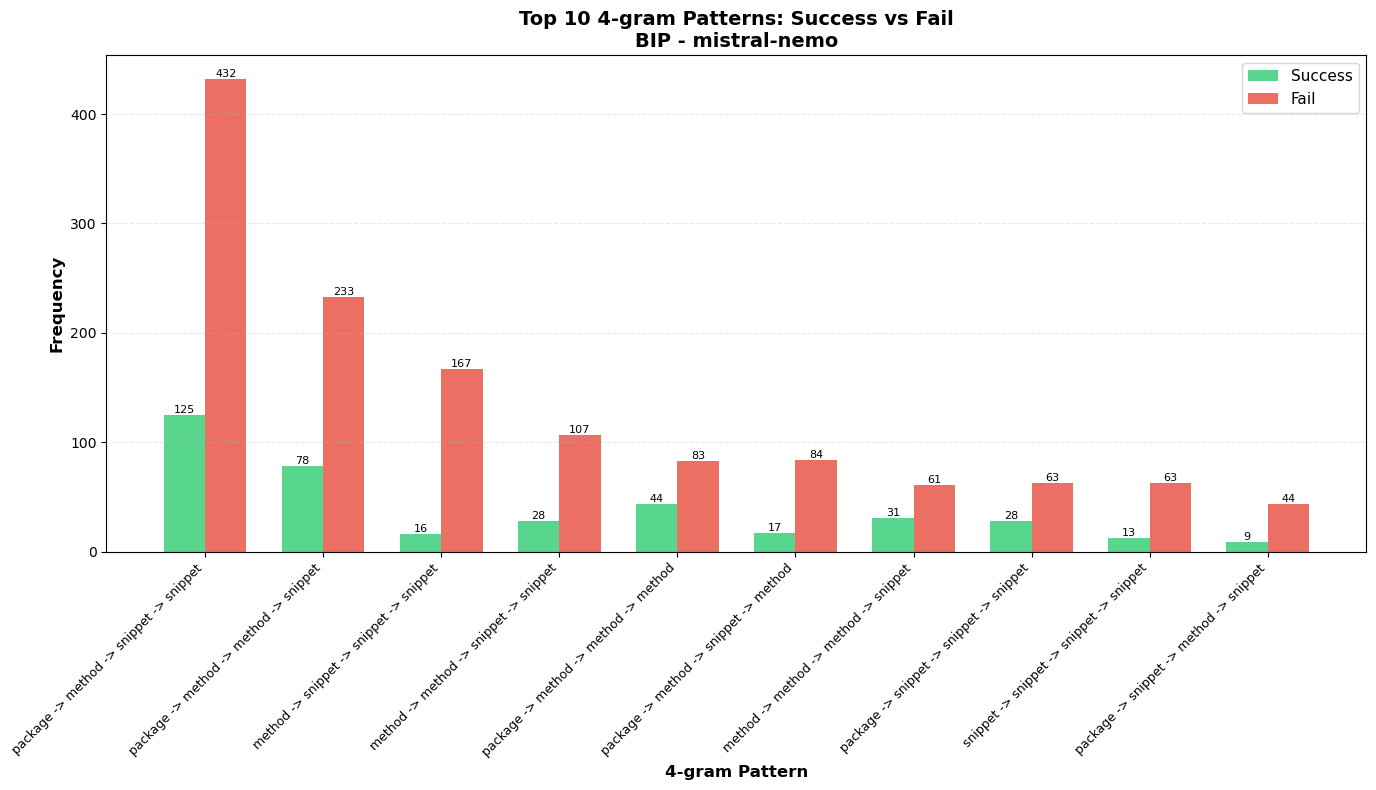


Benchmark: bip | Model: qwen2.5-coder


Total 4-grams collected: 1831

Total 4-grams collected: 370

Total 4-grams collected: 1461
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet -> snippet             394                  84              310         21.3%      78.7%
  package -> method -> snippet -> method             262                  52              210         19.8%      80.2%
  package -> method -> method -> snippet             152                  37              115         24.3%      75.7%
 method -> snippet -> snippet -> snippet             130                  24              106         18.5%      81.5%
  method -> snippet -> method -> snippet             114                  22               92         19.3%      80.7%
snippet -> snippet -> snippet -> snippet              95                  12               83         12.6%      87.4%
package -> snippet -> snippet -> sn

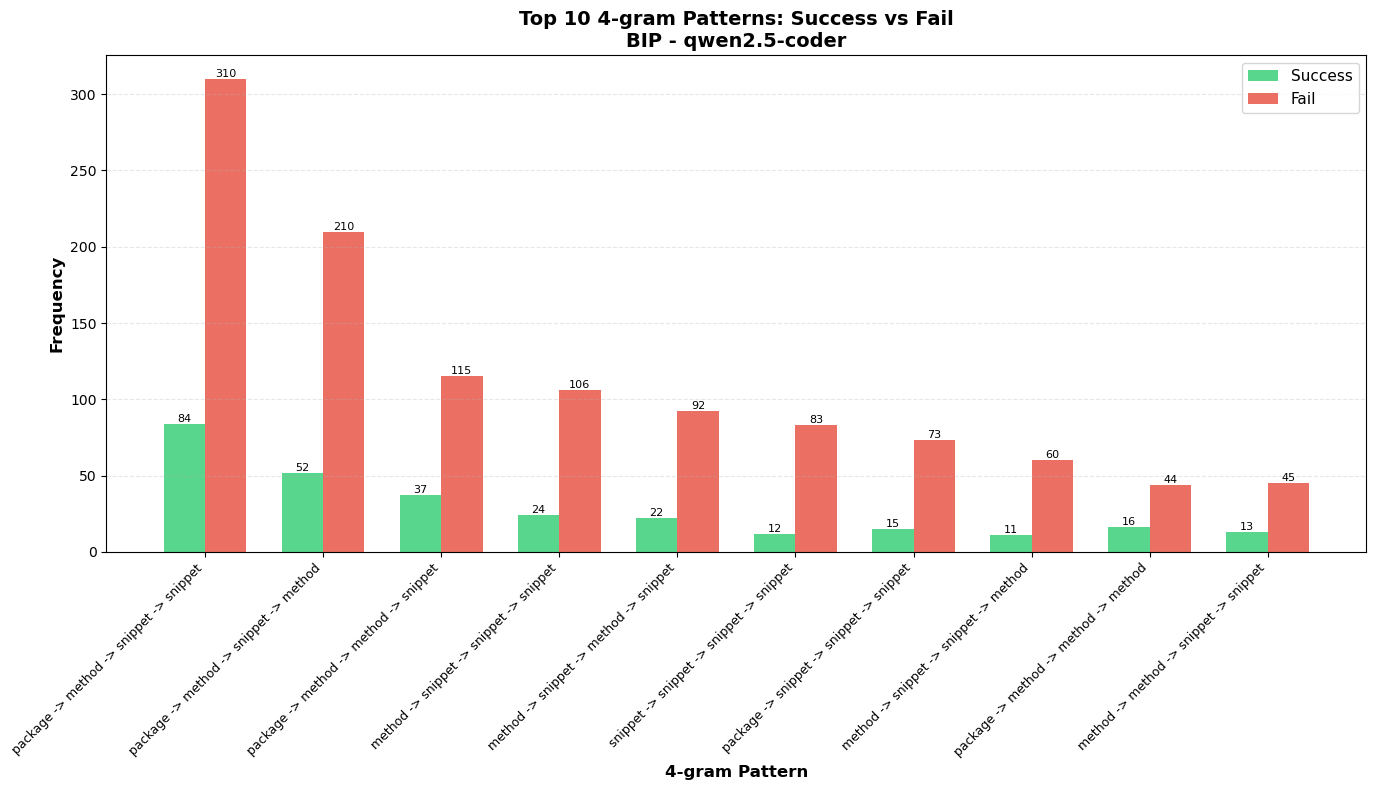

In [11]:
# Compare top 10 most frequent n-grams in all executions vs success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comments': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
n=4
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)
        success_ngrams = get_ngrams_for_success_executions(bm, model, n)
        fail_ngrams = get_ngrams_for_fail_executions(bm, model, n)
        
        all_counter = Counter(all_ngrams)
        success_counter = Counter(success_ngrams)
        fail_counter = Counter(fail_ngrams)
        
        # Get top 10 from all executions
        top_10_patterns = [pattern for pattern, count in all_counter.most_common(10)]
        
        # Create comparison table
        comparison_data = []
        for pattern in top_10_patterns:
            all_count = all_counter[pattern]
            success_count = success_counter[pattern]
            fail_count = fail_counter[pattern]
            
            comparison_data.append({
                'pattern': shorten_pattern(pattern),
                'all_executions': all_count,
                'success_executions': success_count,
                'fail_executions': fail_count,
                'success_ratio': f"{success_count/all_count*100:.1f}%" if all_count > 0 else "0%",
                'fail_ratio': f"{fail_count/all_count*100:.1f}%" if all_count > 0 else "0%"
            })
        
        # Display as DataFrame
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
        print()
        
        # Create bar chart
        fig, ax = plt.subplots(figsize=(14, 8))
        
        patterns = comparison_df['pattern'].tolist()
        success_counts = comparison_df['success_executions'].tolist()
        fail_counts = comparison_df['fail_executions'].tolist()
        
        x = np.arange(len(patterns))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, success_counts, width, label='Success', color='#2ecc71', alpha=0.8)
        bars2 = ax.bar(x + width/2, fail_counts, width, label='Fail', color='#e74c3c', alpha=0.8)
        
        ax.set_xlabel(f'{n}-gram Pattern', fontsize=12, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
        ax.set_title(f'Top 10 {n}-gram Patterns: Success vs Fail\n{bm.upper()} - {model}', fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(patterns, rotation=45, ha='right', fontsize=9)
        ax.legend(fontsize=11)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()


Benchmark: d4j | Model: llama3


Total 4-grams collected: 3477

Total 4-grams collected: 950

Total 4-grams collected: 2527


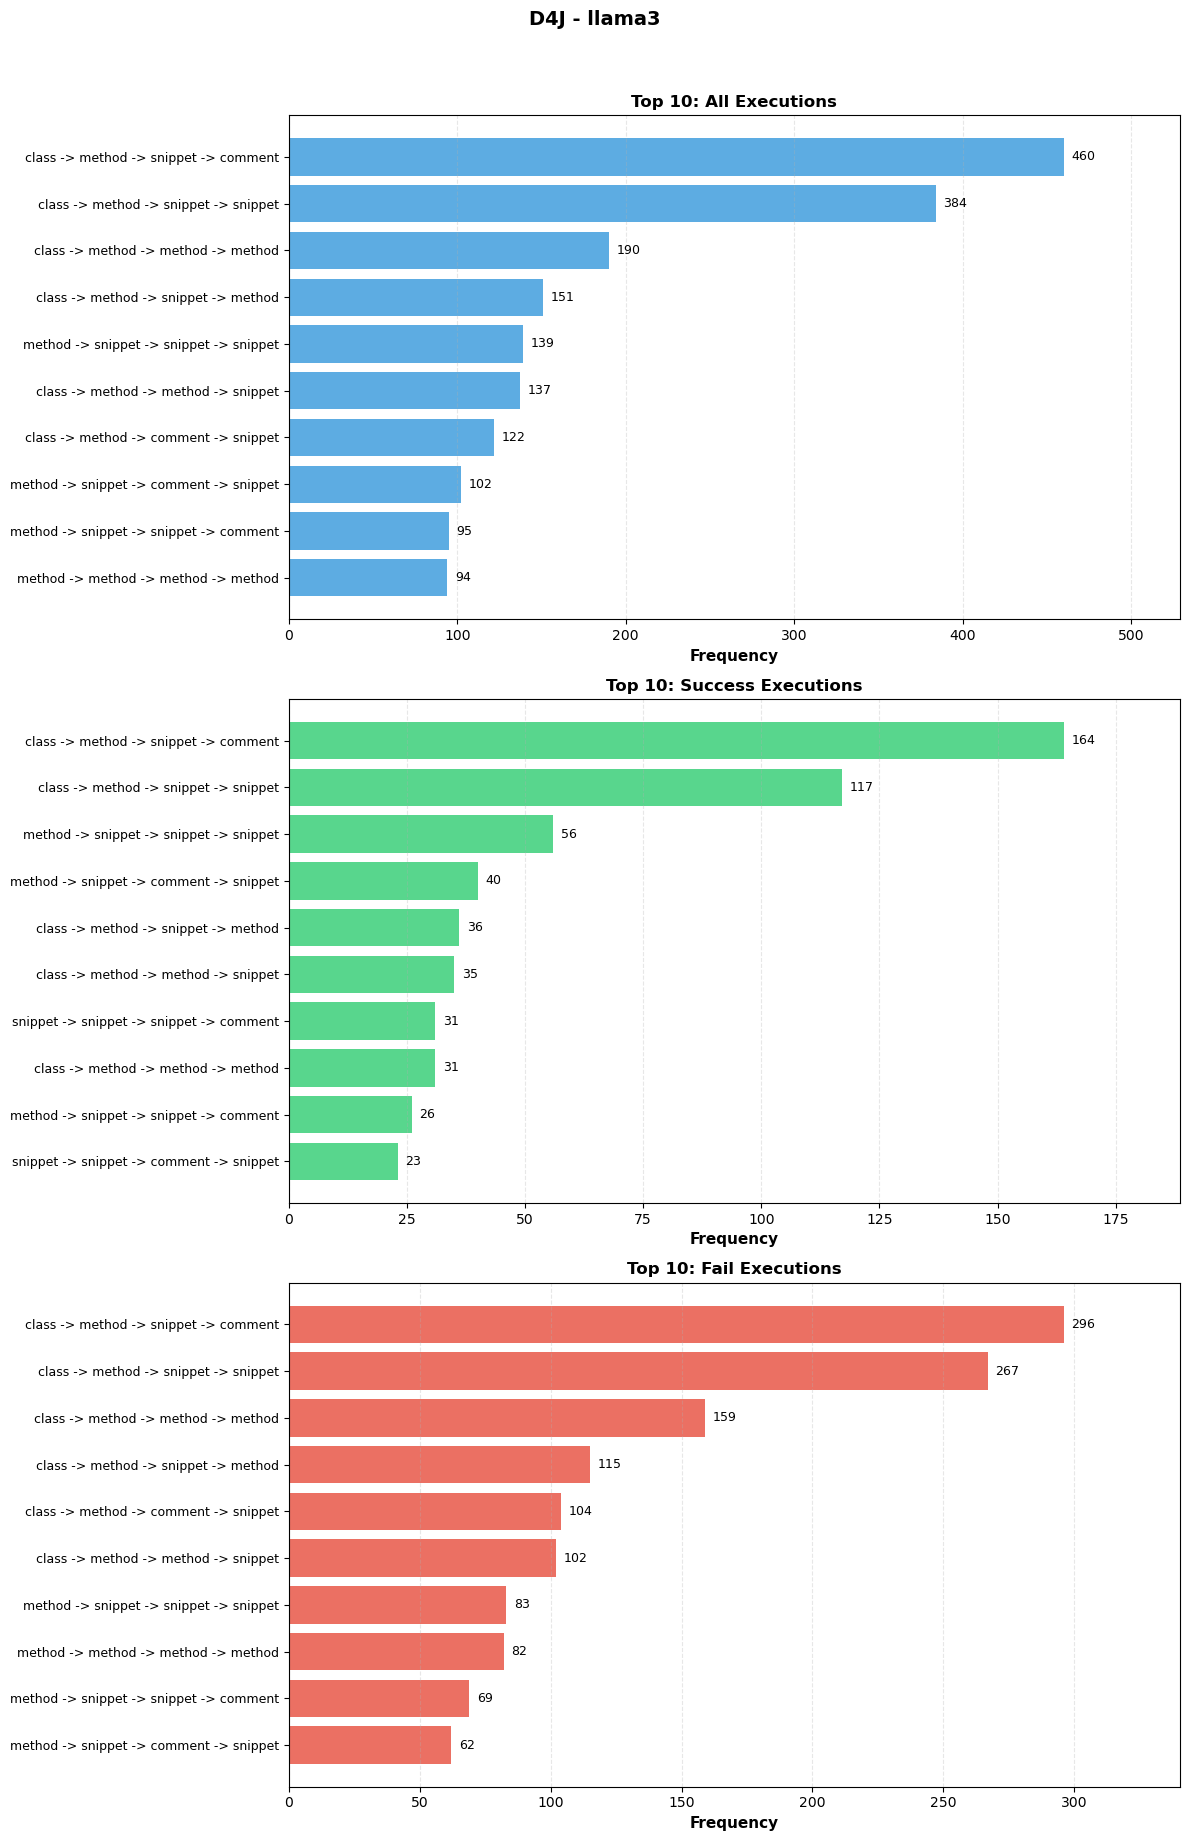


Benchmark: d4j | Model: llama3.1


Total 4-grams collected: 8399

Total 4-grams collected: 1663

Total 4-grams collected: 6736


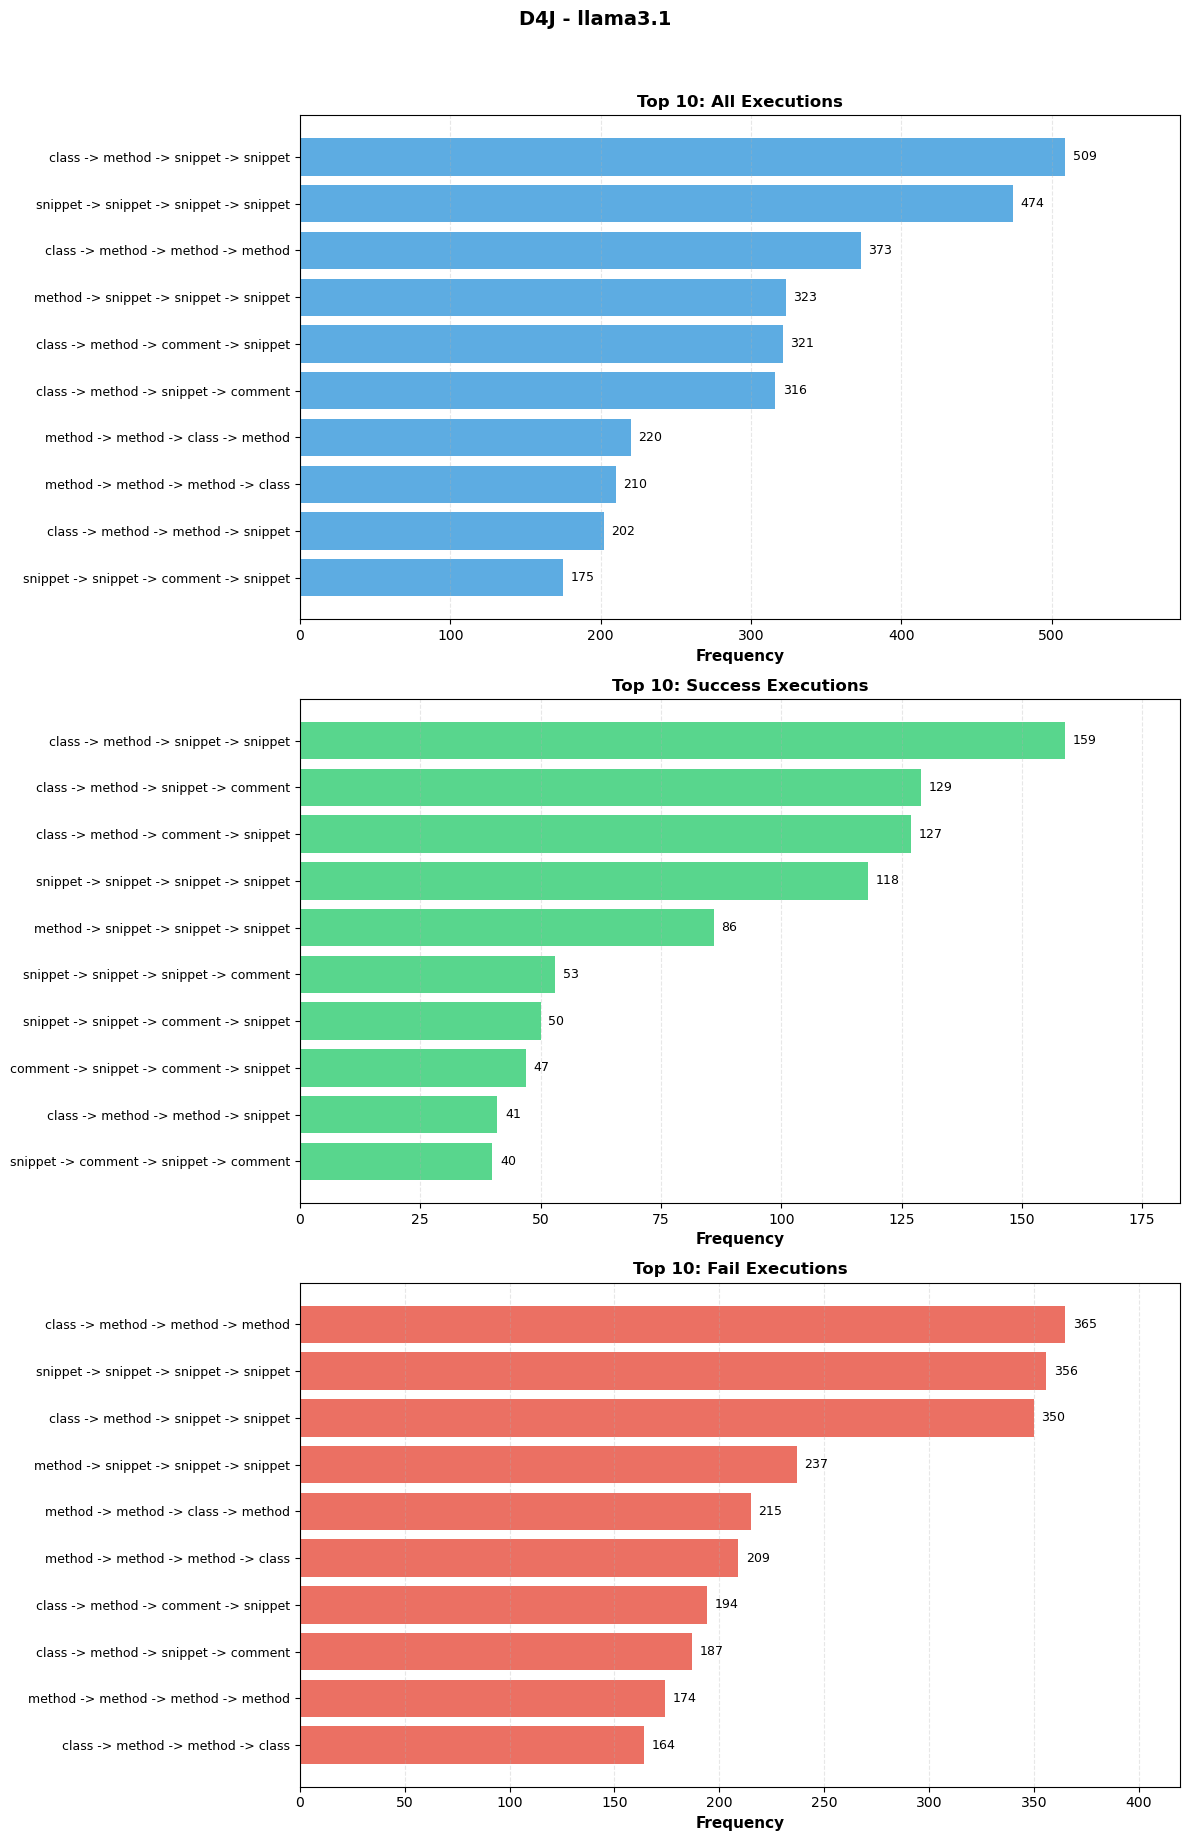


Benchmark: d4j | Model: mistral-nemo


Total 4-grams collected: 1523

Total 4-grams collected: 330

Total 4-grams collected: 1193


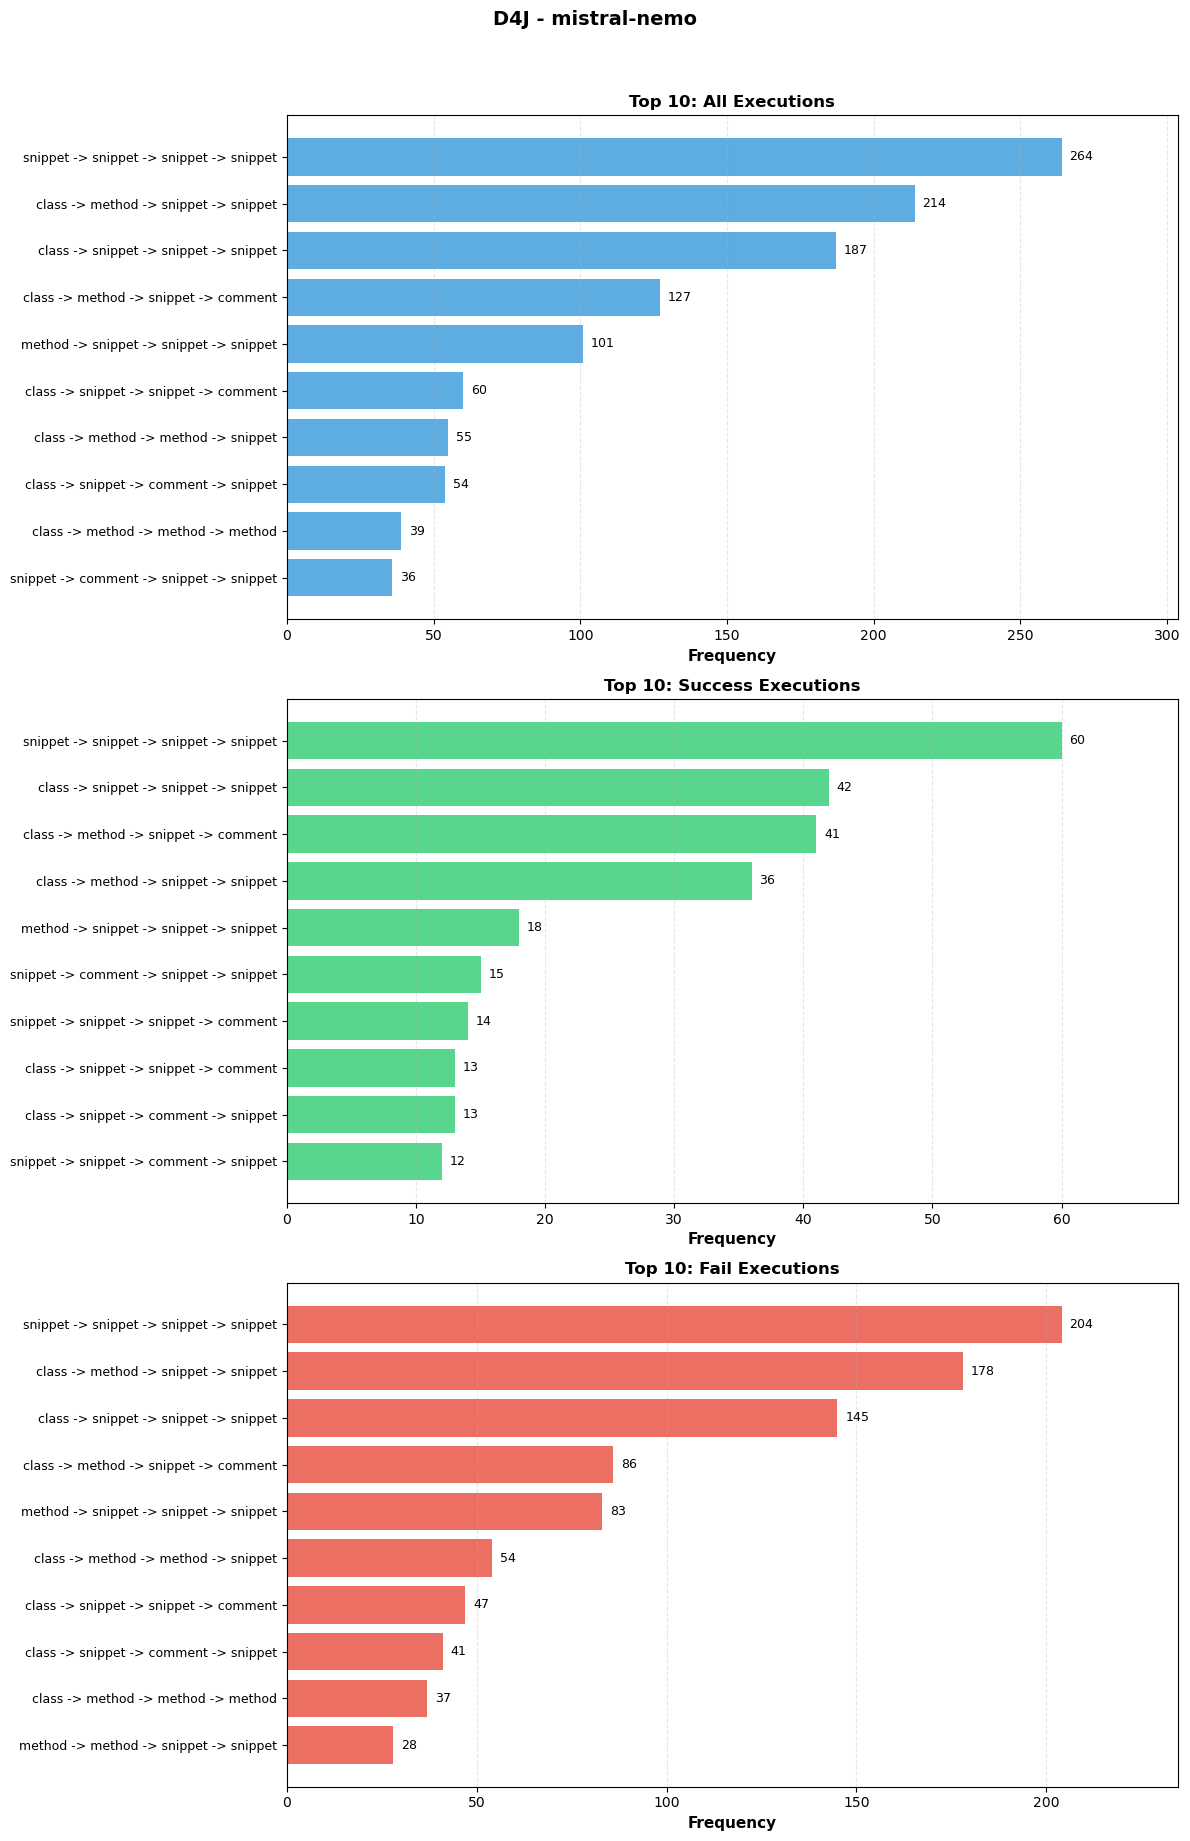


Benchmark: d4j | Model: qwen2.5-coder


Total 4-grams collected: 2082

Total 4-grams collected: 503

Total 4-grams collected: 1579


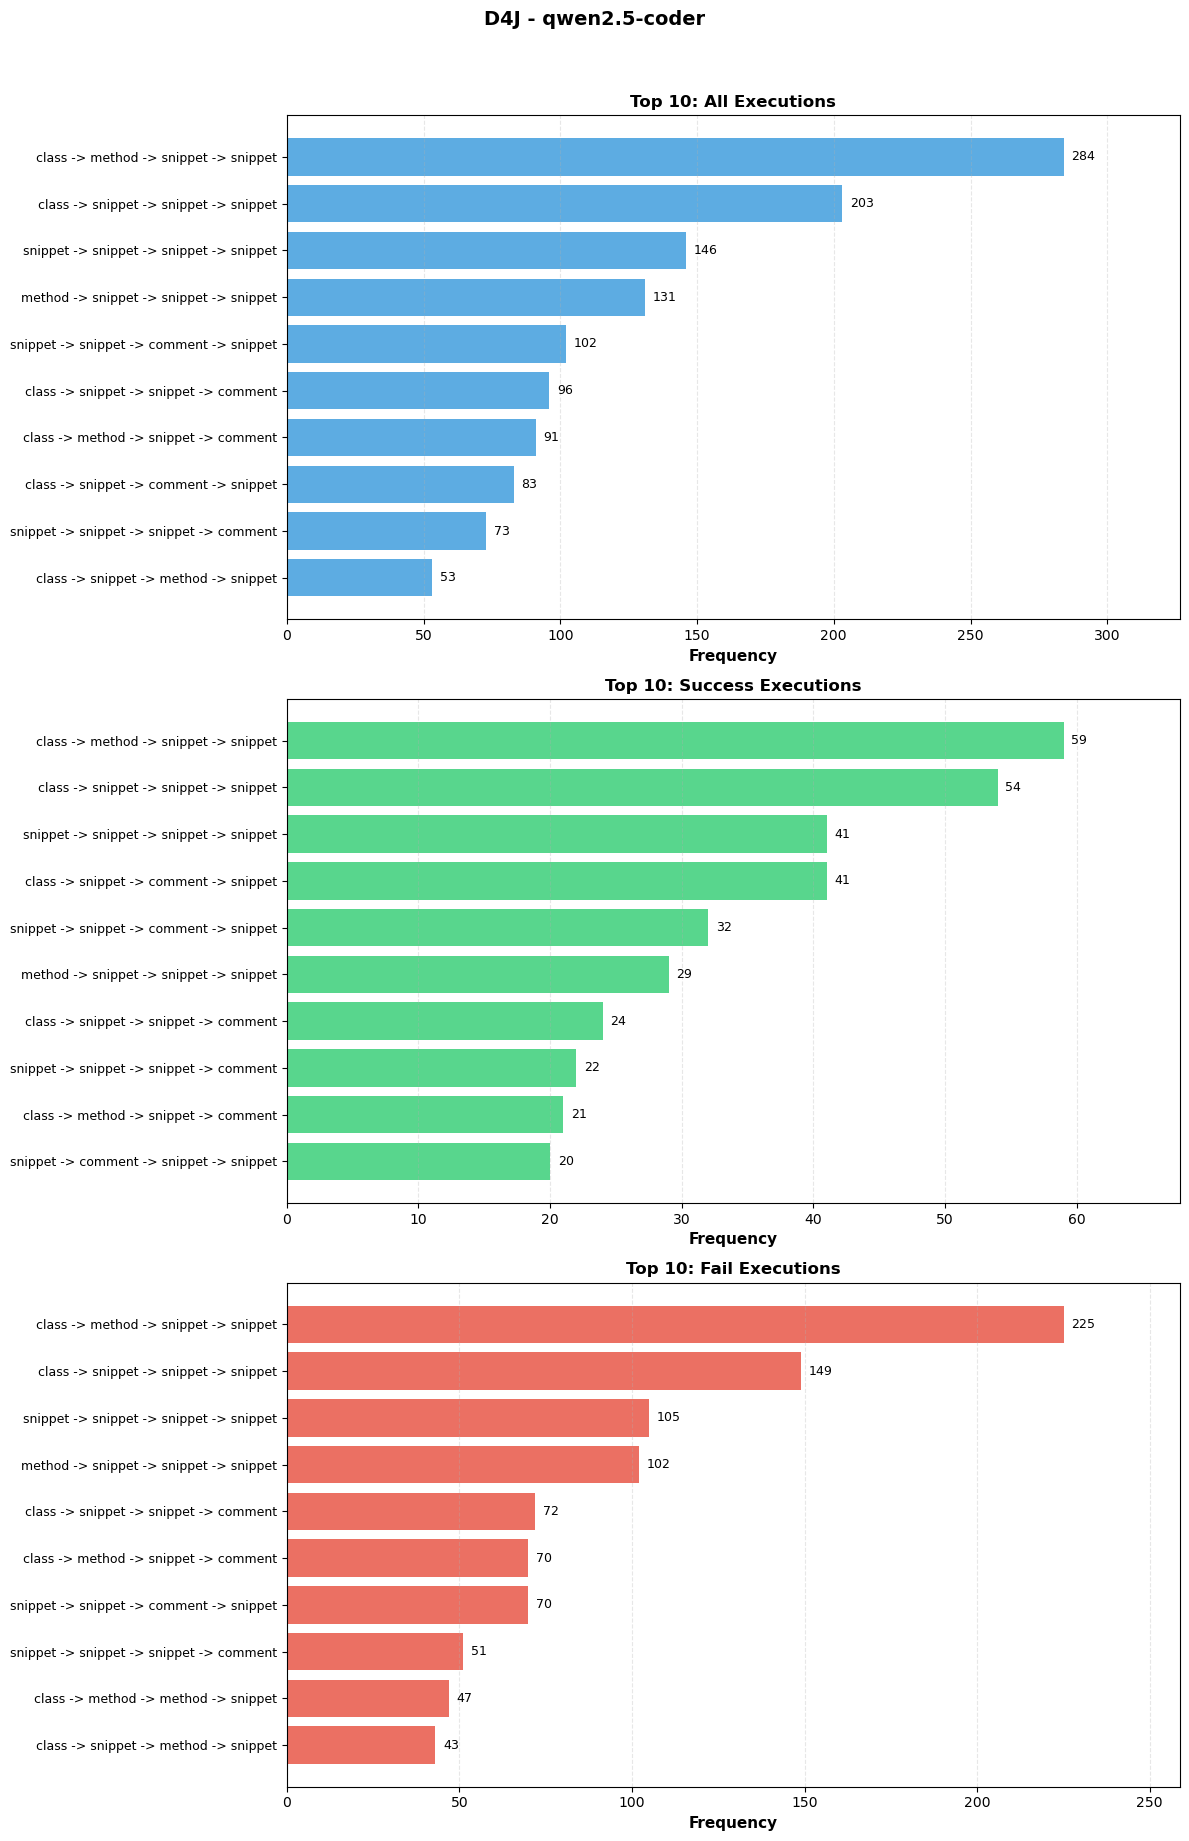


Benchmark: bip | Model: llama3


Total 4-grams collected: 11179

Total 4-grams collected: 1152

Total 4-grams collected: 10027


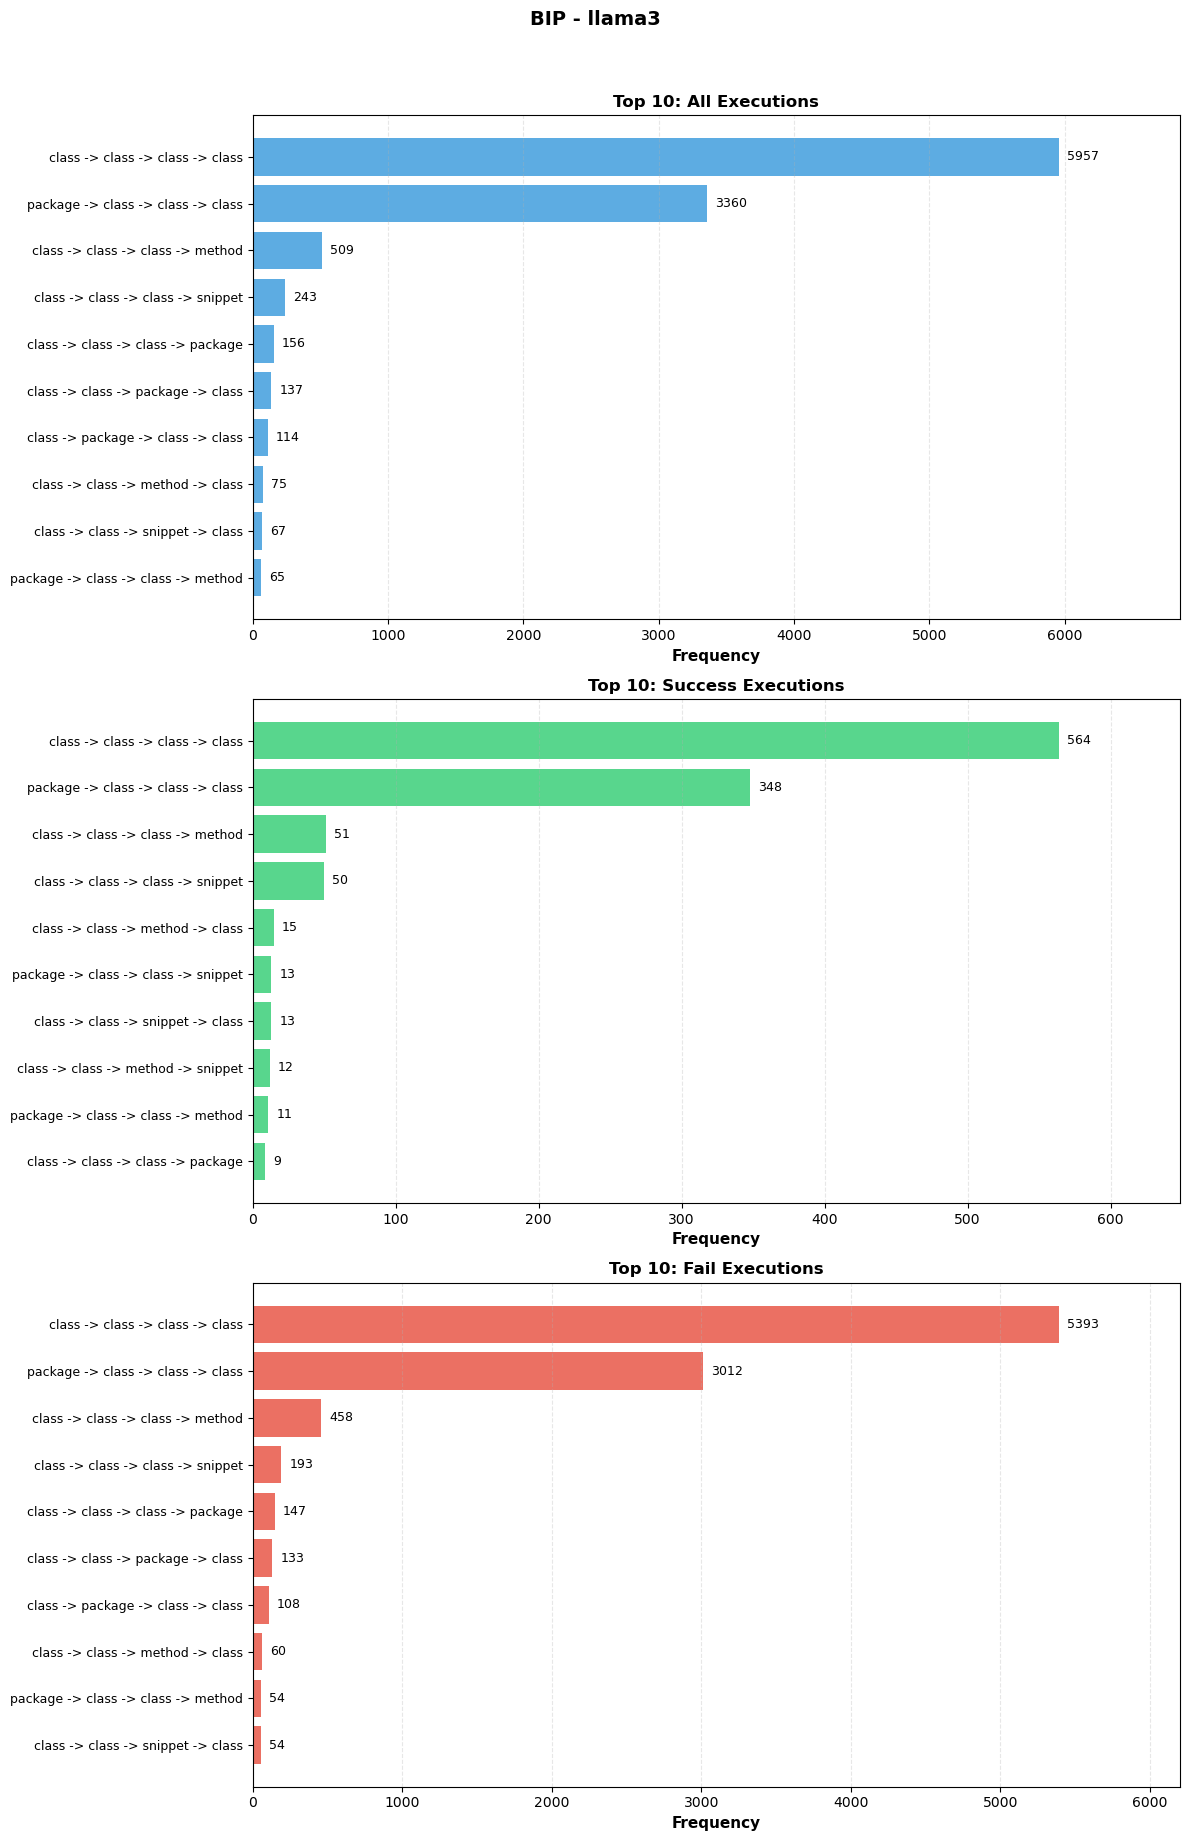


Benchmark: bip | Model: llama3.1


Total 4-grams collected: 15279

Total 4-grams collected: 2662

Total 4-grams collected: 12617


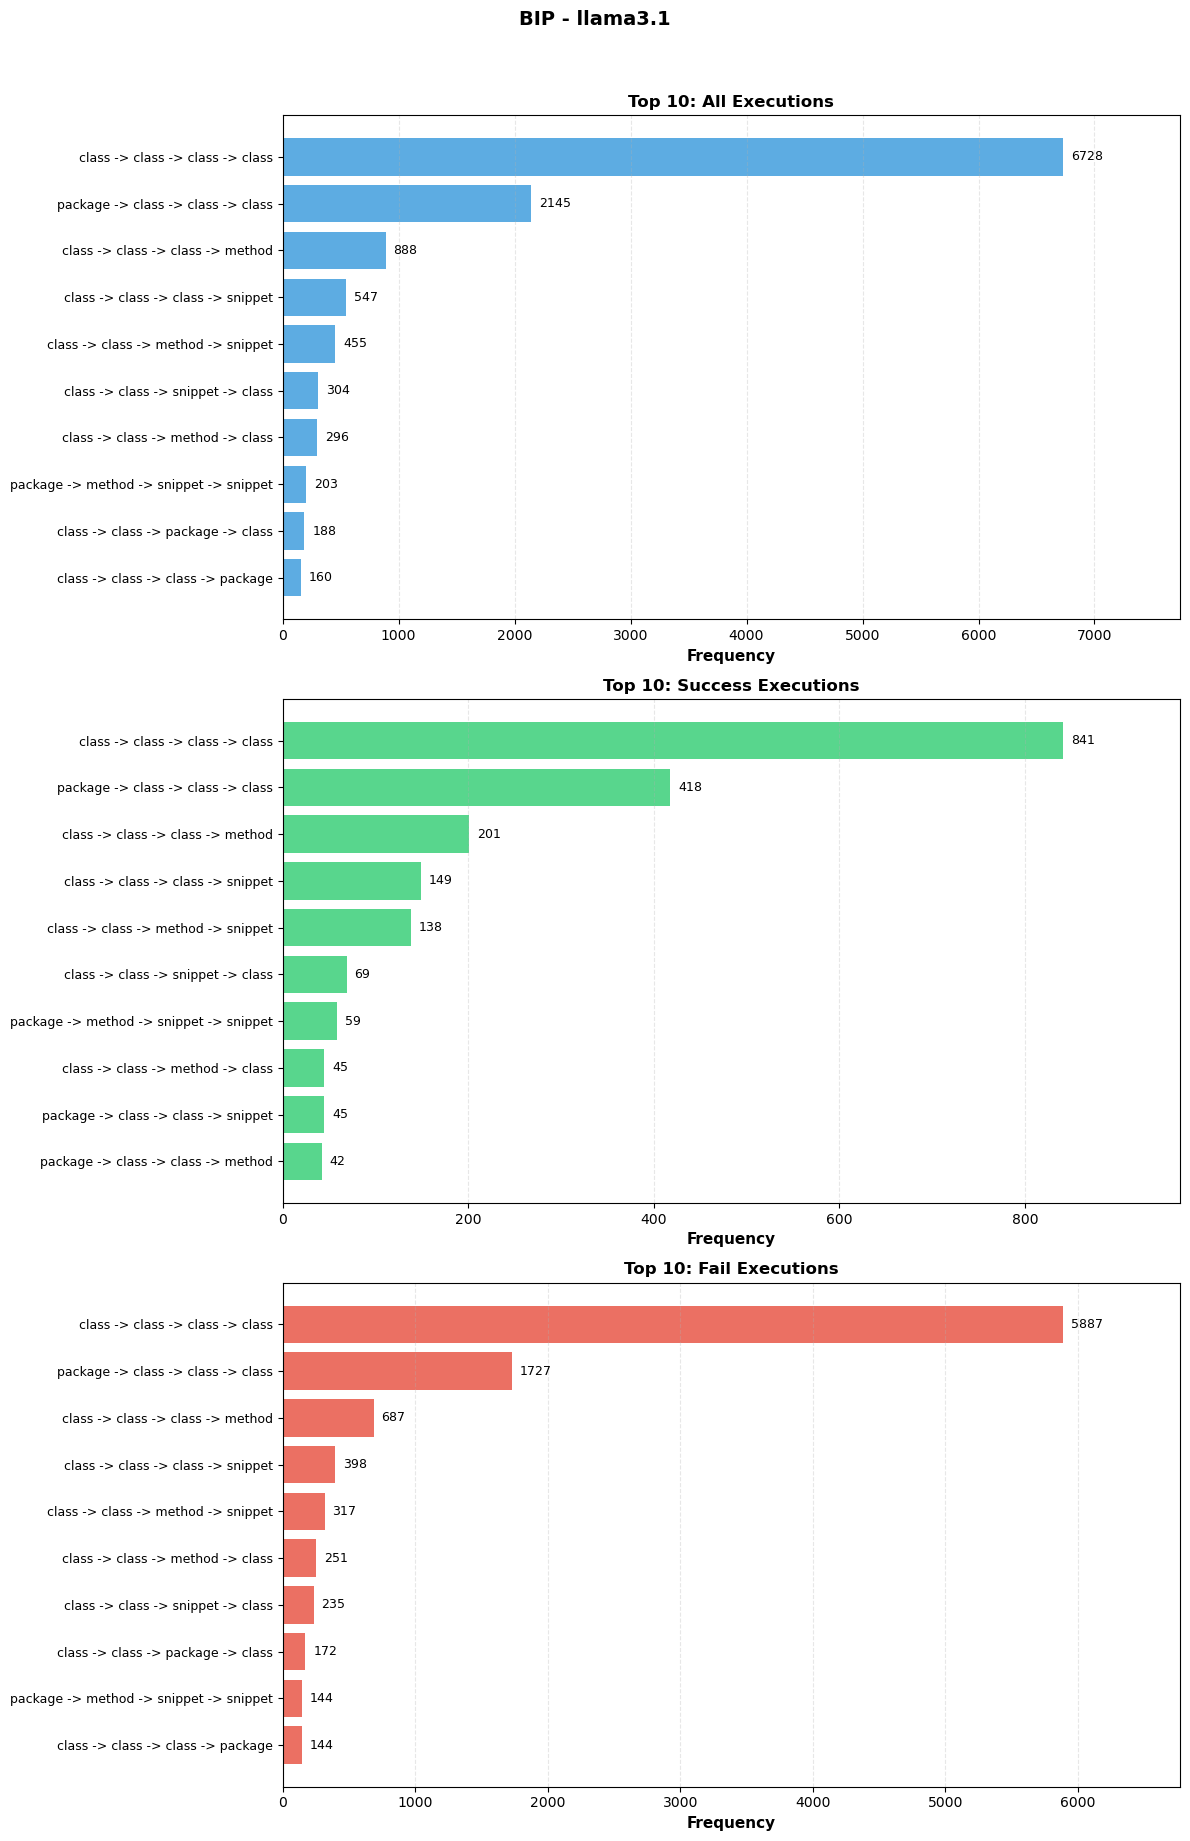


Benchmark: bip | Model: mistral-nemo


Total 4-grams collected: 2017

Total 4-grams collected: 441

Total 4-grams collected: 1576


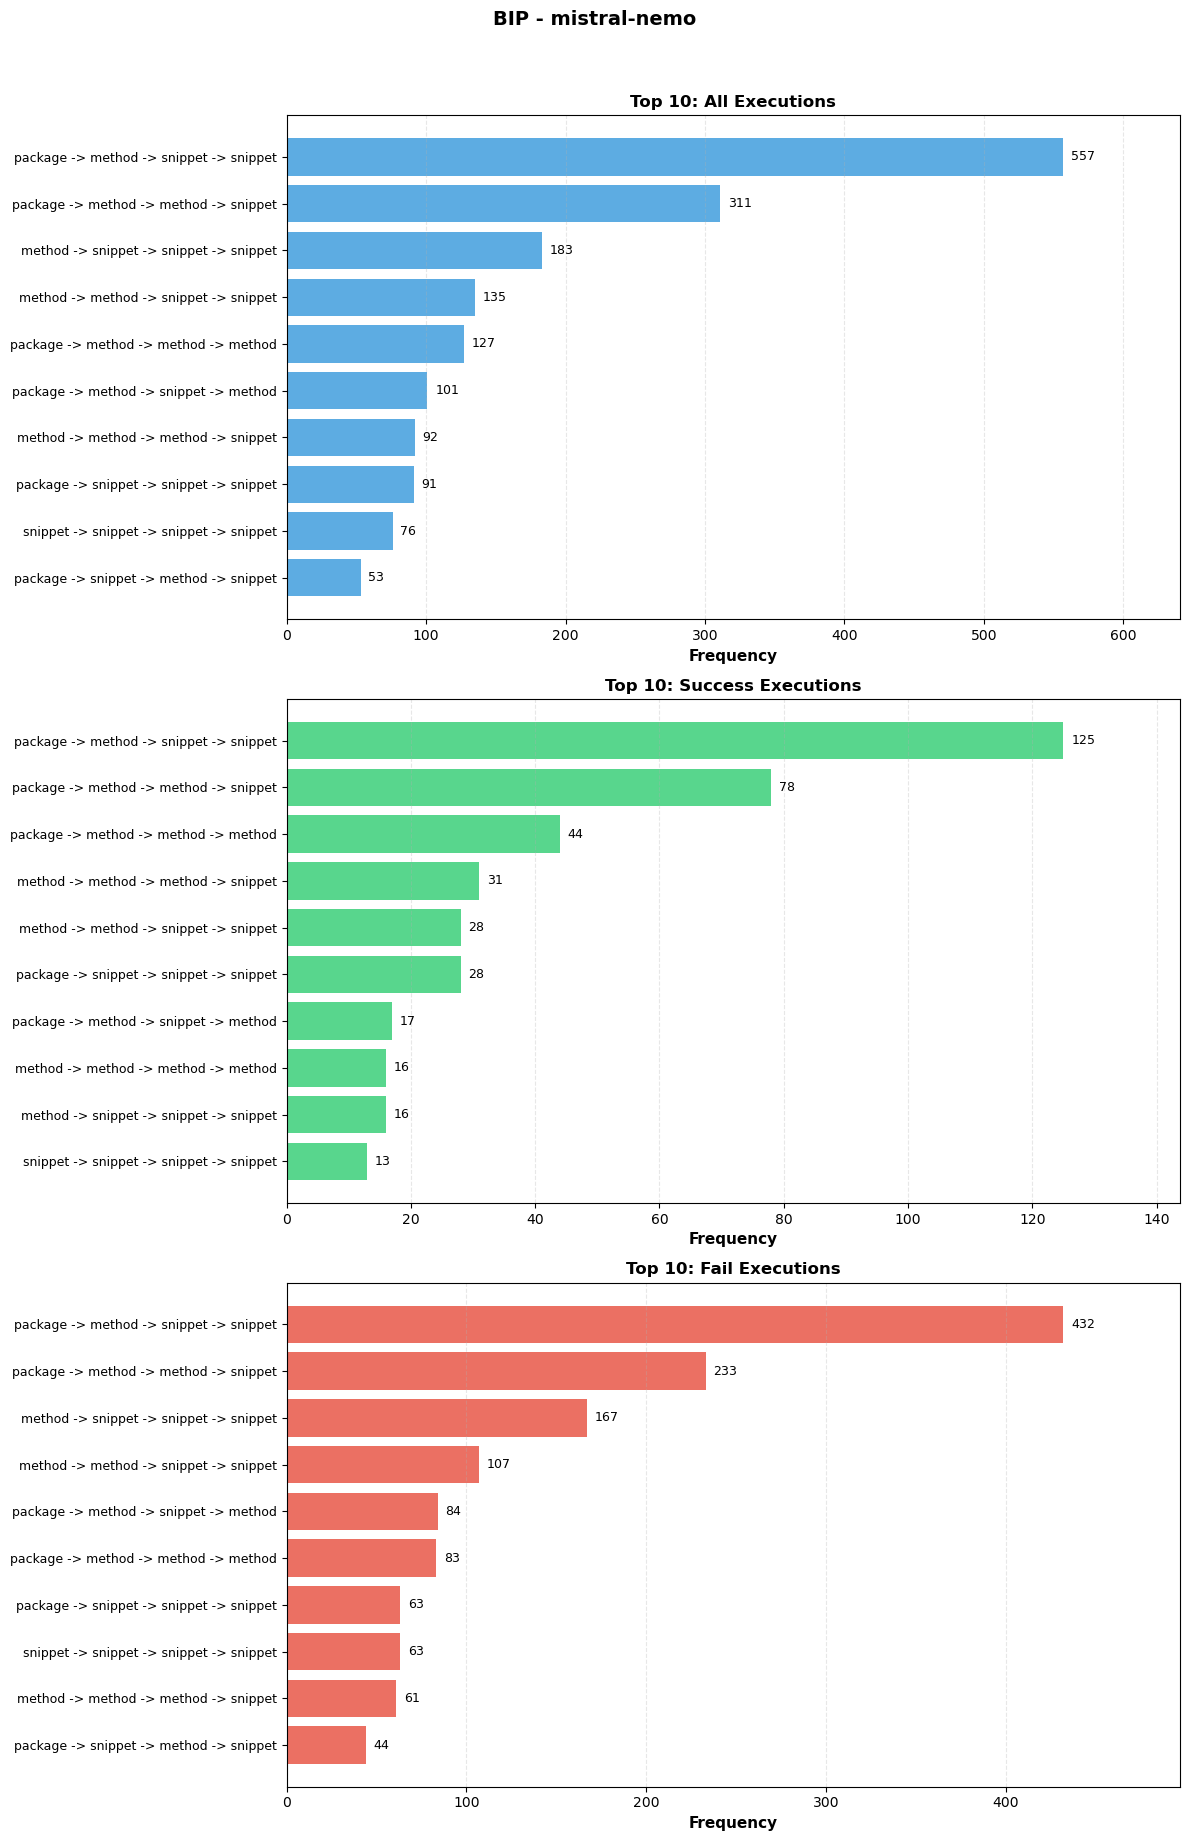


Benchmark: bip | Model: qwen2.5-coder


Total 4-grams collected: 1831

Total 4-grams collected: 370

Total 4-grams collected: 1461


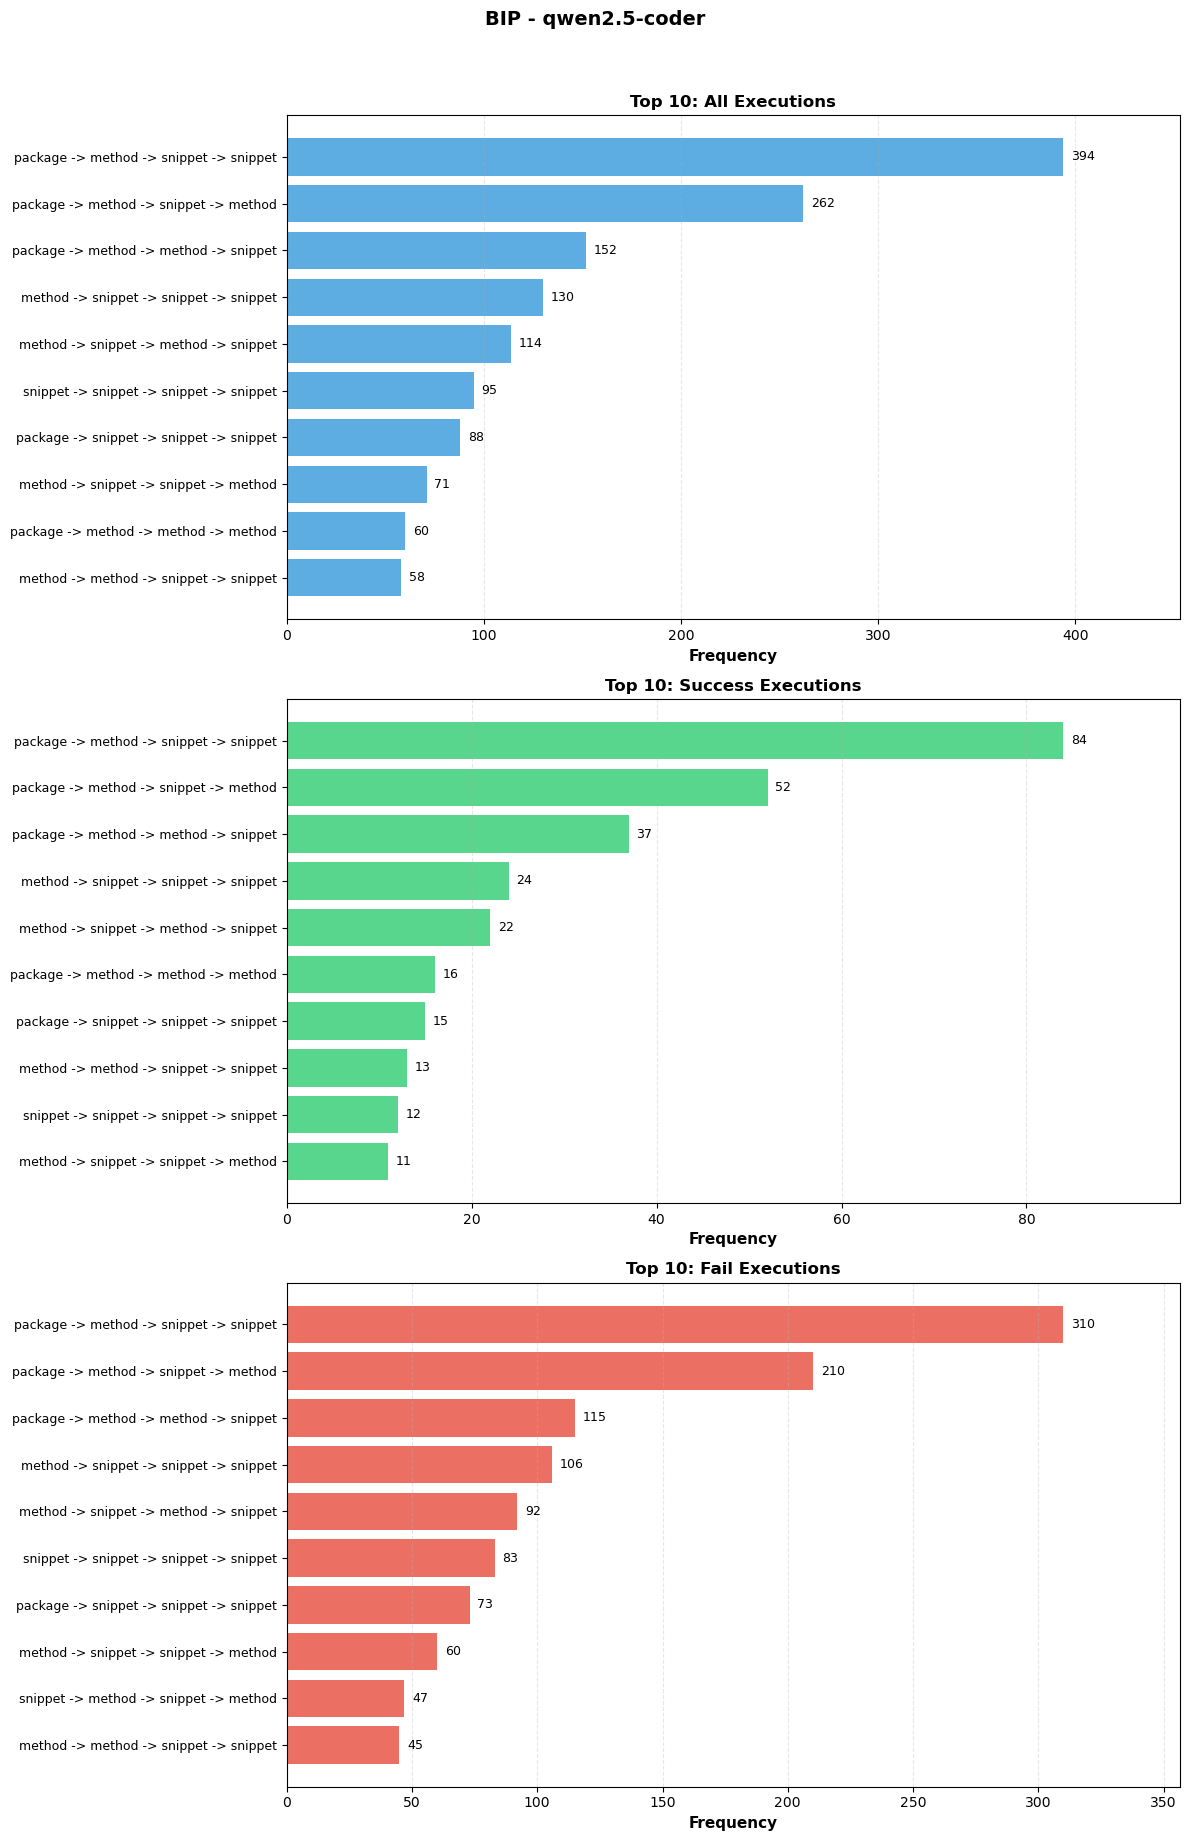

In [12]:
# Visualize Top 10 patterns separately for all/success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comments': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
n=4
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)
        success_ngrams = get_ngrams_for_success_executions(bm, model, n)
        fail_ngrams = get_ngrams_for_fail_executions(bm, model, n)
        
        all_counter = Counter(all_ngrams)
        success_counter = Counter(success_ngrams)
        fail_counter = Counter(fail_ngrams)
        
        # Get top 10 from each counter
        top_10_all = [(shorten_pattern(pattern), count) for pattern, count in all_counter.most_common(10)]
        top_10_success = [(shorten_pattern(pattern), count) for pattern, count in success_counter.most_common(10)]
        top_10_fail = [(shorten_pattern(pattern), count) for pattern, count in fail_counter.most_common(10)]
        
        # Create 3 subplots
        fig, axes = plt.subplots(3, 1, figsize=(12, 18))
        
        # Plot 1: All Executions
        patterns_all = [p[0] for p in top_10_all]
        counts_all = [p[1] for p in top_10_all]
        
        axes[0].barh(range(len(patterns_all)), counts_all, color='#3498db', alpha=0.8)
        axes[0].set_yticks(range(len(patterns_all)))
        axes[0].set_yticklabels(patterns_all, fontsize=9)
        axes[0].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 10: All Executions', fontsize=12, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(axis='x', alpha=0.3, linestyle='--')

        axes[0].set_xlim(0, max(counts_all)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_all):
            axes[0].text(v + max(counts_all)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 2: Success Executions
        patterns_success = [p[0] for p in top_10_success]
        counts_success = [p[1] for p in top_10_success]
        
        axes[1].barh(range(len(patterns_success)), counts_success, color='#2ecc71', alpha=0.8)
        axes[1].set_yticks(range(len(patterns_success)))
        axes[1].set_yticklabels(patterns_success, fontsize=9)
        axes[1].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[1].set_title('Top 10: Success Executions', fontsize=12, fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].grid(axis='x', alpha=0.3, linestyle='--')

        axes[1].set_xlim(0, max(counts_success)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_success):
            axes[1].text(v + max(counts_success)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 3: Fail Executions
        patterns_fail = [p[0] for p in top_10_fail]
        counts_fail = [p[1] for p in top_10_fail]
        
        axes[2].barh(range(len(patterns_fail)), counts_fail, color='#e74c3c', alpha=0.8)
        axes[2].set_yticks(range(len(patterns_fail)))
        axes[2].set_yticklabels(patterns_fail, fontsize=9)
        axes[2].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[2].set_title('Top 10: Fail Executions', fontsize=12, fontweight='bold')
        axes[2].invert_yaxis()
        axes[2].grid(axis='x', alpha=0.3, linestyle='--')

        axes[2].set_xlim(0, max(counts_fail)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_fail):
            axes[2].text(v + max(counts_fail)*0.01, i, str(v), va='center', fontsize=9)
        
        # Overall title
        fig.suptitle(f'{bm.upper()} - {model}', fontsize=14, fontweight='bold', y=1.02)
        
        plt.tight_layout()
        plt.show()

### 3-gram

In [13]:
# Get n-gram: frequencies for all benchmarks and models
n = 3
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)

        all_counter = Counter(all_ngrams)

        results = []
        for ngram, count in all_counter.most_common():
            results.append({
                f'{n}gram': ngram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_dir = f"./{n}gram_frequency/autofl/all_executions"
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, f"{bm}_{model}_{n}gram_frequencies.csv")
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique {n}-gram")





Total 3-grams collected: 6386
Saved ./3gram_frequency/autofl/all_executions/d4j_llama3_3gram_frequencies.csv with 58 unique 3-gram

Total 3-grams collected: 11632
Saved ./3gram_frequency/autofl/all_executions/d4j_llama3.1_3gram_frequencies.csv with 64 unique 3-gram

Total 3-grams collected: 3562
Saved ./3gram_frequency/autofl/all_executions/d4j_mistral-nemo_3gram_frequencies.csv with 39 unique 3-gram

Total 3-grams collected: 4099
Saved ./3gram_frequency/autofl/all_executions/d4j_qwen2.5-coder_3gram_frequencies.csv with 48 unique 3-gram

Total 3-grams collected: 15055
Saved ./3gram_frequency/autofl/all_executions/bip_llama3_3gram_frequencies.csv with 55 unique 3-gram

Total 3-grams collected: 19012
Saved ./3gram_frequency/autofl/all_executions/bip_llama3.1_3gram_frequencies.csv with 76 unique 3-gram

Total 3-grams collected: 5254
Saved ./3gram_frequency/autofl/all_executions/bip_mistral-nemo_3gram_frequencies.csv with 21 unique 3-gram

Total 3-grams collected: 4209
Saved ./3gram_frequ


Benchmark: d4j | Model: llama3


Total 3-grams collected: 6386

Total 3-grams collected: 1609

Total 3-grams collected: 4777
                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet            2070                 529             1541         25.6%      74.4%
 method -> snippet -> comment             544                 186              358         34.2%      65.8%
    class -> method -> method             452                  75              377         16.6%      83.4%
 method -> snippet -> snippet             438                 136              302         31.1%      68.9%
   method -> method -> method             296                  47              249         15.9%      84.1%
   class -> method -> comment             225                  34              191         15.1%      84.9%
  method -> method -> snippet             224                  55              169         24.6%      75.4%
snippet ->

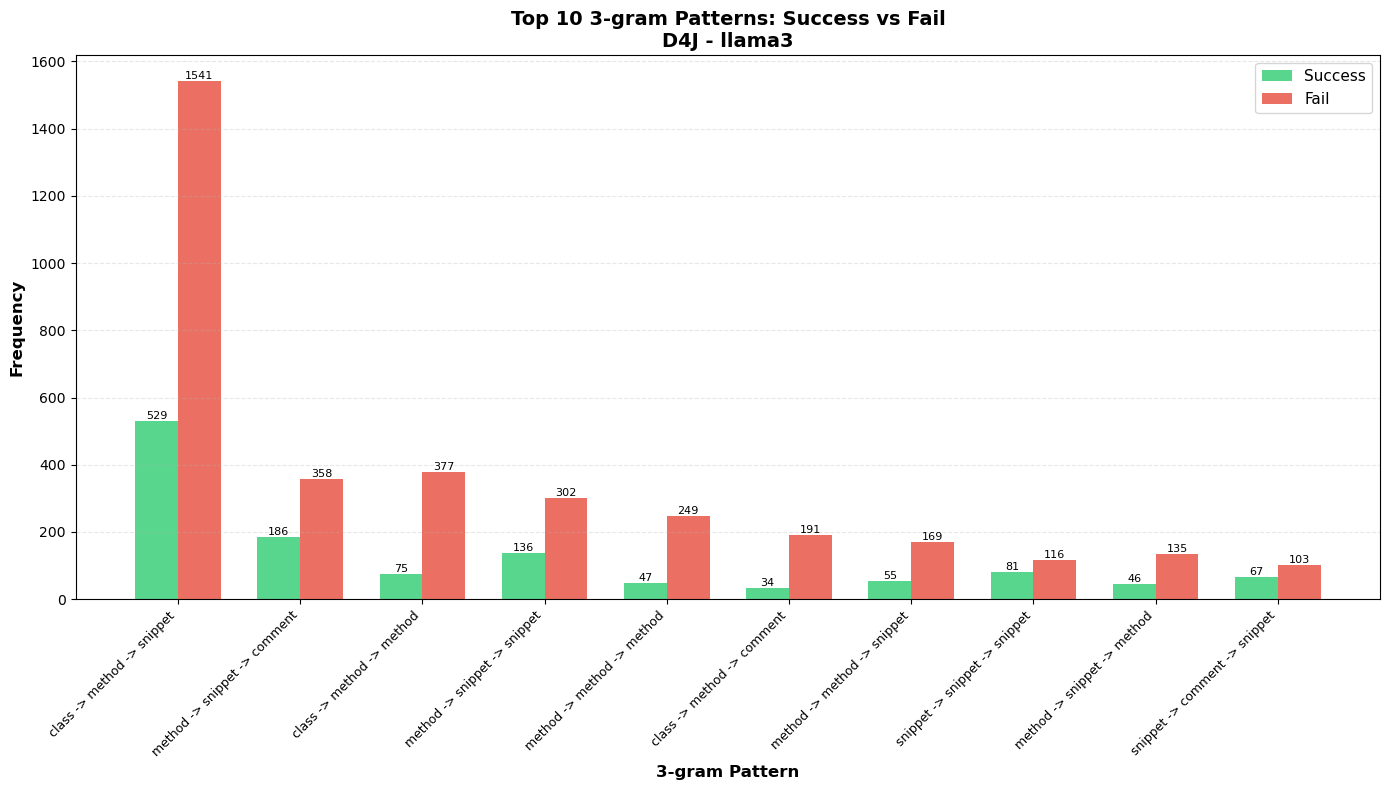


Benchmark: d4j | Model: llama3.1


Total 3-grams collected: 11632

Total 3-grams collected: 2497

Total 3-grams collected: 9135
                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet            1615                 537             1078         33.3%      66.7%
snippet -> snippet -> snippet             868                 227              641         26.2%      73.8%
    class -> method -> method             820                  71              749          8.7%      91.3%
 method -> snippet -> snippet             684                 193              491         28.2%      71.8%
   method -> method -> method             550                   8              542          1.5%      98.5%
   class -> method -> comment             531                 195              336         36.7%      63.3%
     class -> method -> class             498                  19              479          3.8%      96.2%
snippet

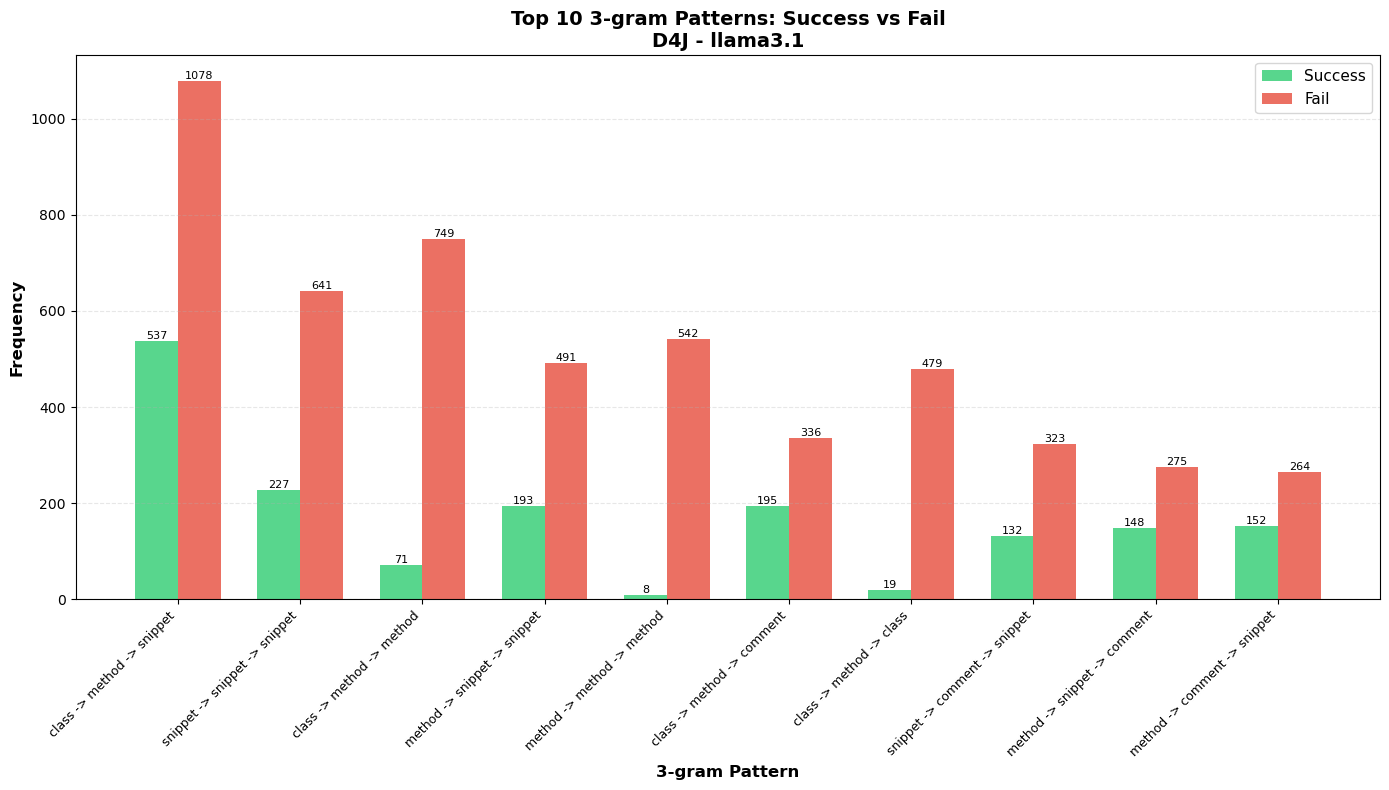


Benchmark: d4j | Model: mistral-nemo


Total 3-grams collected: 3562

Total 3-grams collected: 826

Total 3-grams collected: 2736
                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet            1006                 247              759         24.6%      75.4%
snippet -> snippet -> snippet             563                 125              438         22.2%      77.8%
  class -> snippet -> snippet             460                  92              368         20.0%      80.0%
  class -> snippet -> comment             382                 139              243         36.4%      63.6%
 method -> snippet -> snippet             255                  39              216         15.3%      84.7%
 method -> snippet -> comment             129                  41               88         31.8%      68.2%
snippet -> snippet -> comment             120                  32               88         26.7%      73.3%
    c

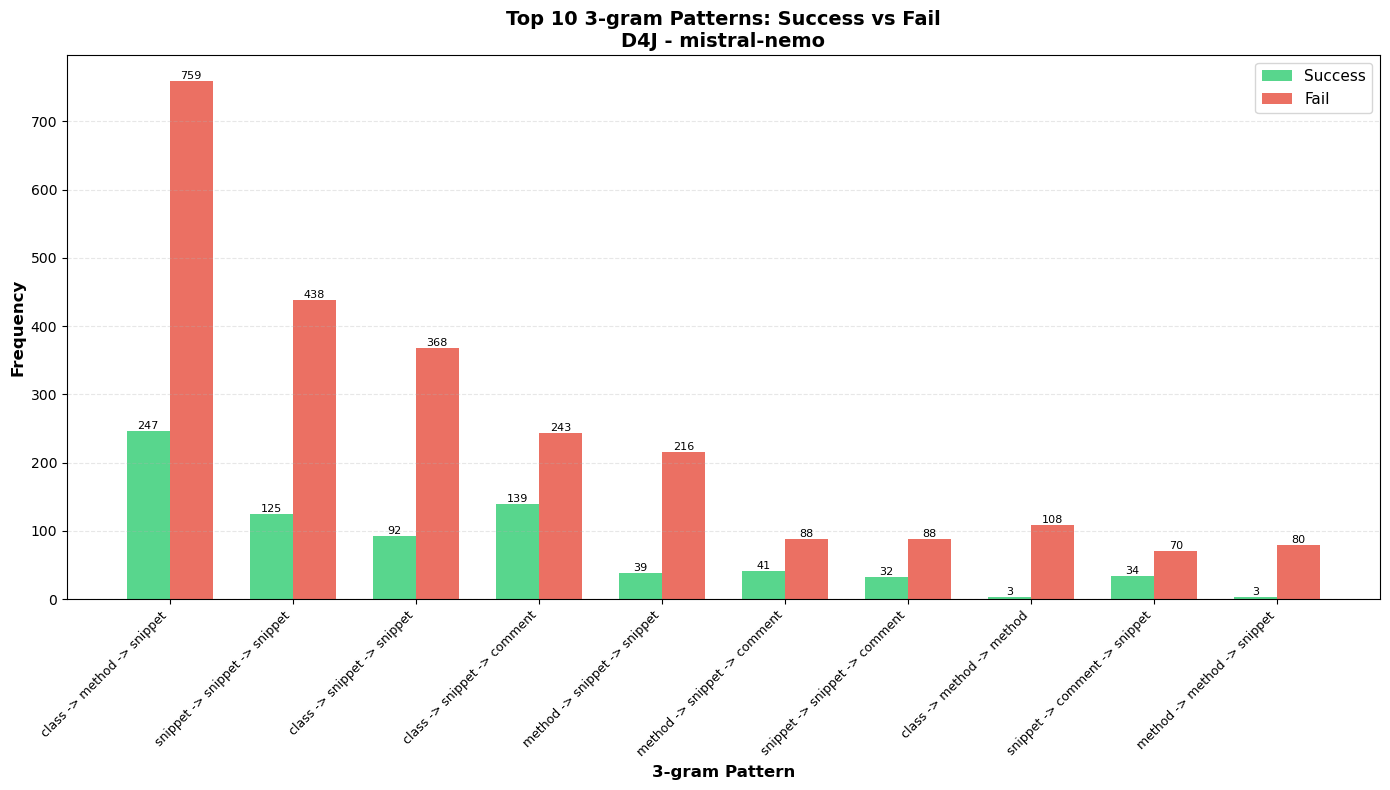


Benchmark: d4j | Model: qwen2.5-coder


Total 3-grams collected: 4099

Total 3-grams collected: 975

Total 3-grams collected: 3124
                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> method -> snippet             849                 150              699         17.7%      82.3%
  class -> snippet -> snippet             549                 143              406         26.0%      74.0%
snippet -> snippet -> snippet             495                 131              364         26.5%      73.5%
 method -> snippet -> snippet             339                  68              271         20.1%      79.9%
  class -> snippet -> comment             310                 143              167         46.1%      53.9%
snippet -> snippet -> comment             212                  53              159         25.0%      75.0%
snippet -> comment -> snippet             210                  79              131         37.6%      62.4%
    

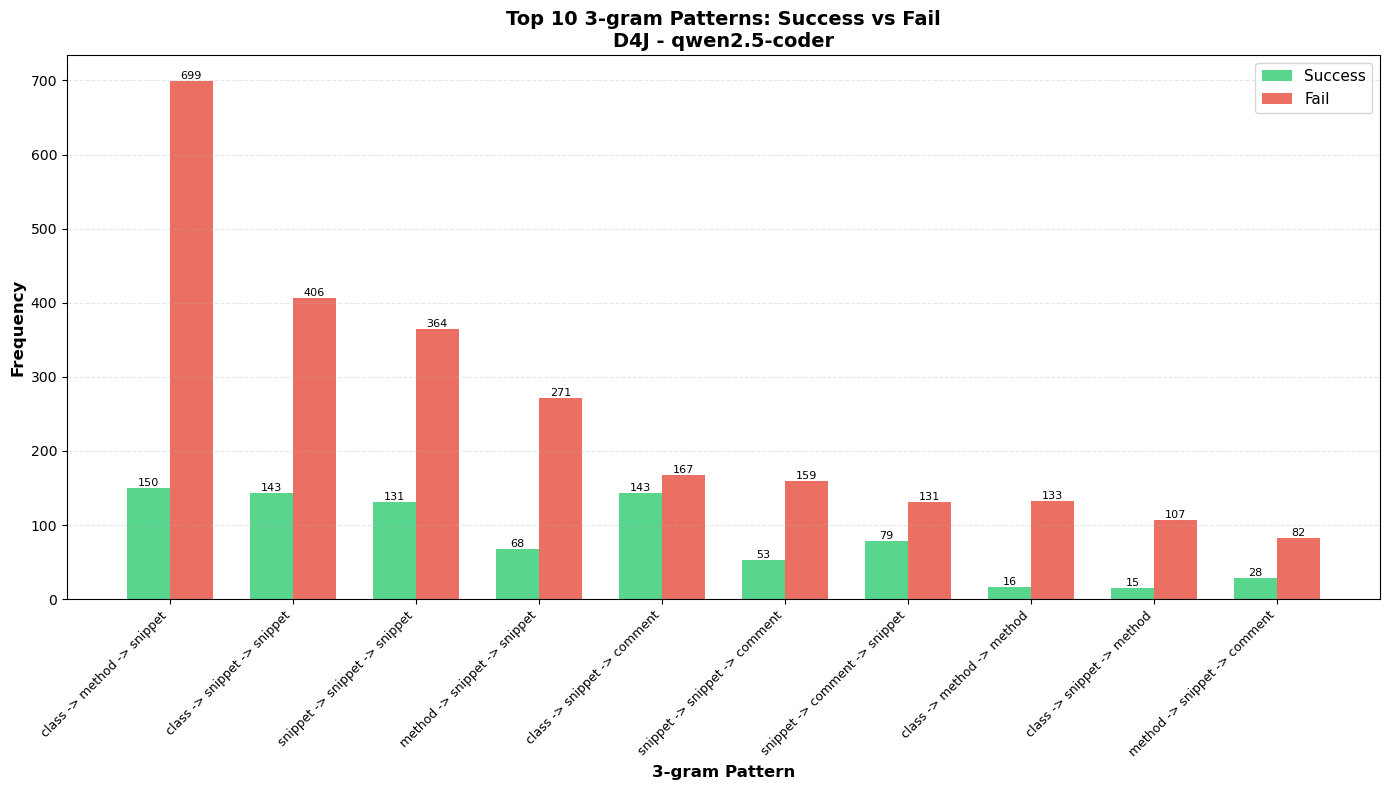


Benchmark: bip | Model: llama3


Total 3-grams collected: 15055

Total 3-grams collected: 1593

Total 3-grams collected: 13462
                   pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> class -> class            9329                 913             8416          9.8%      90.2%
 package -> class -> class            3823                 411             3412         10.8%      89.2%
  class -> class -> method             575                  62              513         10.8%      89.2%
 class -> class -> snippet             295                  67              228         22.7%      77.3%
 class -> class -> package             196                  12              184          6.1%      93.9%
 class -> package -> class             166                   8              158          4.8%      95.2%
  class -> method -> class              92                  18               74         19.6%      80.4%
 class -> snippet -> class      

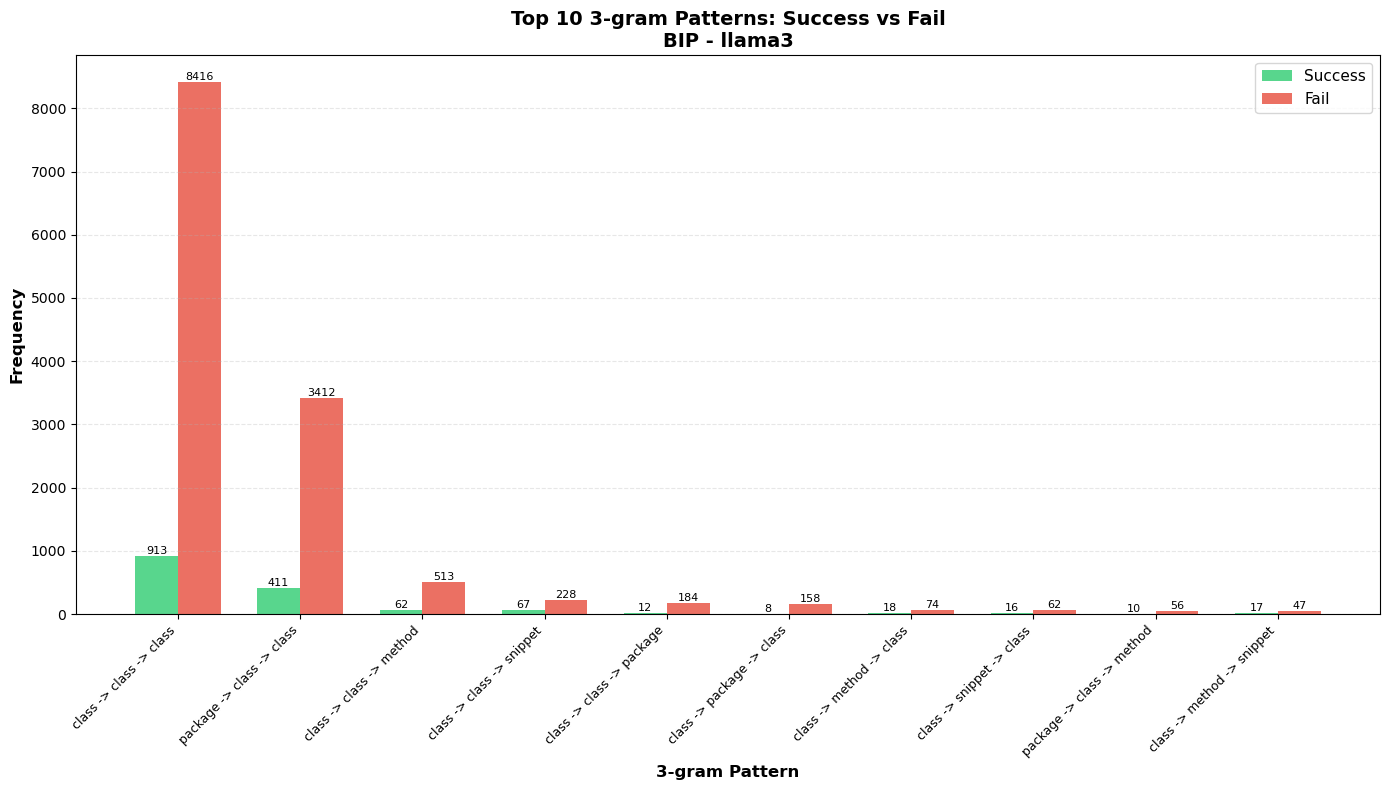


Benchmark: bip | Model: llama3.1


Total 3-grams collected: 19012

Total 3-grams collected: 3597

Total 3-grams collected: 15415
                     pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
     class -> class -> class            9021                1282             7739         14.2%      85.8%
   package -> class -> class            2553                 529             2024         20.7%      79.3%
    class -> class -> method            1062                 251              811         23.6%      76.4%
   class -> class -> snippet             777                 215              562         27.7%      72.3%
package -> method -> snippet             745                 246              499         33.0%      67.0%
  class -> method -> snippet             528                 157              371         29.7%      70.3%
   class -> snippet -> class             378                  80              298         21.2%      78.8%
method -> snip

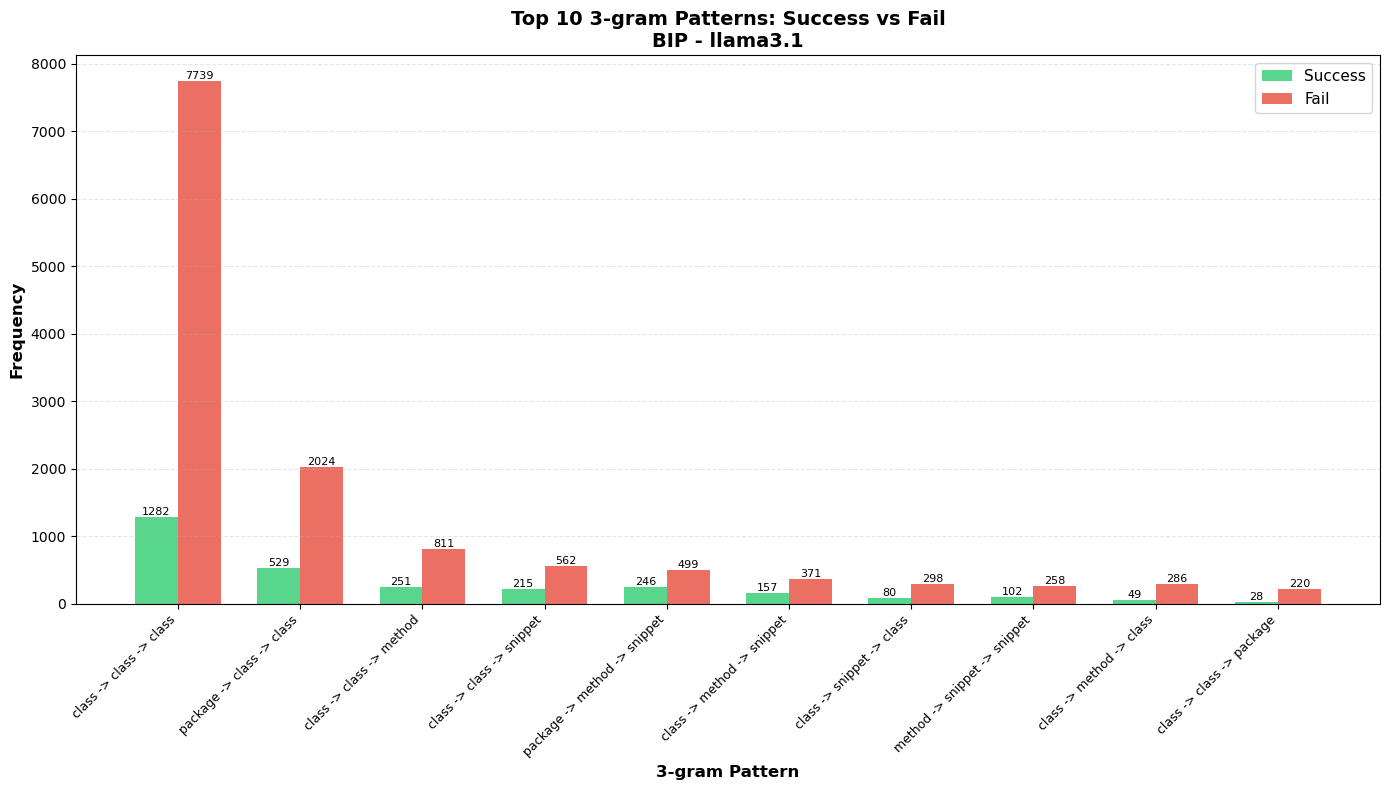


Benchmark: bip | Model: mistral-nemo


Total 3-grams collected: 5254

Total 3-grams collected: 1384

Total 3-grams collected: 3870
                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet            2278                 683             1595         30.0%      70.0%
 method -> snippet -> snippet             709                 154              555         21.7%      78.3%
  package -> method -> method             568                 151              417         26.6%      73.4%
  method -> method -> snippet             417                 111              306         26.6%      73.4%
snippet -> snippet -> snippet             350                  57              293         16.3%      83.7%
package -> snippet -> snippet             288                  92              196         31.9%      68.1%
   method -> method -> method             169                  60              109         35.5%      64.5%
  me

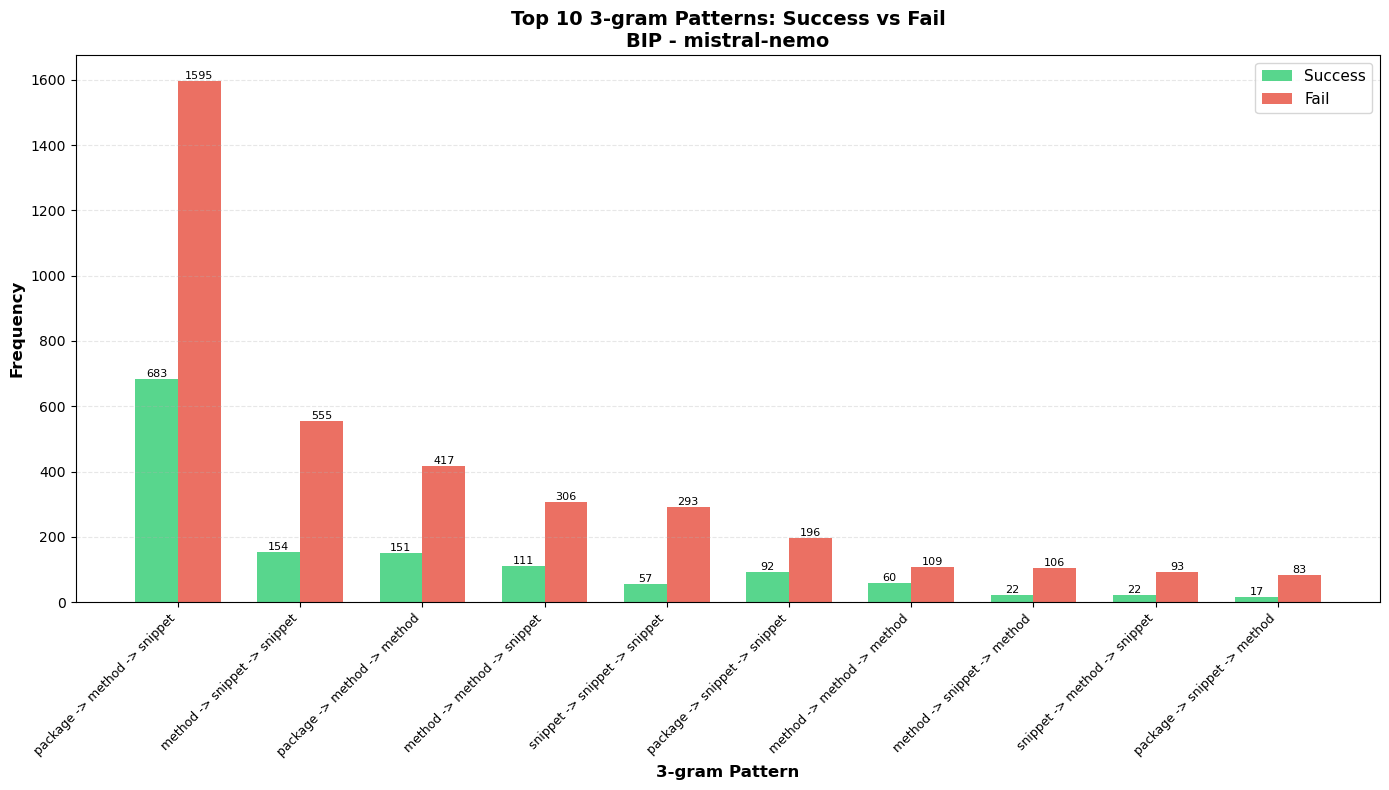


Benchmark: bip | Model: qwen2.5-coder


Total 3-grams collected: 4209

Total 3-grams collected: 995

Total 3-grams collected: 3214
                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet            1639                 436             1203         26.6%      73.4%
 method -> snippet -> snippet             474                 100              374         21.1%      78.9%
  method -> snippet -> method             341                  63              278         18.5%      81.5%
snippet -> snippet -> snippet             313                  51              262         16.3%      83.7%
  package -> method -> method             299                  70              229         23.4%      76.6%
package -> snippet -> snippet             262                  70              192         26.7%      73.3%
  method -> method -> snippet             197                  51              146         25.9%      74.1%
 sni

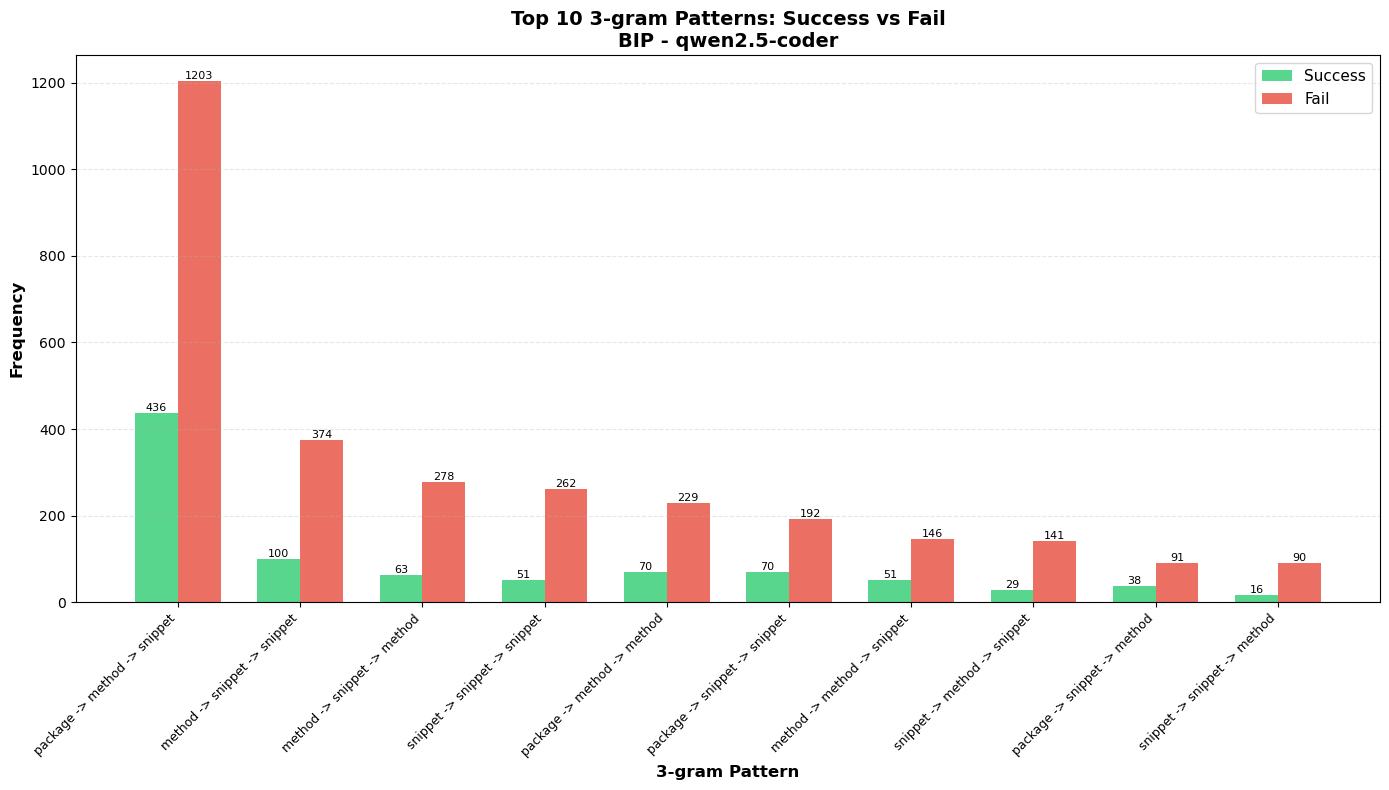

In [14]:
# Compare top 10 most frequent n-grams in all executions vs success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comments': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
n=3
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)
        success_ngrams = get_ngrams_for_success_executions(bm, model, n)
        fail_ngrams = get_ngrams_for_fail_executions(bm, model, n)
        
        all_counter = Counter(all_ngrams)
        success_counter = Counter(success_ngrams)
        fail_counter = Counter(fail_ngrams)
        
        # Get top 10 from all executions
        top_10_patterns = [pattern for pattern, count in all_counter.most_common(10)]
        
        # Create comparison table
        comparison_data = []
        for pattern in top_10_patterns:
            all_count = all_counter[pattern]
            success_count = success_counter[pattern]
            fail_count = fail_counter[pattern]
            
            comparison_data.append({
                'pattern': shorten_pattern(pattern),
                'all_executions': all_count,
                'success_executions': success_count,
                'fail_executions': fail_count,
                'success_ratio': f"{success_count/all_count*100:.1f}%" if all_count > 0 else "0%",
                'fail_ratio': f"{fail_count/all_count*100:.1f}%" if all_count > 0 else "0%"
            })
        
        # Display as DataFrame
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
        print()
        
        # Create bar chart
        fig, ax = plt.subplots(figsize=(14, 8))
        
        patterns = comparison_df['pattern'].tolist()
        success_counts = comparison_df['success_executions'].tolist()
        fail_counts = comparison_df['fail_executions'].tolist()
        
        x = np.arange(len(patterns))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, success_counts, width, label='Success', color='#2ecc71', alpha=0.8)
        bars2 = ax.bar(x + width/2, fail_counts, width, label='Fail', color='#e74c3c', alpha=0.8)
        
        ax.set_xlabel(f'{n}-gram Pattern', fontsize=12, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
        ax.set_title(f'Top 10 {n}-gram Patterns: Success vs Fail\n{bm.upper()} - {model}', fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(patterns, rotation=45, ha='right', fontsize=9)
        ax.legend(fontsize=11)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()


Benchmark: d4j | Model: llama3


Total 3-grams collected: 6386

Total 3-grams collected: 1609

Total 3-grams collected: 4777


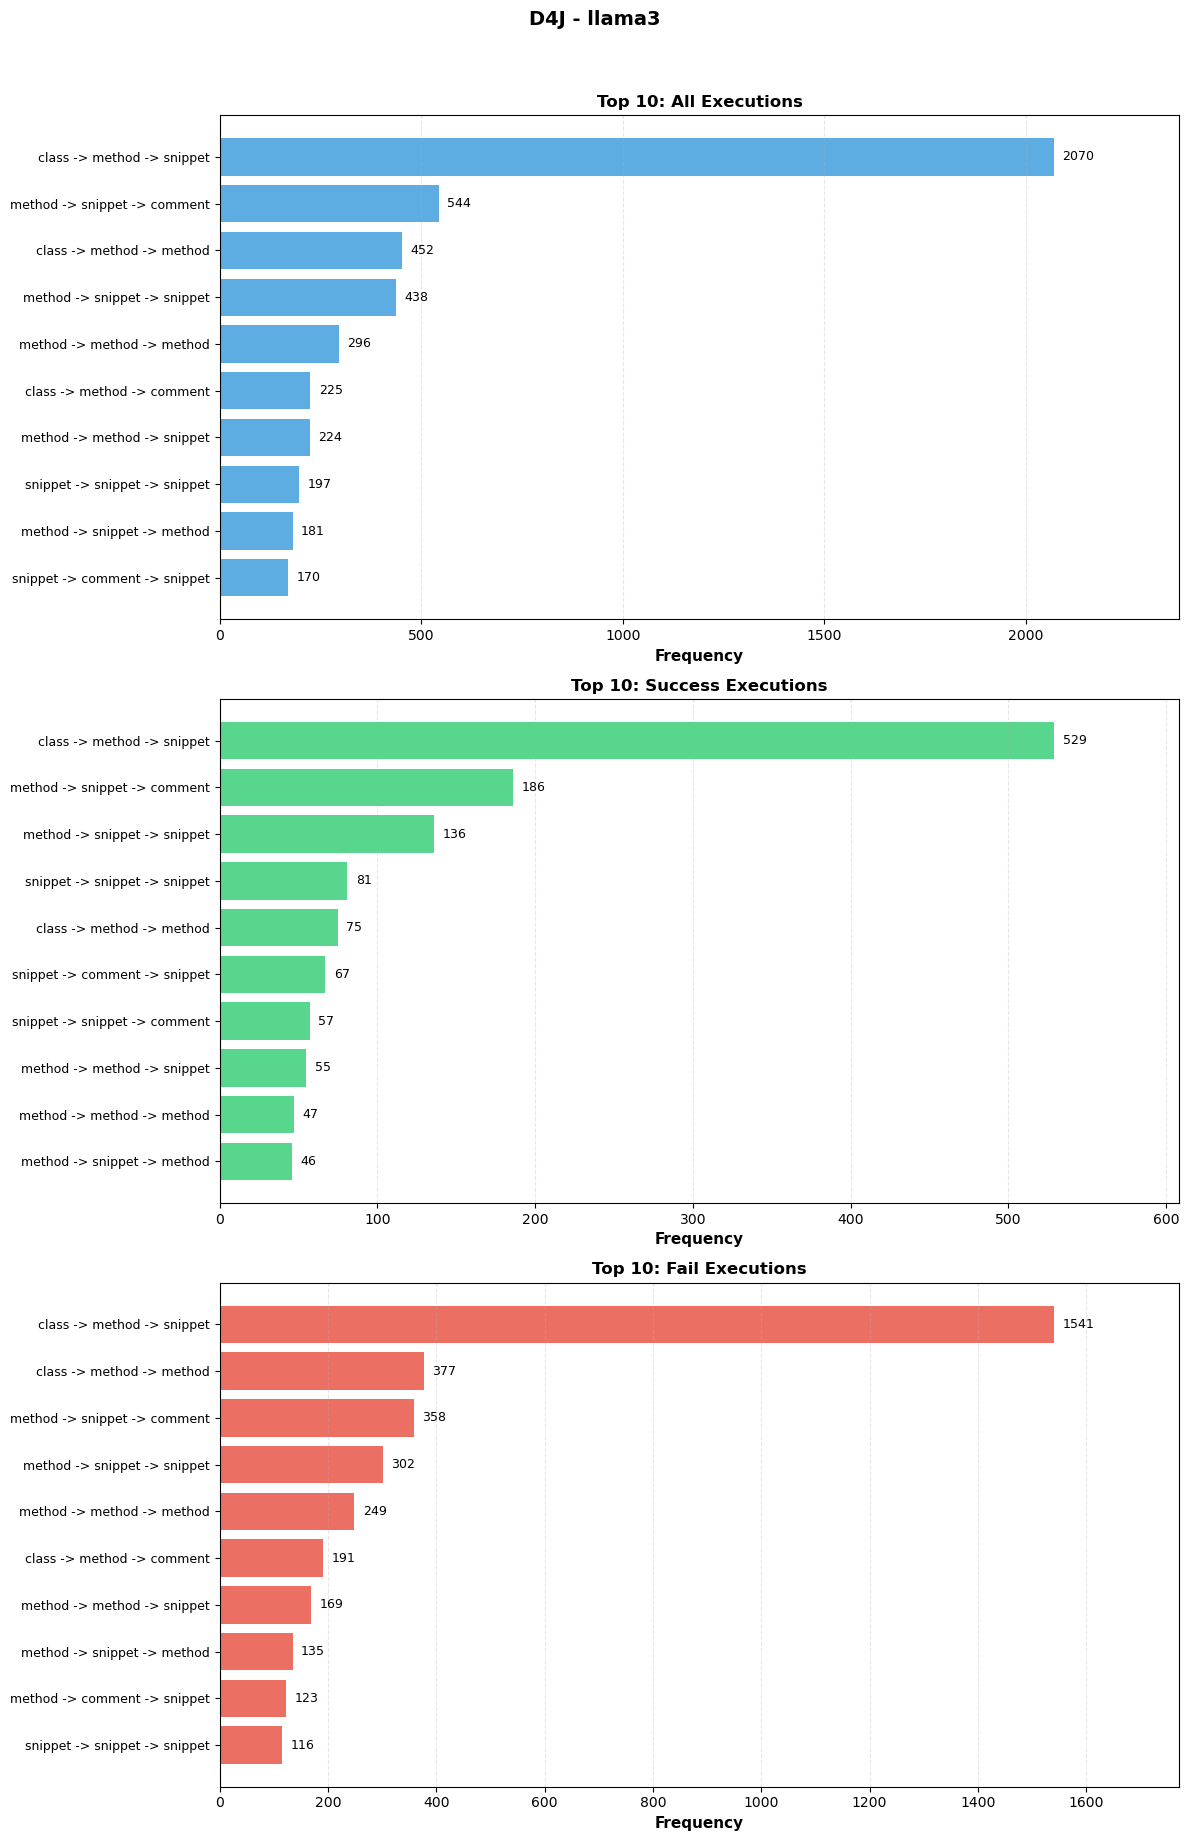


Benchmark: d4j | Model: llama3.1


Total 3-grams collected: 11632

Total 3-grams collected: 2497

Total 3-grams collected: 9135


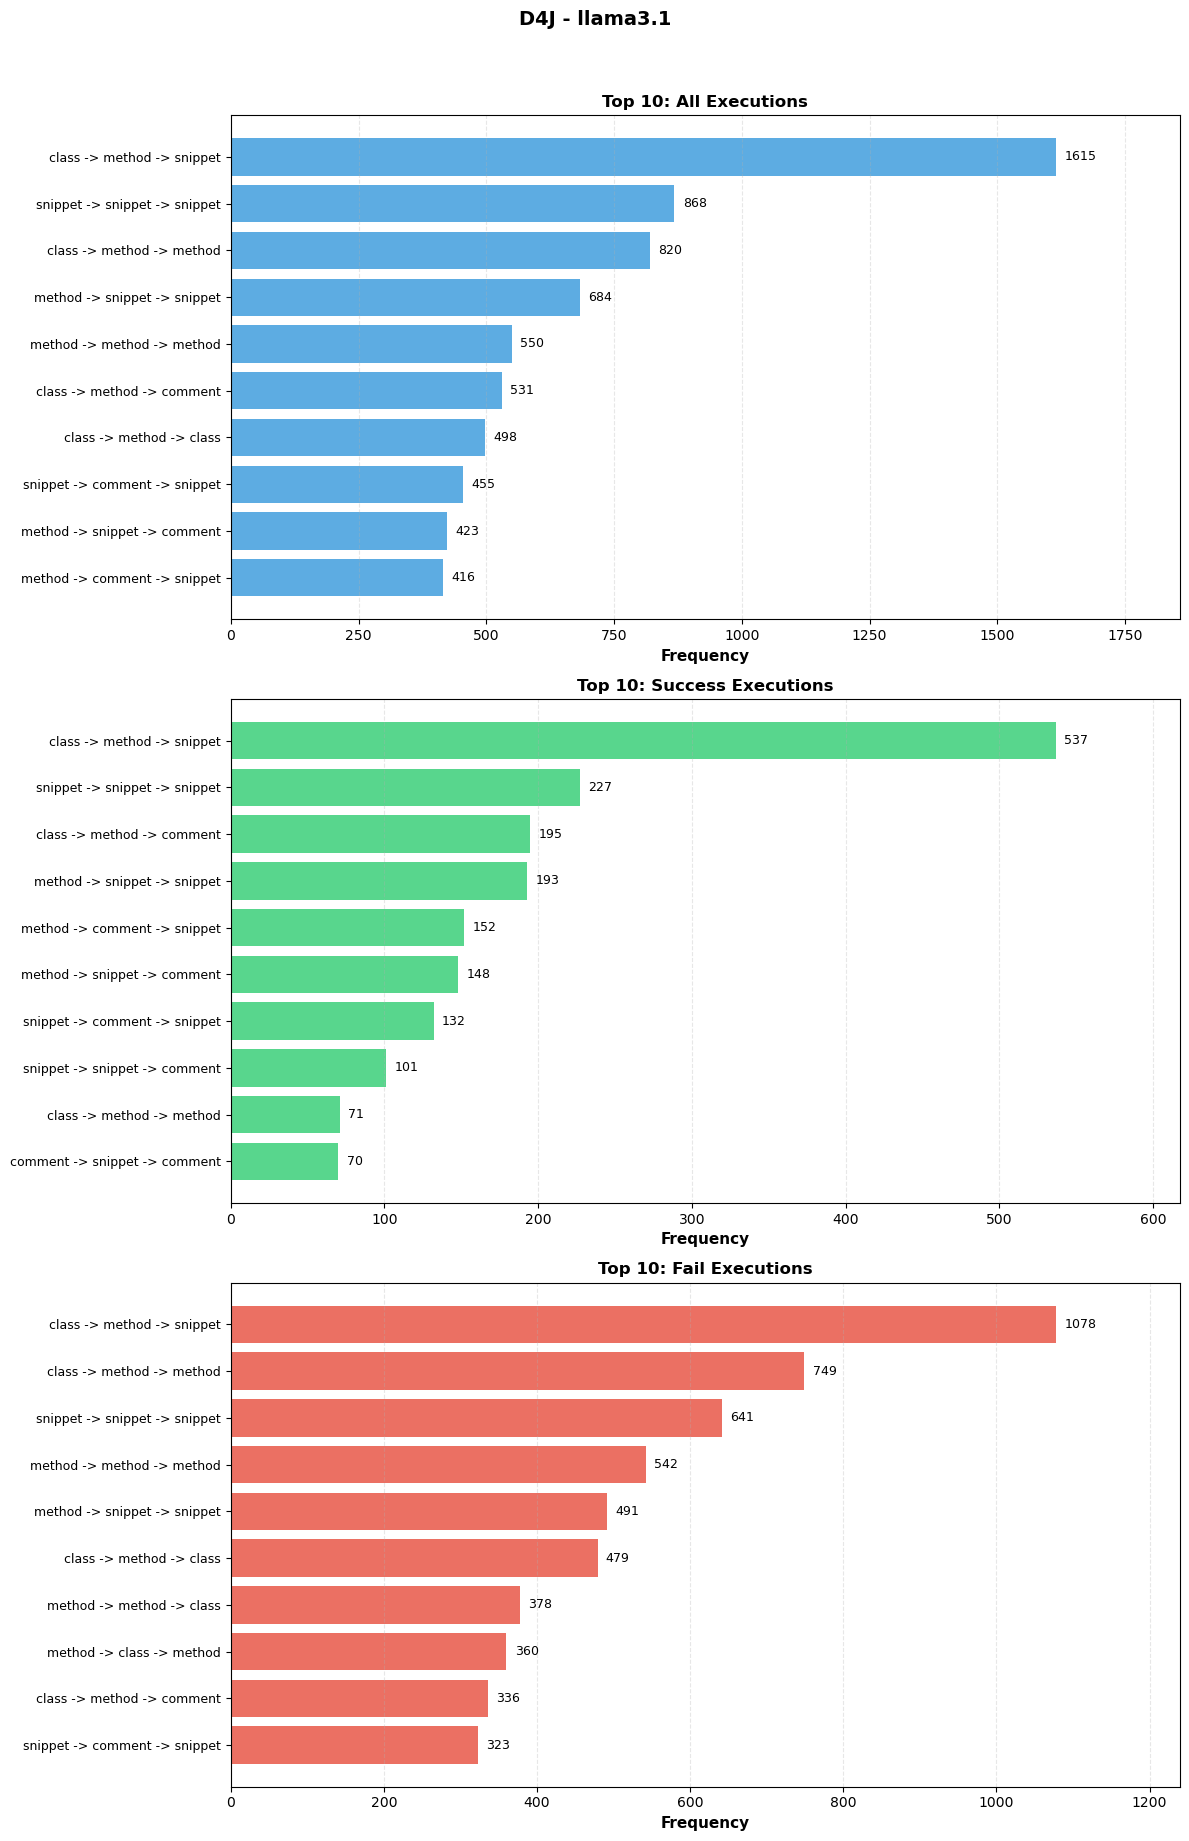


Benchmark: d4j | Model: mistral-nemo


Total 3-grams collected: 3562

Total 3-grams collected: 826

Total 3-grams collected: 2736


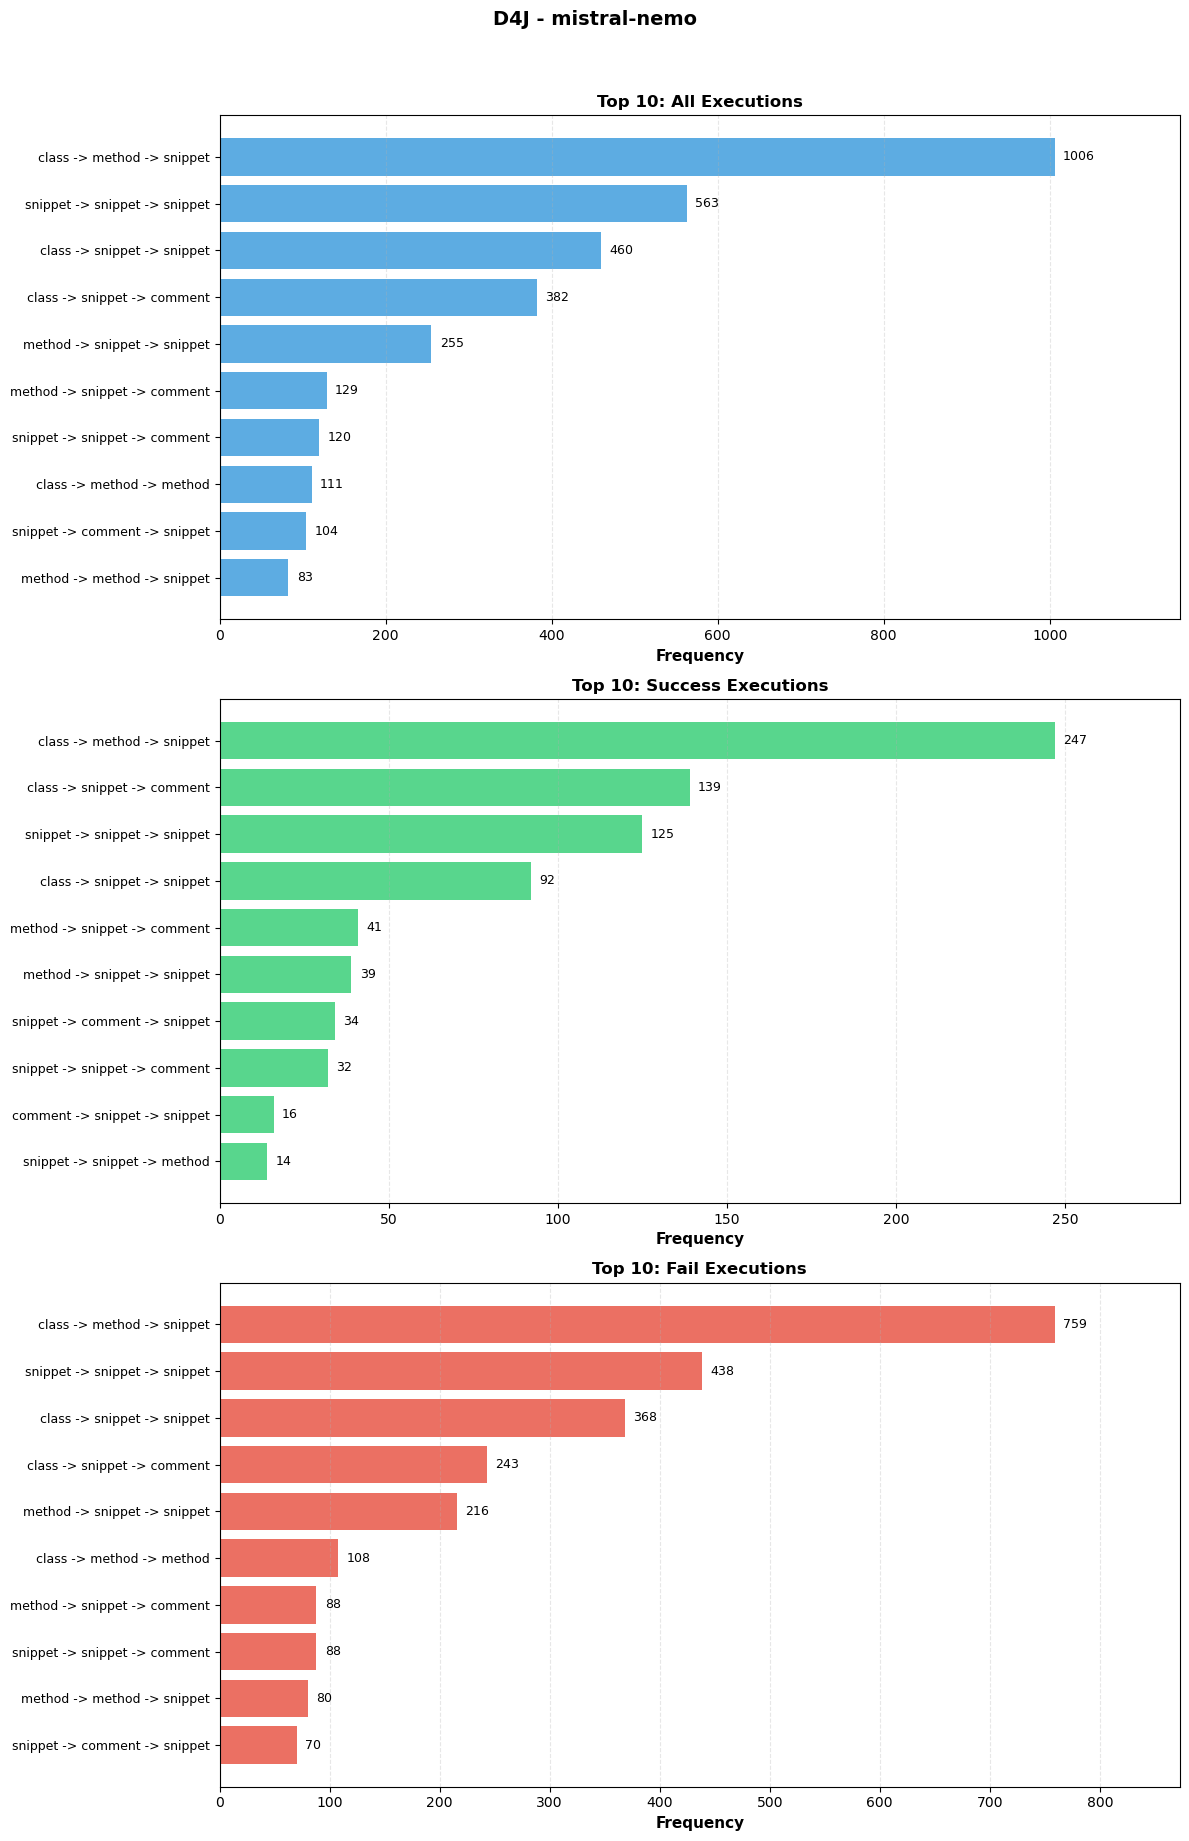


Benchmark: d4j | Model: qwen2.5-coder


Total 3-grams collected: 4099

Total 3-grams collected: 975

Total 3-grams collected: 3124


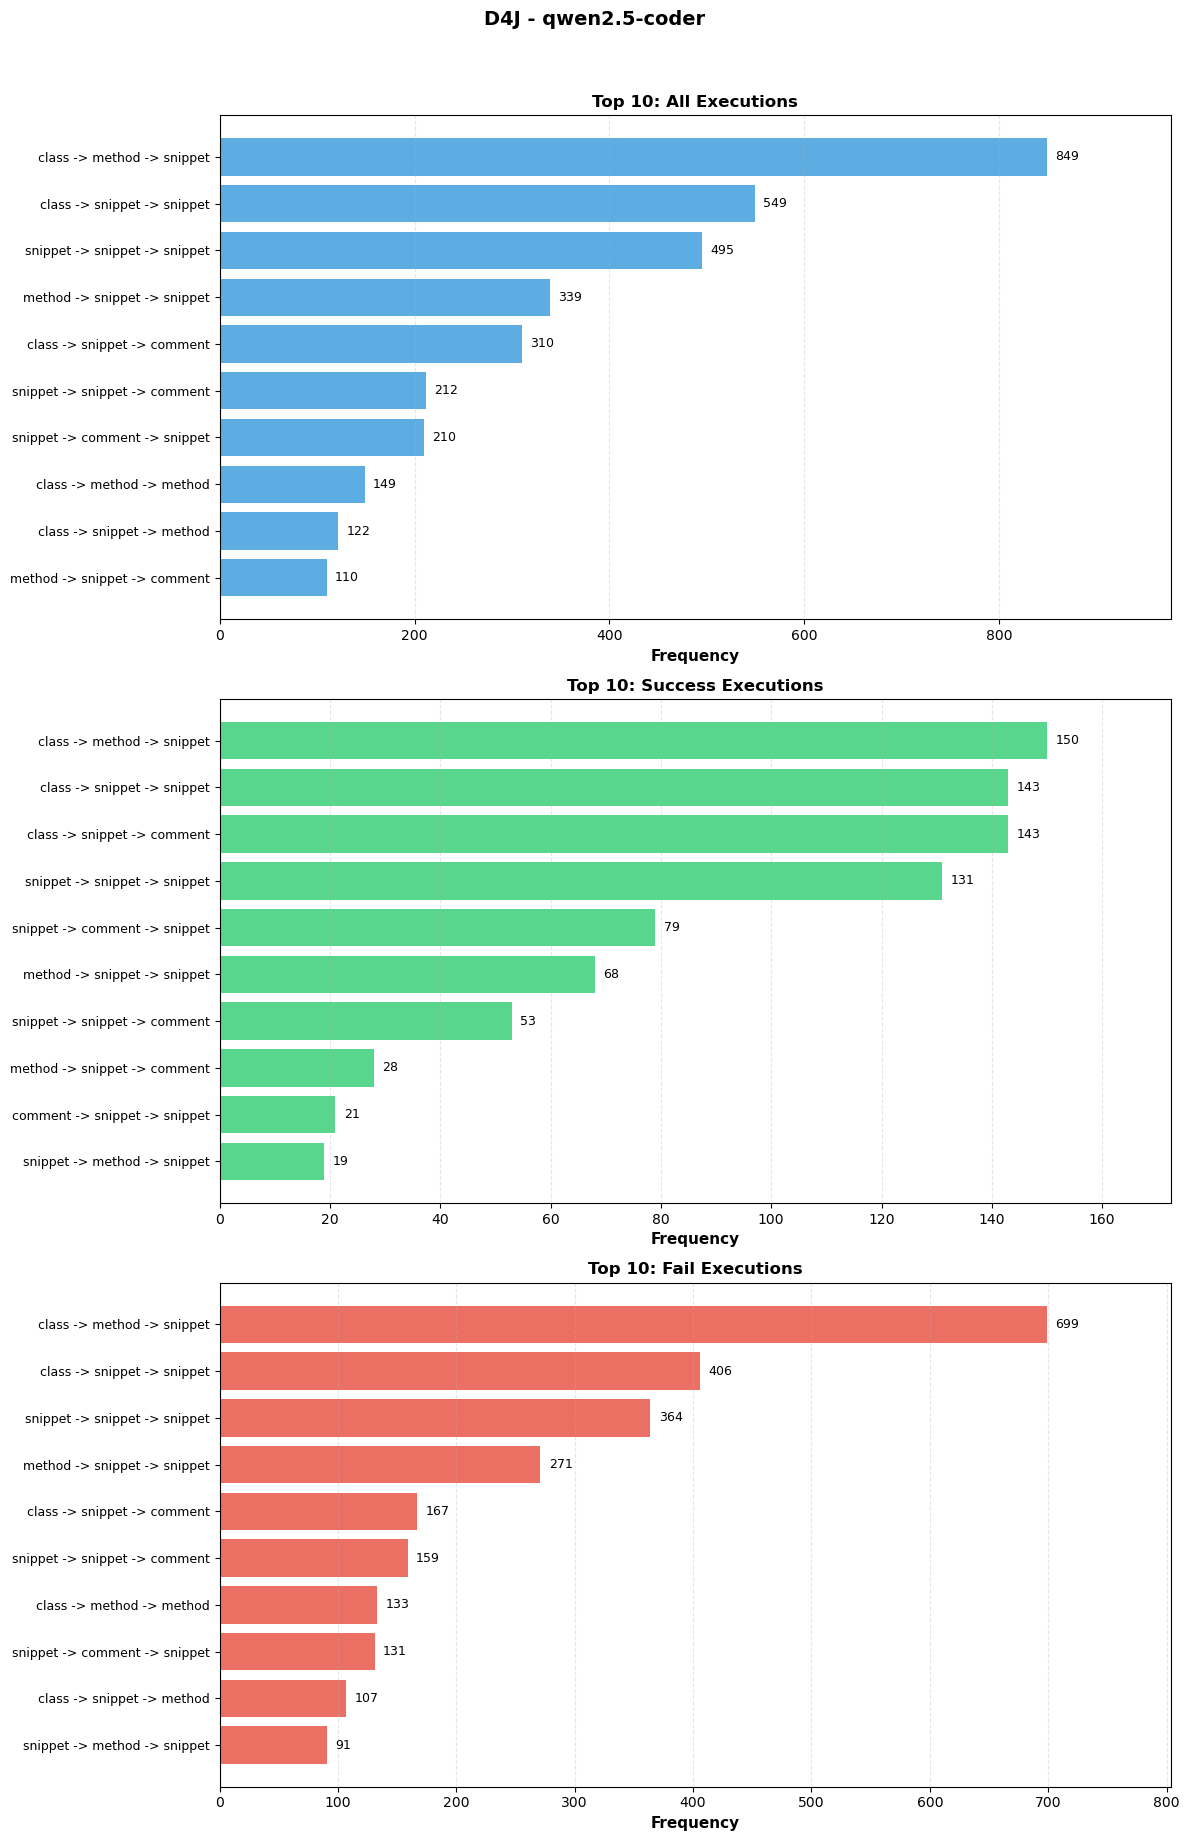


Benchmark: bip | Model: llama3


Total 3-grams collected: 15055

Total 3-grams collected: 1593

Total 3-grams collected: 13462


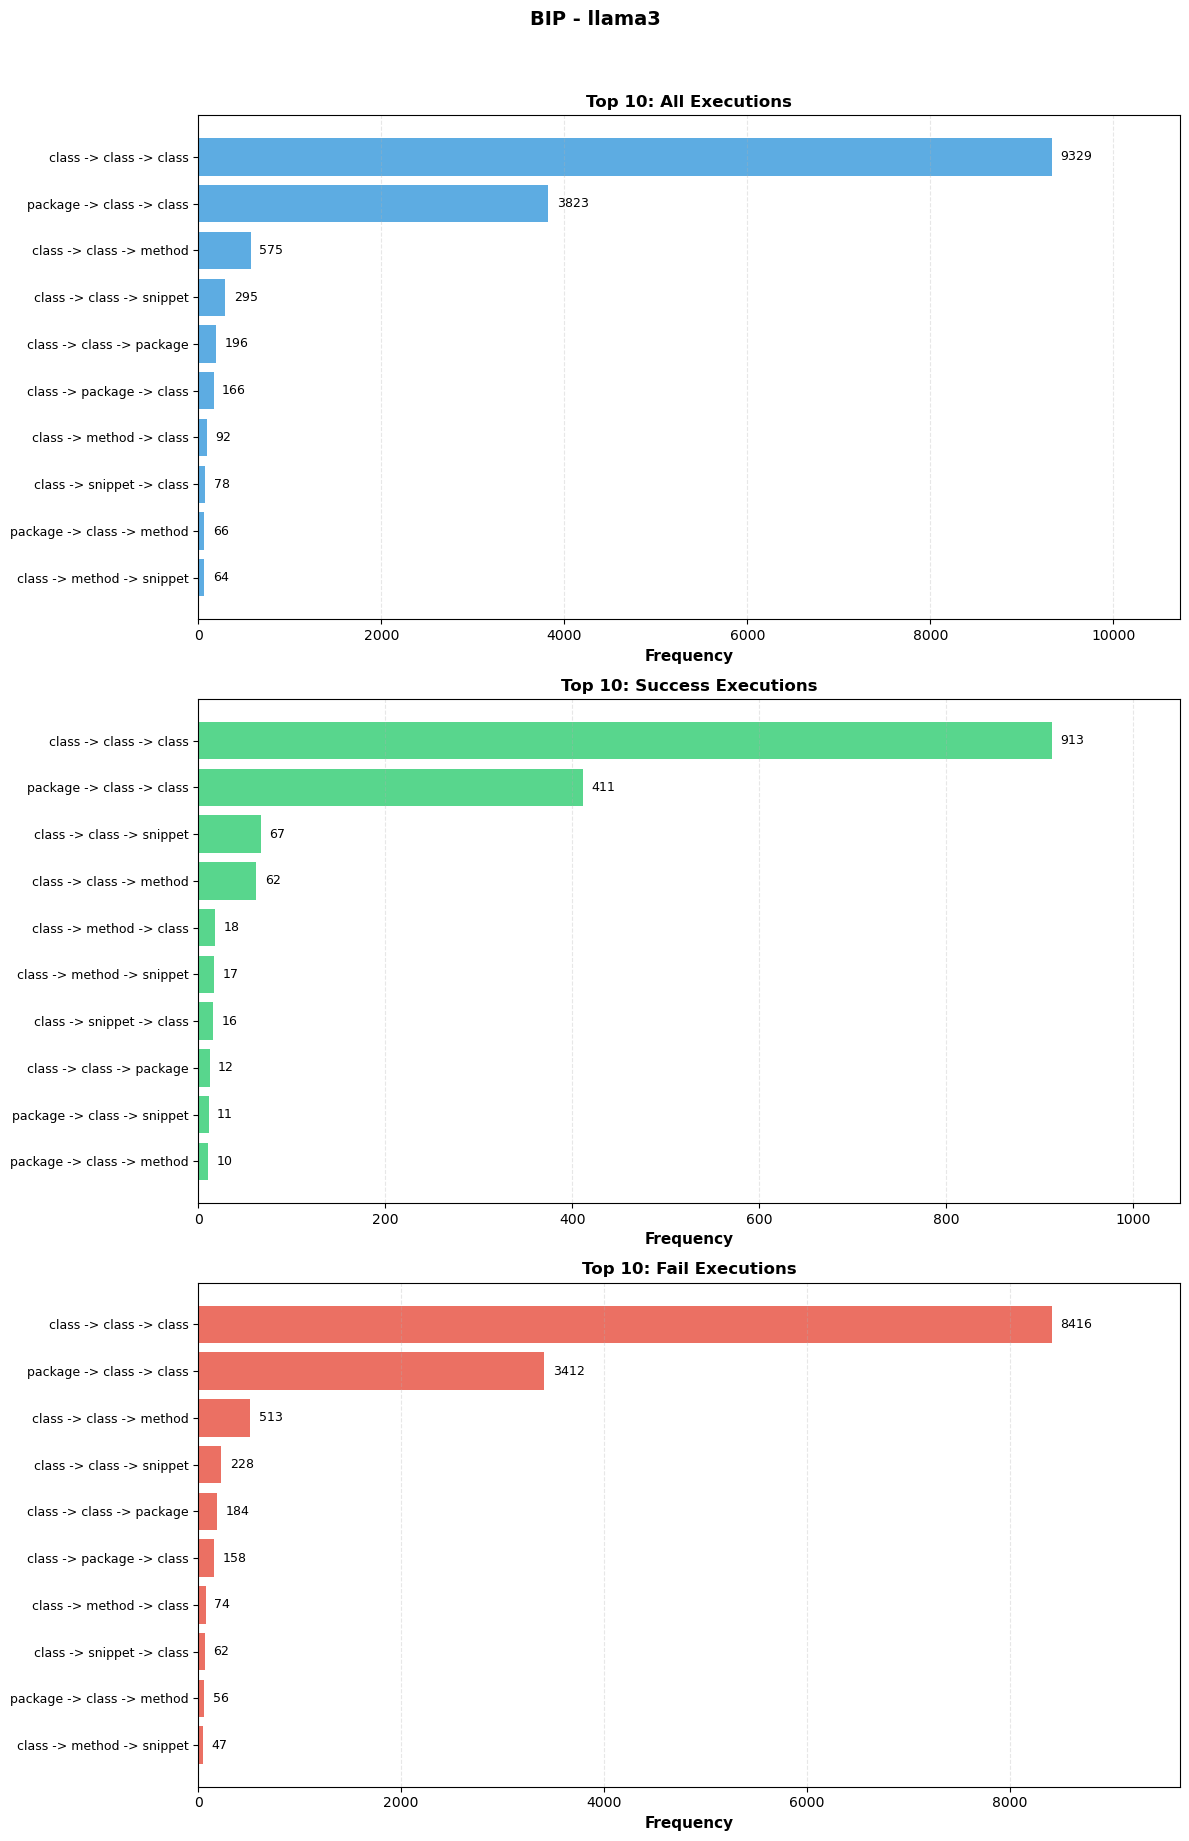


Benchmark: bip | Model: llama3.1


Total 3-grams collected: 19012

Total 3-grams collected: 3597

Total 3-grams collected: 15415


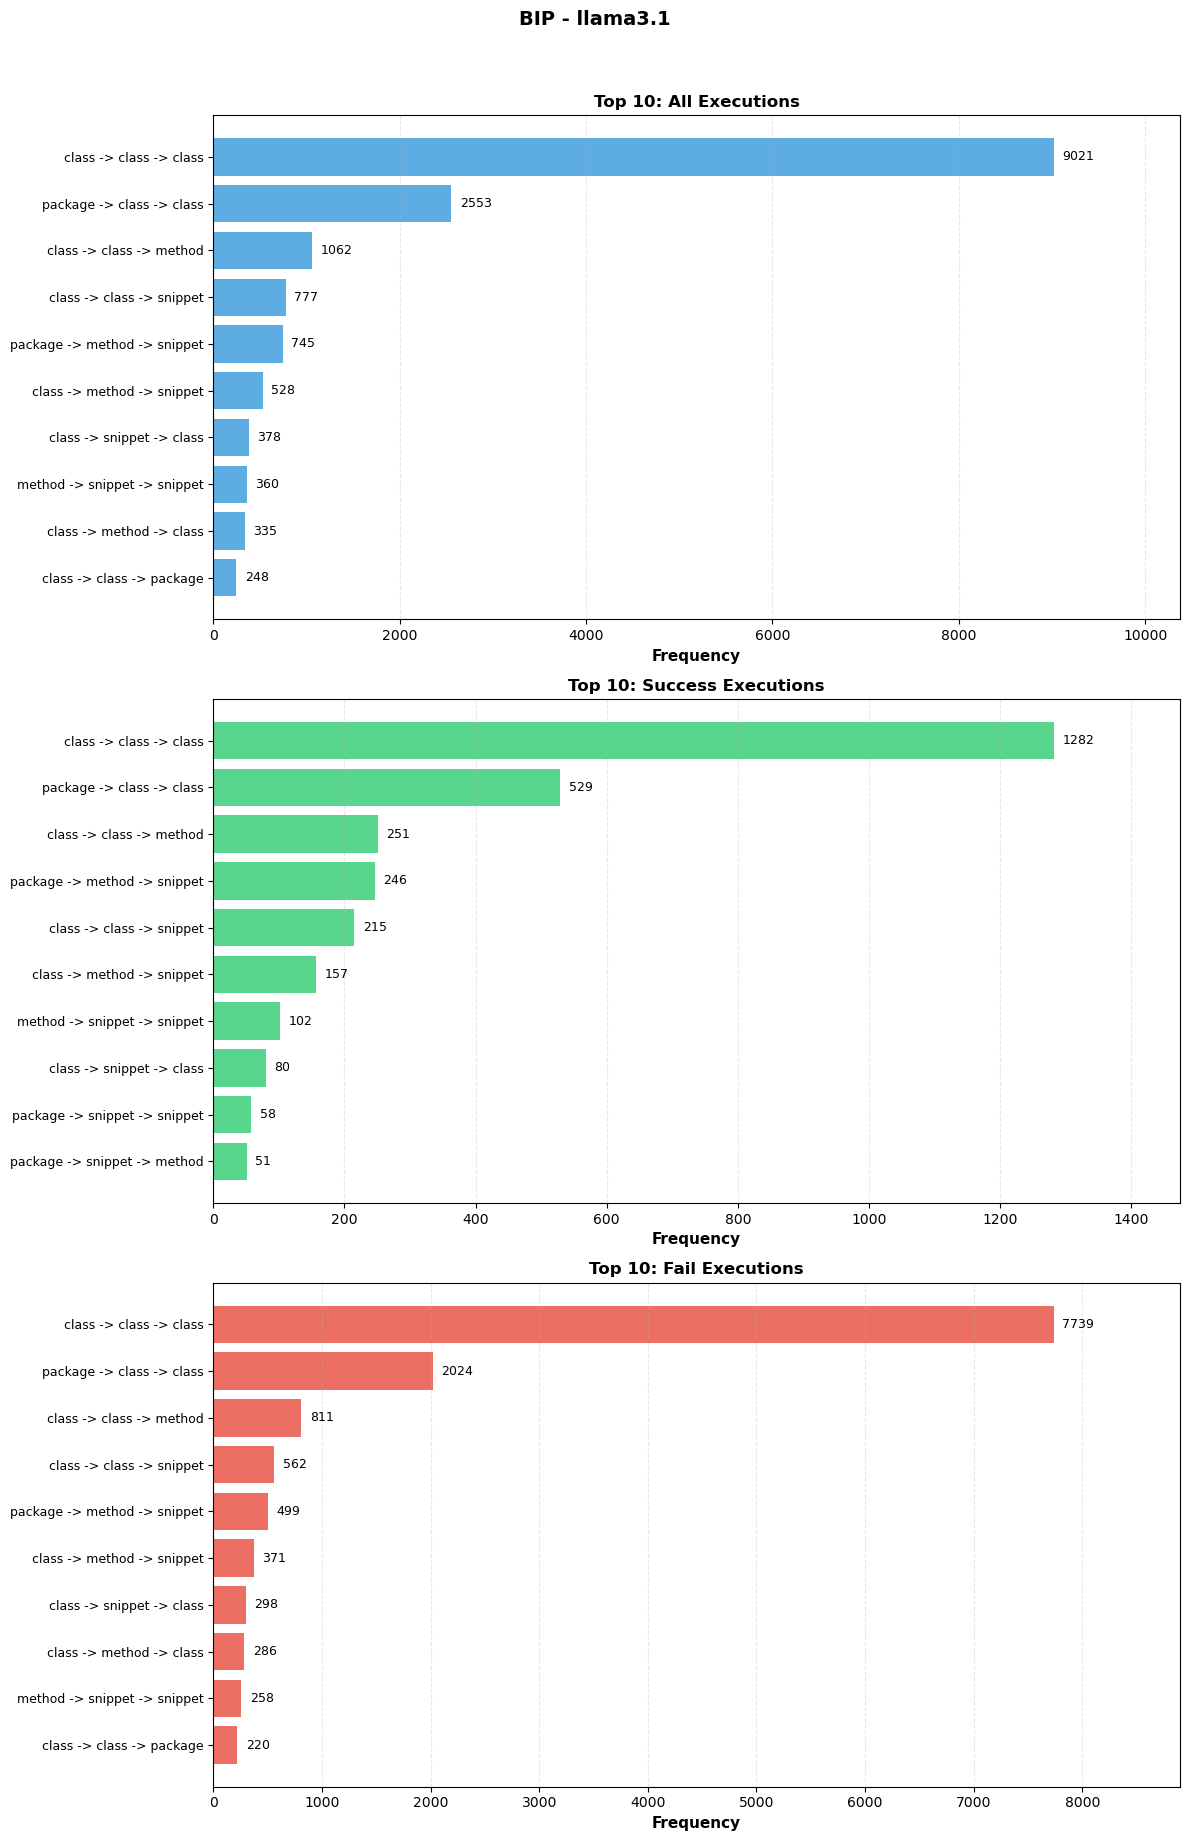


Benchmark: bip | Model: mistral-nemo


Total 3-grams collected: 5254

Total 3-grams collected: 1384

Total 3-grams collected: 3870


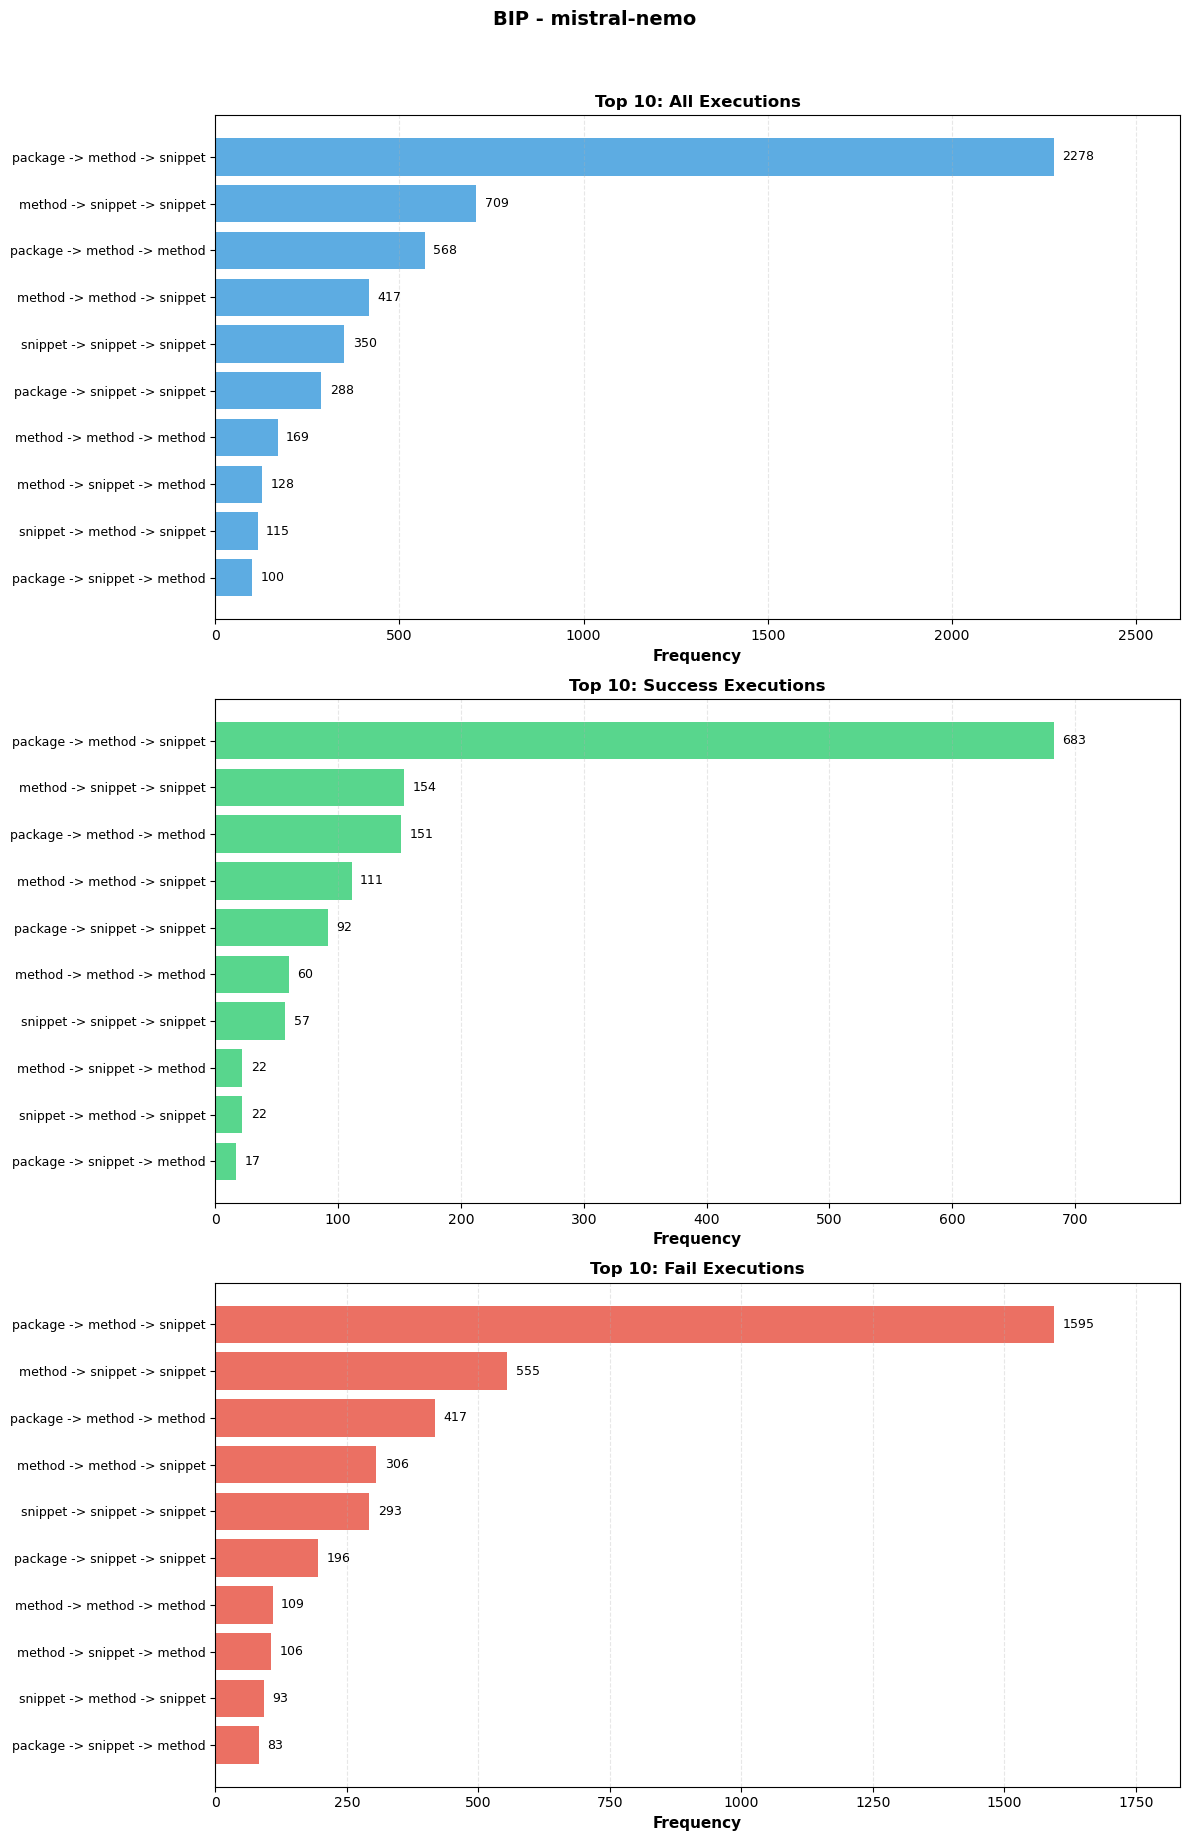


Benchmark: bip | Model: qwen2.5-coder


Total 3-grams collected: 4209

Total 3-grams collected: 995

Total 3-grams collected: 3214


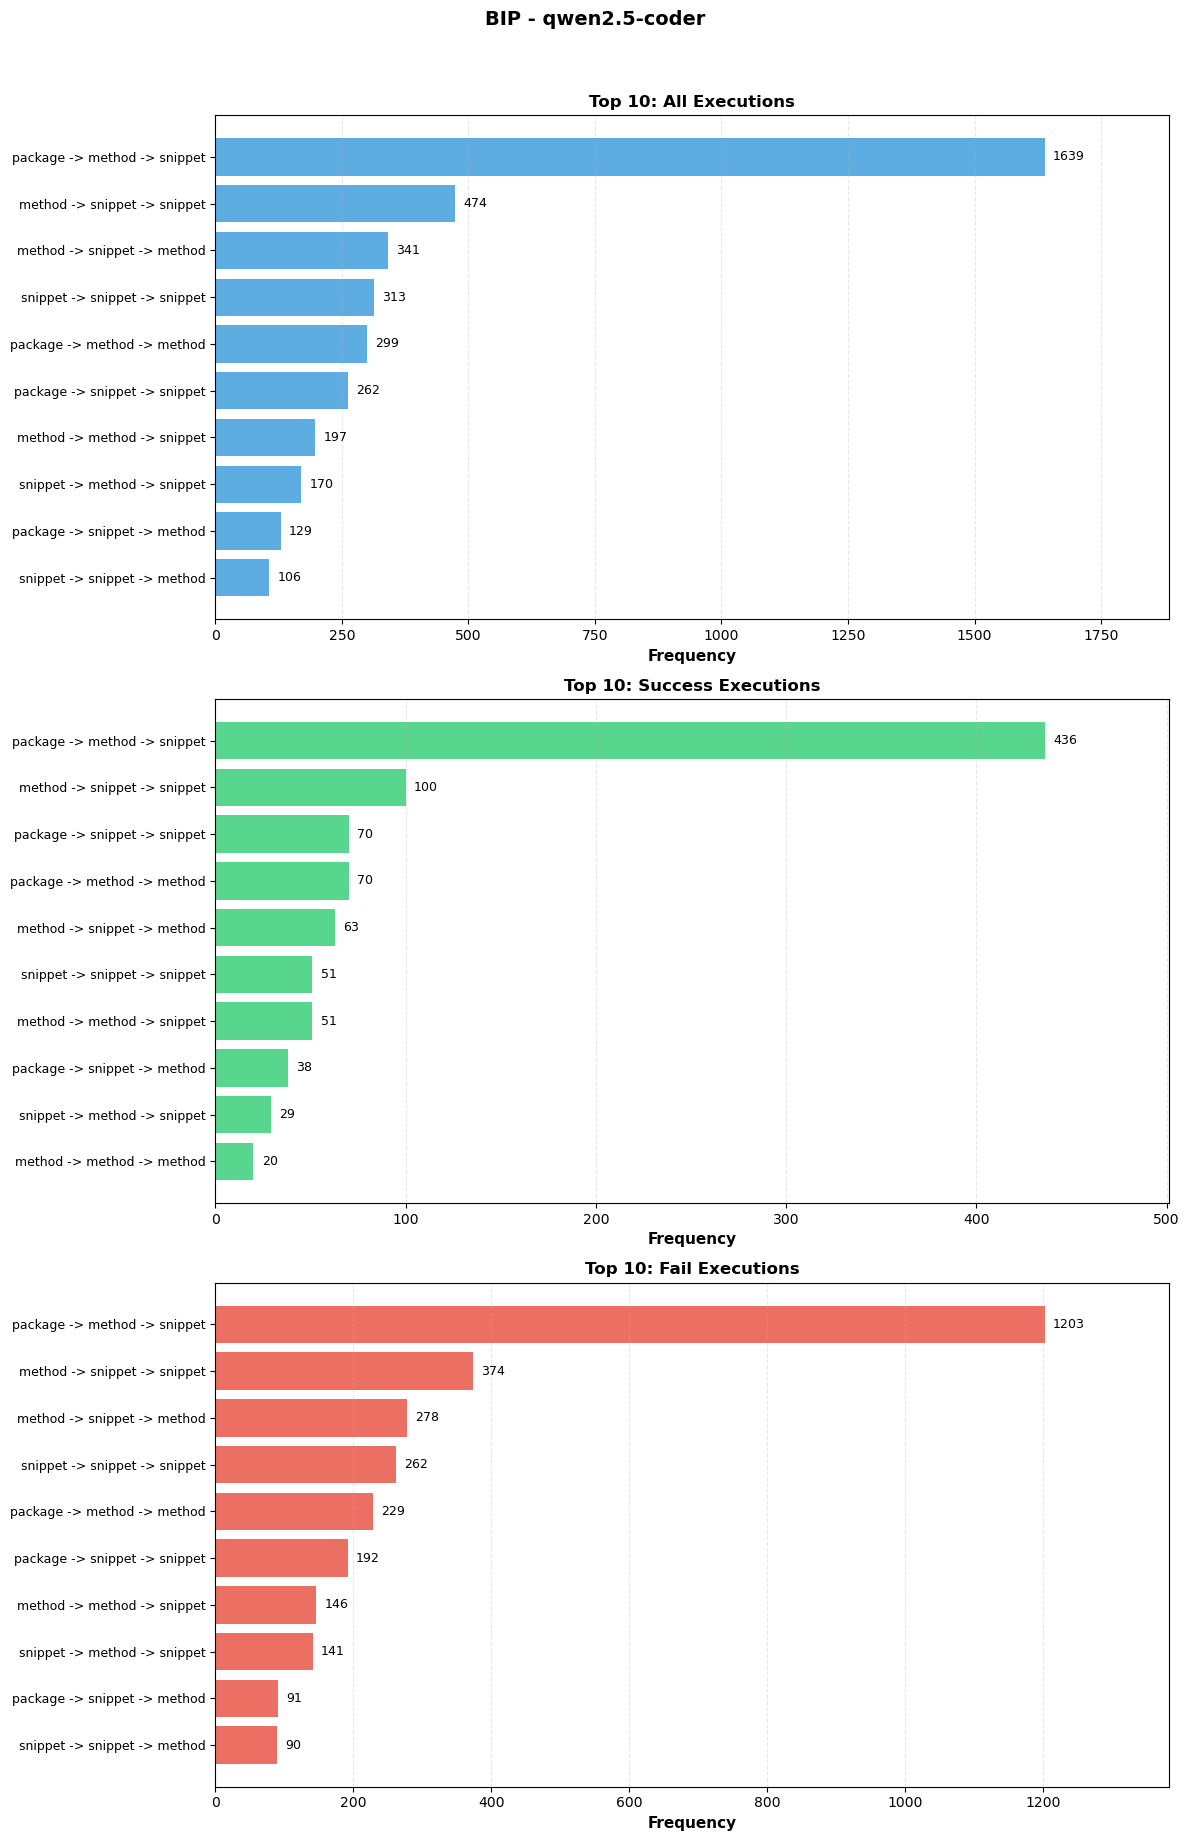

In [15]:
# Visualize Top 10 patterns separately for all/success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comments': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
n=3
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_ngrams = get_ngrams_for_all_executions(bm, model, n)
        success_ngrams = get_ngrams_for_success_executions(bm, model, n)
        fail_ngrams = get_ngrams_for_fail_executions(bm, model, n)
        
        all_counter = Counter(all_ngrams)
        success_counter = Counter(success_ngrams)
        fail_counter = Counter(fail_ngrams)
        
        # Get top 10 from each counter
        top_10_all = [(shorten_pattern(pattern), count) for pattern, count in all_counter.most_common(10)]
        top_10_success = [(shorten_pattern(pattern), count) for pattern, count in success_counter.most_common(10)]
        top_10_fail = [(shorten_pattern(pattern), count) for pattern, count in fail_counter.most_common(10)]
        
        # Create 3 subplots
        fig, axes = plt.subplots(3, 1, figsize=(12, 18))
        
        # Plot 1: All Executions
        patterns_all = [p[0] for p in top_10_all]
        counts_all = [p[1] for p in top_10_all]
        
        axes[0].barh(range(len(patterns_all)), counts_all, color='#3498db', alpha=0.8)
        axes[0].set_yticks(range(len(patterns_all)))
        axes[0].set_yticklabels(patterns_all, fontsize=9)
        axes[0].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 10: All Executions', fontsize=12, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(axis='x', alpha=0.3, linestyle='--')

        axes[0].set_xlim(0, max(counts_all)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_all):
            axes[0].text(v + max(counts_all)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 2: Success Executions
        patterns_success = [p[0] for p in top_10_success]
        counts_success = [p[1] for p in top_10_success]
        
        axes[1].barh(range(len(patterns_success)), counts_success, color='#2ecc71', alpha=0.8)
        axes[1].set_yticks(range(len(patterns_success)))
        axes[1].set_yticklabels(patterns_success, fontsize=9)
        axes[1].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[1].set_title('Top 10: Success Executions', fontsize=12, fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].grid(axis='x', alpha=0.3, linestyle='--')

        axes[1].set_xlim(0, max(counts_success)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_success):
            axes[1].text(v + max(counts_success)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 3: Fail Executions
        patterns_fail = [p[0] for p in top_10_fail]
        counts_fail = [p[1] for p in top_10_fail]
        
        axes[2].barh(range(len(patterns_fail)), counts_fail, color='#e74c3c', alpha=0.8)
        axes[2].set_yticks(range(len(patterns_fail)))
        axes[2].set_yticklabels(patterns_fail, fontsize=9)
        axes[2].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[2].set_title('Top 10: Fail Executions', fontsize=12, fontweight='bold')
        axes[2].invert_yaxis()
        axes[2].grid(axis='x', alpha=0.3, linestyle='--')

        axes[2].set_xlim(0, max(counts_fail)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_fail):
            axes[2].text(v + max(counts_fail)*0.01, i, str(v), va='center', fontsize=9)
        
        # Overall title
        fig.suptitle(f'{bm.upper()} - {model}', fontsize=14, fontweight='bold', y=1.02)
        
        plt.tight_layout()
        plt.show()